# **Predict Customer Clicked Ads Classification By Using Machine Learning**

## 📌 Problem Statement

A digital marketing company in Indonesia faces challenges in determining the effectiveness of their advertisements and identifying the right target audience. The current approach lacks precision in reaching potential customers who are likely to engage with the ads, resulting in inefficient ad spending and lower click-through rates. This leads to reduced return on investment (ROI) on their advertising campaigns and potential loss of market opportunities.

## 📌 Goals

- Enhanced ad targeting: Improve advertisement effectiveness by implementing machine learning models to identify potential customers most likely to click on ads. (**MAIN**)
- Increased ROI: Optimize advertising spend by targeting the most receptive audience segments. (**SECONDARY**)

## 📌 Objectives

The ultimate goal of this project is to create a machine learning model that can:

- Accurately predict which users are most likely to click on advertisements, with high precision and accuracy rates
- Identify patterns in customer behavior to optimize ad targeting strategies
- Reduce advertising costs while maintaining or improving engagement rates

## 📌 Business Metrics

* Click-Through Rate (CTR): The percentage of users who click on the advertisement divided by the total number of users who view the ad. (**MAIN**)
* Return on Ad Spend (ROAS): The revenue generated per rupiah spent on advertising. (**MAIN**)

# **STAGE 1 : EXPLORATORY DATA ANALYSIS (EDA)**

## Import Libraries and Settings

In [1]:
# Resets all variables in the current namespace
%reset -f

In [2]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

import os
import sklearn
import joblib
import math
import scipy.stats as stats
from scipy.stats import skew, kurtosis, chi2_contingency

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Set random seed for all numpy random generation methods
np.random.seed(42)

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)
print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2
scikit-learn version: 1.4.0
joblib version: 1.3.2


### Load Dataset

In [3]:
# Read dataset from local directory
df = pd.read_csv('Clicked Ads Dataset.csv', index_col=0)

## Data Understanding and Initial Transformation

In [4]:
# Retrieve 10 sample lines from the available data
df.sample(10)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
521                     63.26   29  383511590.0                120.46   
737                     71.23   52  290648960.0                122.59   
740                     43.63   38  432299840.0                135.25   
660                     42.04   49  471261000.0                182.11   
411                     78.68   29  463580040.0                208.05   
678                     87.85   34  362713890.0                153.01   
626                     85.77   27  365832110.0                191.78   
513                     59.13   44  346677590.0                106.04   
859                     83.17   43  379762460.0                244.40   
136                     38.37   36  288604120.0                140.46   

          Male        Timestamp Clicked on Ad           city  \
521  Laki-Laki    3/2/2016 4:02           Yes          Medan   
737  Perempuan   1/5/2016 11:53           Yes          Bogor   
740  Laki-Laki  5/25/2016 19:45           Yes         Bekasi   
660  Perempuan   2/3/2016 16:54           Yes    Banjarmasin   
411  Perempuan  1/16/2016 16:40            No         Malang   
678  Perempuan   3/19/2016 8:00            No          Medan   
626  Laki-Laki   4/9/2016 23:26            No         Malang   
513  Laki-Laki   6/9/2016 17:11           Yes      Pakanbaru   
859  Laki-Laki   4/5/2016 18:02            No         Malang   
136  Perempuan   5/13/2016 6:09           Yes  Jakarta Timur   

                          province    category  
521                  Sumatra Utara      Health  
737                     Jawa Barat       House  
740                     Jawa Barat        Bank  
660             Kalimantan Selatan     Finance  
411                     Jawa Timur    Otomotif  
678                  Sumatra Utara  Electronic  
626                     Jawa Timur      Health  
513                           Riau        Bank  
859                     Jawa Timur    Otomotif  
136  Daerah Khusus Ibukota Jakarta     Finance

In [5]:
# # Checking what the Unnamed: 0 column contains (remove from the beginning at reading the dataset)
# df['Unnamed: 0'].nunique()

In [6]:
# Quick feature transformation
## Rename column name for and maintain column name similarity
df = df.rename(columns={'Male': 'Gender',
                        'Timestamp': 'Visit Time',
                        'city' : 'City',
                        'province' : 'Province',
                        'category' : 'Category'})

## Re-arrange column (target 'Clicked on Ad' at the end --> personal preference)
df = df[[col for col in df.columns if col != 'Clicked on Ad'] + ['Clicked on Ad']]

In [7]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 1000
Number of columns 10


> The original dataframe has 1000 rows and 11 columns.

In [8]:
# Checking basic data information
def check_data_information(df, cols):
    """
    This function provides detailed information about each column in a dataframe, including:
    - Data type of the column
    - Number of missing (null) values
    - Percentage of missing values
    - Total number of duplicated rows in the dataframe (not column-specific)
    - Number of unique values in the column
    - A sample of up to 5 unique values from the column

    Parameters:
    df (pd.DataFrame): The dataframe you want to check.
    cols (list): List of column names to check the information from.

    Returns:
    pd.DataFrame: A dataframe with detailed information for each column.
    """
    list_item = []
    for col in cols:
        list_item.append([col,                             # The column name
                          df[col].dtype,                   # The data type of the column
                          df[col].isna().sum(),            # The count of null values in the column
                          round(100 * df[col].isna().sum() / len(df[col]), 2),  # The percentage of null values
                          df.duplicated().sum(),           # The count of duplicated rows in the entire dataframe
                          df[col].nunique(),               # The count of unique values in the column
                          df[col].unique()[:5]])           # A sample of the first 5 unique values in the column

    desc_df = pd.DataFrame(data=list_item, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, Unique Sample'.split(","))
    return desc_df

columns_to_check = df.columns
check_data_information(df, columns_to_check)

Feature  Data Type   Null Values   Null Percentage  \
0  Daily Time Spent on Site    float64            13               1.3   
1                       Age      int64             0               0.0   
2               Area Income    float64            13               1.3   
3      Daily Internet Usage    float64            11               1.1   
4                    Gender     object             3               0.3   
5                Visit Time     object             0               0.0   
6                      City     object             0               0.0   
7                  Province     object             0               0.0   
8                  Category     object             0               0.0   
9             Clicked on Ad     object             0               0.0   

    Duplicated Values   Unique Values  \
0                   0             890   
1                   0              43   
2                   0             987   
3                   0             955   
4                   0               2   
5                   0             997   
6                   0              30   
7                   0              16   
8                   0              10   
9                   0               2   

                                                                      Unique Sample  
0                                               [68.95, 80.23, 69.47, 74.15, 68.37]  
1                                                              [35, 31, 26, 29, 23]  
2   [432837300.0, 479092950.00000006, 418501580.0, 383643260.0, 517229930.00000006]  
3                                           [256.09, 193.77, 236.5, 245.89, 225.58]  
4                                                       [Perempuan, Laki-Laki, nan]  
5   [3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:35, 1/10/2016 2:31, 6/3/2016 3:36]  
6                                 [Jakarta Timur, Denpasar, Surabaya, Batam, Medan]  
7  [Daerah Khusus Ibukota Jakarta, Bali, Jawa Timur, Kepulauan Riau, Sumatra Utara]  
8                                     [Furniture, Food, Electronic, House, Finance]  
9                                                                         [No, Yes]

**Quick Overview:**
- Dataset contains 1000 rows, 10 features and 1 **Unnamed: 0** column which is the ID column that is dropped.
- Dataset consists of 3 data types; float64, int64 and object.
- `Visit Time` (originally `Timestampt`) feature will be changed into datetime data type.
- Dataset contains null values in various columns but with only small percentages.

**Feature Information**

| **Feature Name** | **Description** | **Data Type** | **Specific Data Type** |
|------------------|-----------------|---------------|----------------------|
| `Daily Time Spent on Site` | Time spent on the site (Minutes) | Numerical | Continuous |
| `Age` | Age of the customer | Numerical | Continuous |
| `Area Income` | Average income of geographical area of consumer | Numerical | Continuous |
| `Daily Internet Usage` | Time spent on the internet (Minutes) | Numerical | Continuous |
| `Gender` | Gender of the customer | Categorical | Nominal |
| `Visit Time` | Time the customer visit on the website | Date | Timestamp |
| `City` | City of customer's residence | Categorical | Nominal |
| `Province` | Province of customer's residence | Categorical | Nominal |
| `Category` | Category of the advertisement | Categorical | Nominal |
| `Clicked on Ad` | Whether the customer clicked the ad or not (Target Variable) | Categorical | Nominal (Binary) |

In [9]:
# Grouping columns based on data types
nums_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

cats_cols = ['Gender', 'City', 'Province', 'Category', 'Clicked on Ad']

date_cols = ['Visit Time']

## Initial Transformation

- We saw that from our quick data understanding that we have a really small amount of missing values (~1%). Since the amount is very small, we can just handle it here and not in preprocessing steps. We also had the options to just drop it but we will just go with imputation for now

- We also saw that the `Visit Time` column need to be handled by changing the data type from string to datetime, we can also do it here since we could potentially gather insights related to datetime 

In [10]:
# Change the target value into more conceivable format
is_target_mapped = False

# Transform target values only if not already done
if not is_target_mapped:
    df['Clicked on Ad'] = df['Clicked on Ad'].map({'No': 'Not Clicked', 'Yes': 'Clicked'})
    is_target_mapped = True

# Function to change the target feature into categorical value (only for EDA, will change it back later for ML puposes)
def change_target_dtype(data, target_col='Clicked on Ad', target_type='numerical'):
    """
    Change the target feature's data type between numerical and categorical.

    Parameters:
    data (pd.DataFrame): The dataframe containing the target column.
    target_col (str): The name of the target column.
    target_type (str): The desired data type for the target column.
                       Use 'numerical' for 0/1 encoding and 'categorical' for 'No'/'Yes'.

    Returns:
    None: The function modifies the dataframe in place.
    """
    if target_type == 'categorical':
        data[target_col] = data[target_col].map({0: 'Not Clicked', 1: 'Clicked'})
    elif target_type == 'numerical':
        data[target_col] = data[target_col].map({'Not Clicked': 0, 'Clicked': 1})
    else:
        raise ValueError("target_type must be either 'numerical' or 'categorical'")

In [11]:
# Data type correction for `Visit Time` column
df['Visit Time'] = pd.to_datetime(df['Visit Time'])

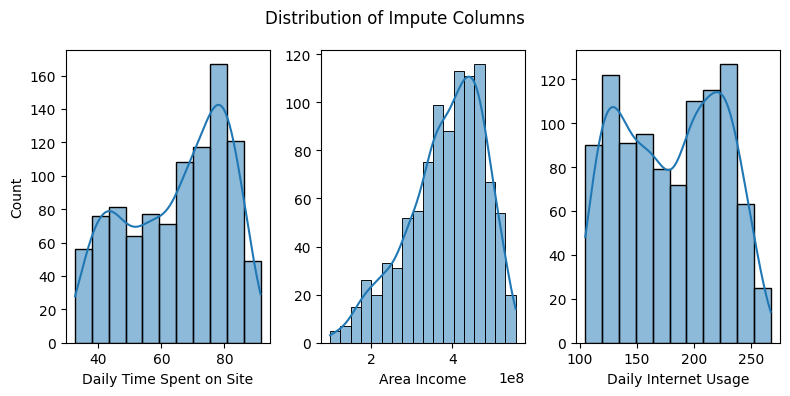

In [12]:
# Checking distribution in numerical columns with missing value for proper imputation method
impute_col = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

# Plot histograms for each column
for i, col in enumerate(impute_col):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    if i != 0:
        ax[i].set_ylabel(None)

plt.suptitle('Distribution of Impute Columns')
plt.tight_layout()
plt.show()

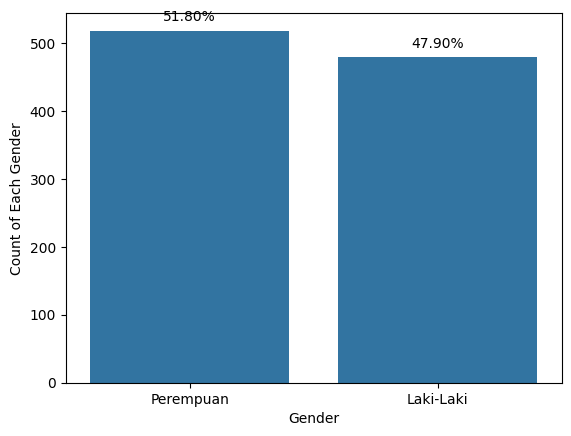

In [13]:
# Checking distribution in categorical columns with missing value for proper imputation method
ax = sns.countplot(data=df, x='Gender')

# Calculate the percentage for each category
total = float(len(df))
for p in ax.patches:
    percentage = '{:.2f}%'.format((p.get_height() / total) * 100)
    ax.annotate(percentage, # The text to display
                (p.get_x() + p.get_width() / 2., p.get_height()), # The position to annotate
                ha='center', va='bottom', # Alignment of text
                xytext=(0, 5), textcoords='offset points')  # The distance from text to points
plt.ylabel('Count of Each Gender')
plt.show()

> Imputation method based on distribution :

- Daily Time Spent on Site and Daily Internet Usage : mean
- Area Income : median
- Gender : mode

In [14]:
# Impute missing values
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

## Statistical Summary

In [15]:
# Describe numerical columns
def describe_numerical_combined(data, col_series, target_col=None):
    """
    Generate descriptive statistics for numerical columns in a dataframe,
    both overall and optionally grouped by target variable.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the numerical columns
    col_series (list): The list of numerical columns to describe
    target_col (str, optional): The name of the target column for classification
    
    Returns:
    pd.DataFrame: A dataframe containing descriptive statistics, with target classes if specified
    """
    # Overall statistics (original approach)
    overall_summary = data[col_series].describe().transpose().reset_index()
    overall_summary = overall_summary.rename(columns={'index': 'Feature'})
    
    # Add additional statistics for overall data
    overall_summary['range'] = overall_summary['max'] - overall_summary['min']
    overall_summary['IQR'] = overall_summary['75%'] - overall_summary['25%']
    overall_summary['CV'] = (overall_summary['std'] / overall_summary['mean']) * 100
    
    # Calculate skewness and kurtosis for numerical columns
    numerical_data = data[col_series].select_dtypes(include=['int64', 'float64']).dropna()
    overall_summary['skewness'] = [skew(numerical_data[col]) for col in numerical_data.columns]
    overall_summary['kurtosis'] = [kurtosis(numerical_data[col]) for col in numerical_data.columns]
    
    # Rename columns to indicate these are overall statistics
    overall_summary.columns = ['Feature'] + [f'overall_{col}' if col != 'Feature' else col 
                                           for col in overall_summary.columns[1:]]
    
    final_summary = overall_summary
    
    # If target column is provided, add class-specific statistics
    if target_col is not None:
        target_classes = sorted(data[target_col].unique())
        class_summaries = []
        
        for target_class in target_classes:
            # Filter data for current class
            class_data = data[data[target_col] == target_class]
            
            # Calculate basic statistics
            class_summary = class_data[col_series].describe().transpose().reset_index()
            class_summary = class_summary.rename(columns={'index': 'Feature'})
            
            # Add additional statistics
            class_summary['range'] = class_summary['max'] - class_summary['min']
            class_summary['IQR'] = class_summary['75%'] - class_summary['25%']
            class_summary['CV'] = (class_summary['std'] / class_summary['mean']) * 100
            
            # Calculate skewness and kurtosis
            numerical_class_data = class_data[col_series].select_dtypes(include=['int64', 'float64']).dropna()
            class_summary['skewness'] = [skew(numerical_class_data[col]) for col in numerical_class_data.columns]
            class_summary['kurtosis'] = [kurtosis(numerical_class_data[col]) for col in numerical_class_data.columns]
            
            # Rename columns to indicate which class they belong to
            class_summary.columns = ['Feature'] + [f'class_{target_class}_{col}' if col != 'Feature' else col 
                                                 for col in class_summary.columns[1:]]
            
            class_summaries.append(class_summary)
        
        # Combine all class summaries
        all_class_summaries = class_summaries[0]
        for summary in class_summaries[1:]:
            all_class_summaries = pd.merge(all_class_summaries, summary, on='Feature')
            
        # Merge with overall summary
        final_summary = pd.merge(final_summary, all_class_summaries, on='Feature')
        
        # Reorder columns to group statistics by type rather than by class
        # Get all column names except 'Feature'
        cols = final_summary.columns.tolist()
        cols.remove('Feature')
        
        # Group similar statistics together
        stats = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range', 'IQR', 'CV', 'skewness', 'kurtosis']
        new_cols = ['Feature']
        
        for stat in stats:
            stat_cols = [col for col in cols if stat in col]
            new_cols.extend(stat_cols)
            
        final_summary = final_summary[new_cols]
    
    return final_summary

In [16]:
# Display the overall statistics for numerical columns
describe_numerical_combined(df, nums_cols)

Feature  overall_count  overall_mean   overall_std  \
0  Daily Time Spent on Site         1000.0  6.492952e+01  1.574127e+01   
1                       Age         1000.0  3.600900e+01  8.785562e+00   
2               Area Income         1000.0  3.850493e+08  9.347971e+07   
3      Daily Internet Usage         1000.0  1.798636e+02  4.362795e+01   

   overall_min   overall_25%   overall_50%   overall_75%   overall_max  \
0        32.60  5.154500e+01  6.778000e+01  7.835250e+01  9.143000e+01   
1        19.00  2.900000e+01  3.500000e+01  4.200000e+01  6.100000e+01   
2  97975500.00  3.298201e+08  3.990683e+08  4.566932e+08  5.563936e+08   
3       104.78  1.390175e+02  1.810650e+02  2.182875e+02  2.670100e+02   

   overall_range   overall_IQR  overall_CV  overall_skewness  overall_kurtosis  
0   5.883000e+01  2.680750e+01   24.243622         -0.371617         -1.074387  
1   4.200000e+01  1.300000e+01   24.398240          0.478423         -0.404518  
2   4.584181e+08  1.268731e+08   24.277335         -0.653140         -0.079298  
3   1.622300e+02  7.927000e+01   24.256126         -0.031521         -1.257858

Gentle reminder :

- `skewness`: Measures the asymmetry of the probability distribution
- `kurtosis`: Measures the "tailedness" of the probability distribution

The skewness and kurtosis values can help you understand:
- If skewness > 0: Right-skewed distribution
- If skewness < 0: Left-skewed distribution
- If kurtosis > 3: Heavy-tailed distribution (more outliers)
- If kurtosis < 3: Light-tailed distribution (fewer outliers)


In [17]:
# Describe categorical columns
def describe_categorical_combined(data, col_series, target_col=None):
    """
    Generate descriptive statistics for categorical columns in a dataframe,
    both overall and optionally grouped by target variable.
    
    Parameters:
    data (pd.DataFrame): The dataframe containing the categorical columns
    col_series (list): The list of categorical columns to describe
    target_col (str, optional): The name of the target column for classification
    
    Returns:
    pd.DataFrame: A dataframe containing descriptive statistics, with target classes if specified
    """
    # Overall statistics
    cats_summary = data[col_series].describe().transpose().reset_index().rename(columns={'index': 'Feature'})
    
    # Add additional statistics for overall data
    cats_summary['bottom'] = [data[col].value_counts().idxmin() for col in col_series]
    cats_summary['freq_bottom'] = [data[col].value_counts().min() for col in col_series]
    cats_summary['top_percentage'] = [round(data[col].value_counts().max() / len(data) * 100, 2) 
                                    for col in col_series]
    cats_summary['bottom_percentage'] = [round(data[col].value_counts().min() / len(data) * 100, 2) 
                                       for col in col_series]
    
    # Add number of unique categories
    cats_summary['n_categories'] = [data[col].nunique() for col in col_series]
    
    # Rename columns to indicate these are overall statistics
    cats_summary.columns = ['Feature'] + [f'overall_{col}' if col != 'Feature' else col 
                                        for col in cats_summary.columns[1:]]
    
    final_summary = cats_summary
    
    # If target column is provided, add class-specific statistics
    if target_col is not None:
        target_classes = sorted(data[target_col].unique())
        class_summaries = []
        
        for target_class in target_classes:
            # Filter data for current class
            class_data = data[data[target_col] == target_class]
            
            # Calculate basic statistics
            class_summary = class_data[col_series].describe().transpose().reset_index()
            class_summary = class_summary.rename(columns={'index': 'Feature'})
            
            # Add additional statistics
            class_summary['bottom'] = [class_data[col].value_counts().idxmin() for col in col_series]
            class_summary['freq_bottom'] = [class_data[col].value_counts().min() for col in col_series]
            class_summary['top_percentage'] = [round(class_data[col].value_counts().max() / len(class_data) * 100, 2) 
                                             for col in col_series]
            class_summary['bottom_percentage'] = [round(class_data[col].value_counts().min() / len(class_data) * 100, 2) 
                                                for col in col_series]
            class_summary['n_categories'] = [class_data[col].nunique() for col in col_series]
            
            # Rename columns to indicate which class they belong to
            class_summary.columns = ['Feature'] + [f'class_{target_class}_{col}' if col != 'Feature' else col 
                                                 for col in class_summary.columns[1:]]
            
            class_summaries.append(class_summary)
        
        # Combine all class summaries
        all_class_summaries = class_summaries[0]
        for summary in class_summaries[1:]:
            all_class_summaries = pd.merge(all_class_summaries, summary, on='Feature')
            
        # Merge with overall summary
        final_summary = pd.merge(final_summary, all_class_summaries, on='Feature')
        
        # Reorder columns to group statistics by type rather than by class
        cols = final_summary.columns.tolist()
        cols.remove('Feature')
        
        # Group similar statistics together
        stats = ['count', 'unique', 'top', 'freq', 'bottom', 'freq_bottom', 
                'top_percentage', 'bottom_percentage', 'n_categories']
        new_cols = ['Feature']
        
        for stat in stats:
            stat_cols = [col for col in cols if stat in col]
            new_cols.extend(stat_cols)
            
        final_summary = final_summary[new_cols]
    
    return final_summary

In [18]:
# Display the overall statistics for categorical columns
describe_categorical_combined(df, cats_cols)

Feature overall_count overall_unique                    overall_top  \
0         Gender          1000              2                      Perempuan   
1           City          1000             30                       Surabaya   
2       Province          1000             16  Daerah Khusus Ibukota Jakarta   
3       Category          1000             10                       Otomotif   
4  Clicked on Ad          1000              2                    Not Clicked   

  overall_freq    overall_bottom  overall_freq_bottom  overall_top_percentage  \
0          521         Laki-Laki                  479                    52.1   
1           64            Serang                   11                     6.4   
2          253  Kalimantan Barat                   12                    25.3   
3          112              Bank                   90                    11.2   
4          500       Not Clicked                  500                    50.0   

   overall_bottom_percentage  overall_n_categories  
0                       47.9                     2  
1                        1.1                    30  
2                        1.2                    16  
3                        9.0                    10  
4                       50.0                     2

We will analyze this further later, but one thing to notice here is that our target variable is perfectly balanced. So, currently our **Click-Through Rate is only 50%** and we want to improve that further. Also this perfectly balanced values give us information that we won't need to do resampling later for modelling.

In [19]:
# Describe date columns
dates_summary = df[date_cols].describe().transpose()
dates_summary['date_data_range'] = dates_summary['max'] - dates_summary['min']
dates_summary['data_range_month'] = dates_summary['date_data_range'].apply(lambda x: x.days / 30)
dates_summary

count                        mean                  min  \
Visit Time  1000  2016-04-10 10:33:36.840000  2016-01-01 02:52:00   

                            25%                  50%                  75%  \
Visit Time  2016-02-18 02:55:15  2016-04-07 17:27:00  2016-05-31 03:18:00   

                            max    date_data_range  data_range_month  
Visit Time  2016-07-24 00:22:00  204 days 21:30:00               6.8

The data extracted for analysis are only around 6 months, nearly 7.

## Univariate Analysis

### Numerical Columns

In [20]:
# Hisplot and kdeplot analysis
def plot_dynamic_hisplots_kdeplots(df, col_series, plot_type='histplot', ncols=6, figsize=(26, 18), hue=None, multiple='layer', fill=None):
    """
    Creates a dynamic grid of histogram plots (with KDE) or KDE plots for multiple numerical columns.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data to plot.
    col_series : list of str
        List of column names to include in the plots.
    plot_type : str, optional, default='histplot'
        Type of plot to generate. Options are:
        - 'histplot': Histogram with KDE overlay
        - 'kdeplot': Kernel Density Estimation plot
    ncols : int, optional, default=6
        Number of columns in the subplot grid. Adjust this value to change grid width.
    figsize : tuple, optional, default=(26, 18)
        Size of the figure to control plot dimensions.
    hue : str, optional, default=None
        Column name to use for color encoding. Creates separate distributions for each category.
    multiple : str, optional, default='layer'
        How to display multiple distributions. Options are:
        - 'layer': Distributions are overlaid
        - 'dodge': Distributions are placed side by side

    Returns:
    -------
    None
        Displays a grid of distribution plots.

    Examples:
    --------
    >>> # Create histogram plots with KDE
    >>> plot_dynamic_hisplots_kdeplots(df, ['col1', 'col2'], plot_type='histplot')

    >>> # Create KDE plots with categorical splitting
    >>> plot_dynamic_hisplots_kdeplots(
    ...     df,
    ...     ['col1', 'col2'],
    ...     plot_type='kdeplot',
    ...     hue='category',
    ...     multiple='layer'
    ... )

    Notes:
    -----
    - For histplots, KDE (Kernel Density Estimation) is automatically enabled
    - The y-axis label adjusts automatically based on the plot type
    """

    # Validate plot_type parameter
    if plot_type not in ['histplot', 'kdeplot']:
        raise ValueError("plot_type must be either 'histplot' or 'kdeplot'")

    # Calculate required number of rows based on number of plots and specified columns
    num_plots = len(col_series)
    nrows = math.ceil(num_plots / ncols)

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()  # Flatten the axes array for easy indexing

    # Generate plots for each column
    for i, col in enumerate(col_series):
        if plot_type == 'histplot':
            sns.histplot(data=df, ax=ax[i], x=col, kde=True, hue=hue, multiple=multiple)
        else:  # kdeplot
            sns.kdeplot(data=df, ax=ax[i], x=col, hue=hue, multiple=multiple, fill=fill)

        ax[i].set_title(f'Distribution of {col}')
        ax[i].set_ylabel(f'{"Count and Density" if plot_type == "histplot" else "Density"} of {col}')
        ax[i].set_xlabel(f'{col}')

    # Remove any unused subplots if total subplots exceed columns in cols
    for j in range(num_plots, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

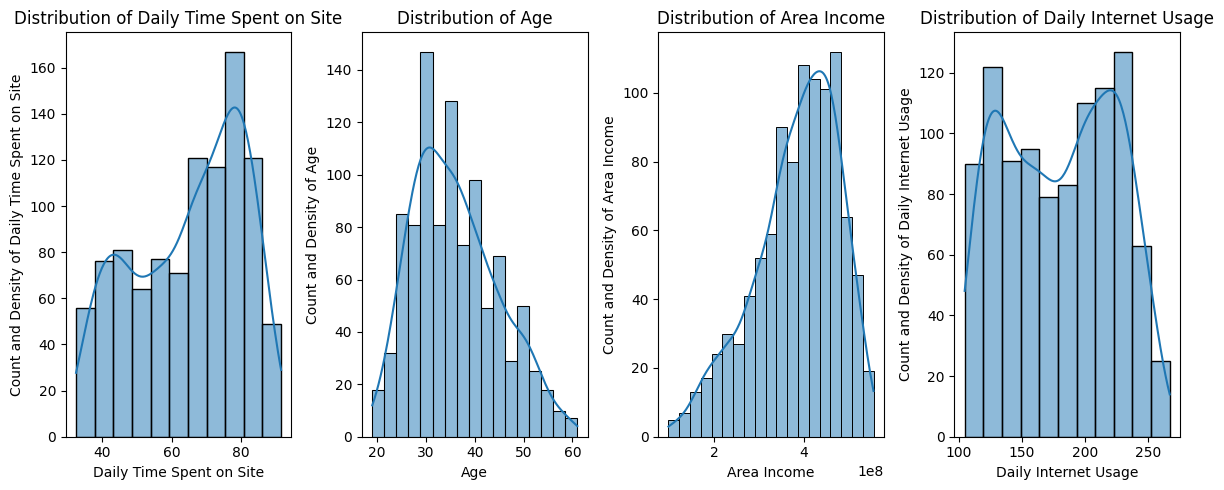

In [21]:
# Hisplot function implementation
plot_dynamic_hisplots_kdeplots(df=df, col_series=nums_cols, ncols=4, figsize=(12, 5))

In [22]:
# Distribution type analysis
def identify_distribution_types(df, col_series, uniform_cols=None, multimodal_cols=None):
    """
    Identifies and categorizes the distribution type of each numerical column in the DataFrame based on skewness and kurtosis.
    Allows manual specification of columns suspected to be uniform or bimodal/multimodal.

    Parameters:
    df : pd.DataFrame
        The input DataFrame containing the data.
    col_series : list of str
        List of column names to analyze for distribution type.
    uniform_cols : list of str, optional
        List of column names suspected to be uniform. Default is None.
    bimodal_cols : list of str, optional
        List of column names suspected to be bimodal/multimodal. Default is None.

    Returns:
    pd.DataFrame: A DataFrame containing the columns' names, skewness values, kurtosis values, and identified distribution type.
    """
    # Initialize lists to store results
    mean_list = []
    median_list = []
    mode_list = []
    skew_type_list = []
    skew_val_list = []
    kurtosis_val_list = []

    # Loop through each column to calculate distribution metrics
    for col in col_series:
        data = df[col].dropna()  # Remove any NaN values

        # Calculate summary statistics
        mean = round(data.mean(), 3)
        median = data.median()
        mode = data.mode()[0] if not data.mode().empty else median  # Handle case where mode is empty
        skew_val = round(skew(data, nan_policy="omit"), 3)
        kurtosis_val = round(kurtosis(data, nan_policy="omit"), 3)

        # Identify distribution type based on skewness and summary statistics
        if (mean == median == mode) or (-0.2 < skew_val < 0.2):
            skew_type = "Normal Distribution (Symmetric)"
        elif mean < median < mode:
            if skew_val <= -1:
                skew_type = "Highly Negatively Skewed"
            elif -0.5 >= skew_val > -1:
                skew_type = "Moderately Negatively Skewed"
            else:
                skew_type = "Moderately Normal Distribution (Symmetric)"
        else:
            if skew_val >= 1:
                skew_type = "Highly Positively Skewed"
            elif 0.5 <= skew_val < 1:
                skew_type = "Moderately Positively Skewed"
            else:
                skew_type = "Moderately Normal Distribution (Symmetric)"

        # Append the results to the lists
        mean_list.append(mean)
        median_list.append(median)
        mode_list.append(mode)
        skew_type_list.append(skew_type)
        skew_val_list.append(skew_val)
        kurtosis_val_list.append(kurtosis_val)

    # Create a DataFrame to store the results
    dist = pd.DataFrame({
        "Column Name": col_series,
        "Mean": mean_list,
        "Median": median_list,
        "Mode": mode_list,
        "Skewness": skew_val_list,
        "Kurtosis": kurtosis_val_list,
        "Type of Distribution": skew_type_list
    })

    # Manually assign specific distributions based on user-provided column names
    if uniform_cols:
        dist.loc[dist['Column Name'].isin(uniform_cols), 'Type of Distribution'] = 'Uniform Distribution'
    if multimodal_cols:
        dist.loc[dist['Column Name'].isin(multimodal_cols), 'Type of Distribution'] = 'Multi-modal Distribution'

    return dist

In [23]:
# Distribution type function implementation
columns_to_check = nums_cols # List of columns to check distribution
uniform_columns = ['Daily Internet Usage']  # List of uniform columns (special case)
multimodal_columns = []  # List of multi-modal columns (special case)

identify_distribution_types(df, col_series=columns_to_check, uniform_cols=uniform_columns, multimodal_cols=multimodal_columns)

Column Name          Mean        Median          Mode  \
0  Daily Time Spent on Site  6.493000e+01  6.778000e+01  6.492952e+01   
1                       Age  3.600900e+01  3.500000e+01  3.100000e+01   
2               Area Income  3.850493e+08  3.990683e+08  3.990683e+08   
3      Daily Internet Usage  1.798640e+02  1.810650e+02  1.798636e+02   

   Skewness  Kurtosis                        Type of Distribution  
0    -0.372    -1.074  Moderately Normal Distribution (Symmetric)  
1     0.478    -0.405  Moderately Normal Distribution (Symmetric)  
2    -0.653    -0.079  Moderately Normal Distribution (Symmetric)  
3    -0.032    -1.258                        Uniform Distribution

Distribution types of each numerical column can be seen in above dataframe, that is almost all of them are categorized as normal distribution. 

In [24]:
# Boxplot analysis
def plot_dynamic_boxplots_violinplots(df, col_series, plot_type='boxplot', ncols=6, figsize=(26, 18), orientation='v', hue=None):
    """
    Creates a dynamic grid of either boxplots or violin plots for multiple numerical columns.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data to plot.
    col_series : list of str
        List of column names to include in the plots.
    plot_type : str, optional, default='boxplot'
        Type of plot to generate. Options are 'boxplot' or 'violinplot'.
    ncols : int, optional, default=6
        Number of columns in the subplot grid. Adjust this value to change grid width.
    figsize : tuple, optional, default=(26, 18)
        Size of the figure to control plot dimensions.
    orientation : str, optional, default='v'
        Orientation of the plots. Use 'v' for vertical and 'h' for horizontal.
    hue : str, optional, default=None
        Column name to use for color encoding. Creates separate plots for each category.

    Returns:
    -------
    None
        Displays a grid of plots.

    Examples:
    --------
    >>> # Create vertical boxplots
    >>> plot_dynamic_boxplots_violinplots(df, ['col1', 'col2'], plot_type='boxplot', orientation='v')

    >>> # Create horizontal violin plots with categorical splitting
    >>> plot_dynamic_boxplots_violinplots(df, ['col1', 'col2'], plot_type='violinplot',
                                        orientation='h', hue='category')
    """
    # Validate plot_type parameter
    if plot_type not in ['boxplot', 'violinplot']:
        raise ValueError("plot_type must be either 'boxplot' or 'violinplot'")

    # Calculate required number of rows based on number of plots and specified columns
    num_plots = len(col_series)
    nrows = math.ceil(num_plots / ncols)

    # Adjust figsize based on orientation
    if orientation == 'h':
        figsize = (figsize[1], figsize[0])  # Swap width and height for horizontal plots

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()  # Flatten the axes array for easy indexing

    # Generate plots for each column
    for i, col in enumerate(col_series):
        if plot_type == 'boxplot':
            if orientation == 'v':
                sns.boxplot(data=df, ax=ax[i], y=col, orient='v', hue=hue)
                ax[i].set_title(f'Boxplot of {col}')
            else:  # orientation == 'h'
                sns.boxplot(data=df, ax=ax[i], x=col, orient='h', hue=hue)
                ax[i].set_title(f'Boxplot of {col}')
        else: # violinplot
            if orientation == 'v':
                sns.violinplot(data=df, ax=ax[i], y=col, orient='v', hue=hue, inner_kws=dict(box_width=15, whis_width=2))
                ax[i].set_title(f'Violinplot of {col}')
            else:  # orientation == 'h'
                sns.violinplot(data=df, ax=ax[i], x=col, orient='h', hue=hue, inner_kws=dict(box_width=15, whis_width=2))
                ax[i].set_title(f'Violinplot of {col}')

    # Remove any unused subplots if total subplots exceed columns in cols
    for j in range(num_plots, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

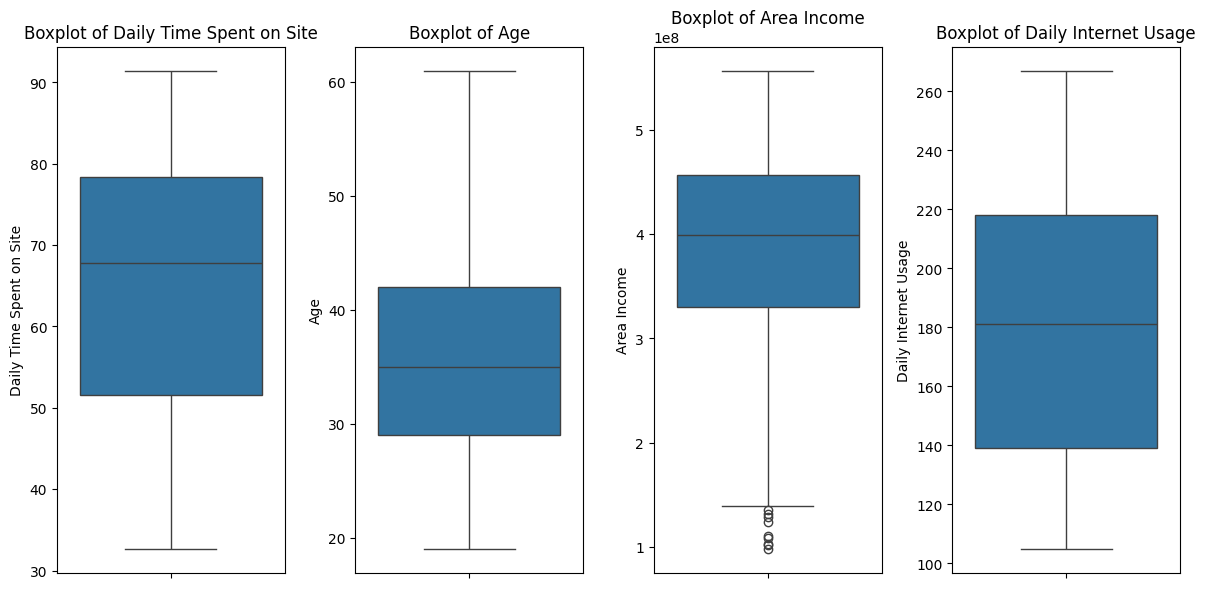

In [25]:
# Boxplot function implementation
plot_dynamic_boxplots_violinplots(df, col_series=nums_cols, ncols=4, figsize=(12, 6), orientation='v')

There are several outliers here in the `Area Income` column, we will handle that later in the preprocessing steps after we gather some insights first, since monetary values information is quite important.

**Major Findings :**

- The distribution of our customer's `Daily Time Spent on Site`, `Age`, and `Area Income` are moderately normal distribution while `Daily Internet Usage` is uniform distribution.
 
- Based on the distribution, our customers usually spent around 1 hour per day on our site, have an average of age of 36, the median area income of our customers is Rp.38,000,000, and their average daily internet usage is 3 hours.

In [26]:
# Detect outliers in dataframe using IQR or Z-Score method
def outlier_detection(df, col_series, method='iqr', threshold=3):
    """
    Function to detect outliers in a dataframe using either the IQR or Z-Score method.
    
    Parameters:
    -----------
    df : pd.DataFrame 
        The dataframe containing the data.
    col_series : list of str
        List of column names to include in the analysis.
    method : str, optional (default='iqr')
        The method to use for outlier detection.
        Valid options are:
        - 'iqr': Interquartile Range method (default)
        - 'zscore': Z-Score method
    threshold : float, optional (default=3)
        For IQR method: multiplier for IQR to determine outlier bounds (default is 1.5)
        For Z-Score method: number of standard deviations to use as the outlier cutoff
    
    Returns:
    --------
    pd.DataFrame
        A summary dataframe containing:
        - Column Name: Name of the analyzed column
        - Outlier Exist: Boolean indicating if outliers were found
        - Lower Limit: Lower bound for outlier detection
        - Upper Limit: Upper bound for outlier detection
        - Outlier Data: Number of outliers detected
        - Non-Outlier Data: Number of non-outliers
        - Outlier Percentage (%): Percentage of data points identified as outliers
    
    Examples:
    --------
    # Using IQR method
    result_iqr = outlier_detection(df, ['column1', 'column2'], method='iqr')
    
    # Using Z-Score method
    result_zscore = outlier_detection(df, ['column1', 'column2'], method='zscore', threshold=3)
    """
    # Input validation
    if method.lower() not in ['iqr', 'zscore']:
        raise ValueError("Method must be either 'iqr' or 'zscore'")
    
    print(f'Amount of Rows: {len(df)}')
    
    # Initialize lists to store results
    outlier = []  # Store the number of outlier rows per column
    no_outlier = []  # Store the number of non-outlier rows per column
    is_outlier = []  # Boolean indicating whether any outliers exist in the column
    low_bound = []  # Lower bound for outliers
    high_bound = []  # Upper bound for outliers
    outlier_percentage = []  # Percentage of outliers for each column

    # Start with all rows marked as True (non-outliers) in the cumulative filter
    filtered_entries = np.array([True] * len(df))

    # Loop through each column
    for col in col_series:
        if method.lower() == 'iqr':
            # IQR method
            Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
            Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
            IQR = Q3 - Q1  # Interquartile range
            lower_bound = Q1 - (IQR * 1.5)  # Lower bound for outliers
            upper_bound = Q3 + (IQR * 1.5)  # Upper bound for outliers

            # Create a filter that identifies non-outliers for the current column
            filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))
            
        elif method.lower() == 'zscore':
            # Z-Score method
            
            # Calculate Z-Scores
            z_scores = np.abs(stats.zscore(df[col]))

            # Create a filter that identifies non-outliers
            filter_outlier = (z_scores < threshold)
            
            mean = df[col].mean() # mean of the column
            std = df[col].std() # standard deviation of the column
            lower_bound = mean - (threshold * std) # Lower bound for outliers
            upper_bound = mean + (threshold * std) # Upper bound for outliers

        # Calculate statistics
        outlier_count = len(df[~filter_outlier]) # Count of outliers
        non_outlier_count = len(df[filter_outlier]) # Count of non-outliers
        outlier_pct = round((outlier_count / len(df)) * 100, 2) # Percentage of outliers

        # Store results
        outlier.append(outlier_count)
        no_outlier.append(non_outlier_count)
        is_outlier.append(df[col][~filter_outlier].any()) # Whether any outliers exist
        low_bound.append(lower_bound)
        high_bound.append(upper_bound)
        outlier_percentage.append(outlier_pct)

        # Update cumulative filter
        filtered_entries = filtered_entries & filter_outlier

    # Print summary statistics
    print(f'Amount of Outlier Rows (Across All Columns): {len(df[~filtered_entries])}')
    print(f'Amount of Non-Outlier Rows (Across All Columns): {len(df[filtered_entries])}')
    print(f'Percentage of Outliers: {round(len(df[~filtered_entries]) / len(df) * 100, 2)}%')
    print()

    # Create and return summary dataframe
    check_outliers = pd.DataFrame({
        'Column Name': col_series,
        'Outlier Exist': is_outlier,
        'Lower Limit': low_bound,
        'Upper Limit': high_bound,
        'Outlier Data': outlier,
        'Non-Outlier Data': no_outlier,
        'Outlier Percentage (%)': outlier_percentage
    })

    return check_outliers

In [27]:
# Outliers cheking with IQR method function implementation
outlier_summary = outlier_detection(df, col_series=nums_cols, method='iqr')
outlier_summary

Amount of Rows: 1000
Amount of Outlier Rows (Across All Columns): 9
Amount of Non-Outlier Rows (Across All Columns): 991
Percentage of Outliers: 0.9%



Column Name  Outlier Exist   Lower Limit   Upper Limit  \
0  Daily Time Spent on Site          False  1.133375e+01  1.185637e+02   
1                       Age          False  9.500000e+00  6.150000e+01   
2               Area Income           True  1.395105e+08  6.470028e+08   
3      Daily Internet Usage          False  2.011250e+01  3.371925e+02   

   Outlier Data  Non-Outlier Data  Outlier Percentage (%)  
0             0              1000                     0.0  
1             0              1000                     0.0  
2             9               991                     0.9  
3             0              1000                     0.0

### Categorical Columns

In [28]:
cats_cols

['Gender', 'City', 'Province', 'Category', 'Clicked on Ad']

In [29]:
# Countplot analysis
def plot_dynamic_countplot(df, col_series, ncols=6, figsize=(26, 18), stat='count', hue=None, order=None):
    """
    Plots a dynamic grid of countplot for a list of categorical columns from a DataFrame.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the data to plot.
    col_series : list of str
        List of column names to include in the countplots.
    ncols : int, optional, default=6
        Number of columns in the subplot grid. Adjust this value to change grid width.
    figsize : tuple, optional, default=(26, 18)
        Size of the figure to control plot dimensions.
    stat : str, optional, default='count'
        The statistic to compute for the bars
    hue : str, optional, default=None
        Column name to use for color encoding
    order : list, optional, default=None
        Specific ordering for the categorical variables

    Returns:
    -------
    None
        Displays a grid of countplots.
    """

    # Calculate required number of rows based on number of plots and specified columns
    num_plots = len(col_series)
    nrows = math.ceil(num_plots / ncols)

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    ax = ax.flatten()  # Flatten the axes array for easy indexing

    # Generate countplot for each column
    for i, col in enumerate(col_series):
        # Get the specific order for this column if provided
        if isinstance(order, list):
            current_order = order[i].tolist() if hasattr(order[i], 'tolist') else order[i]
        else:
            current_order = None

        sns.countplot(data=df,
                     ax=ax[i],
                     x=col,
                     stat=stat,
                     hue=hue,
                     order=current_order)
        if hue is not None:
            ax[i].set_title(f'Countplot sof {col} by {hue}s')
        else:
            ax[i].set_title(f'Countplot of {col}')
        ax[i].set_ylabel(f'Count of {col}')
        ax[i].set_xlabel(f'{col}')

        # Add value labels on top of bars
        for p in ax[i].patches:
            ax[i].annotate(
                f'{int(p.get_height())}',  # The text to display
                (p.get_x() + p.get_width() / 2., p.get_height()),  # The position
                ha='center',  # Horizontal alignment
                va='bottom'   # Vertical alignment
            )

    # Remove any unused subplots if total subplots exceed columns in cols
    for j in range(num_plots, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

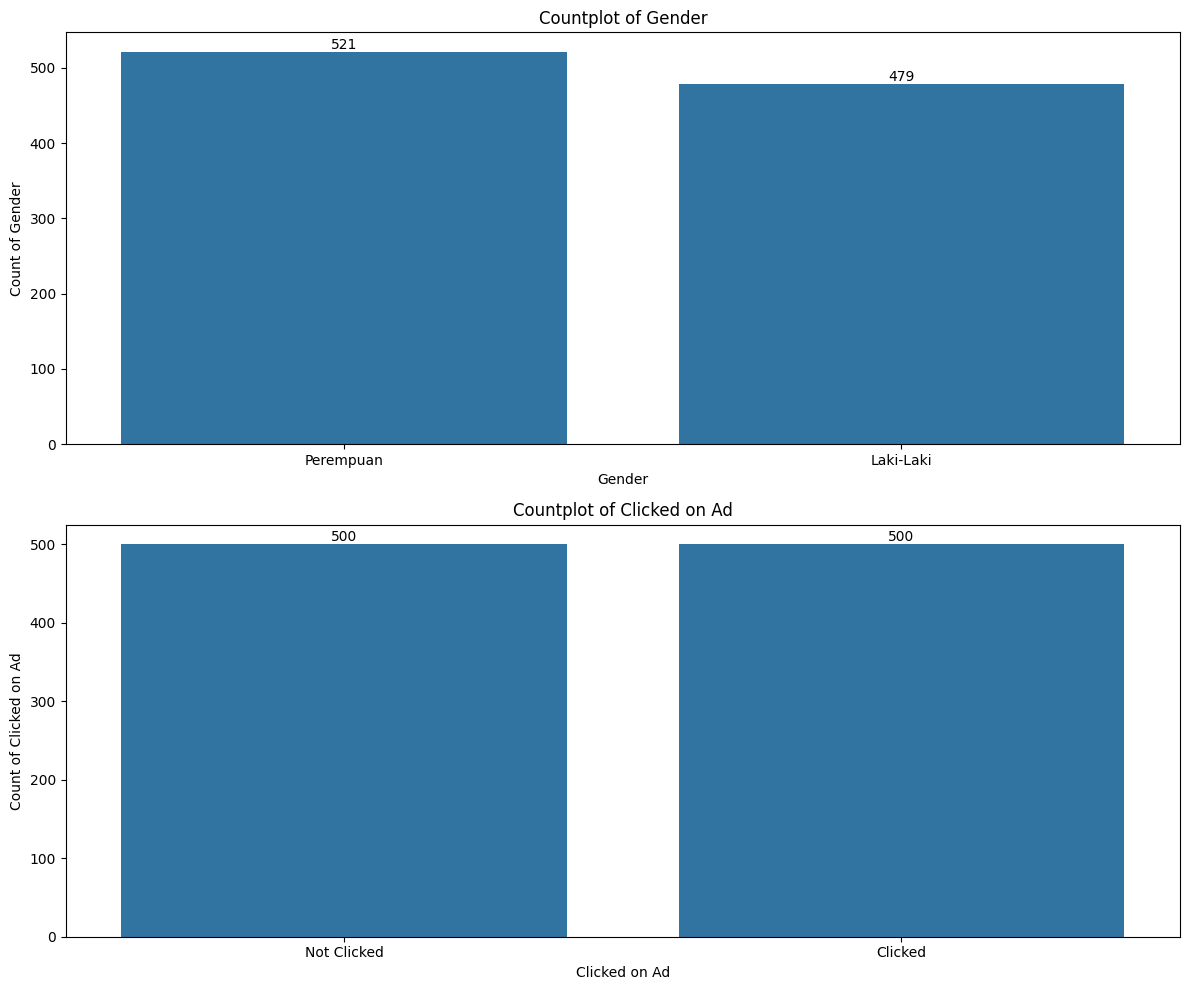

In [30]:
# Countplot function implementation (for few unique values columns)
cats_cols_few = ['Gender', 'Clicked on Ad']
plot_dynamic_countplot(df=df, col_series=cats_cols_few, ncols=1, figsize=(12, 10))

Top 5 Categories for Each Column


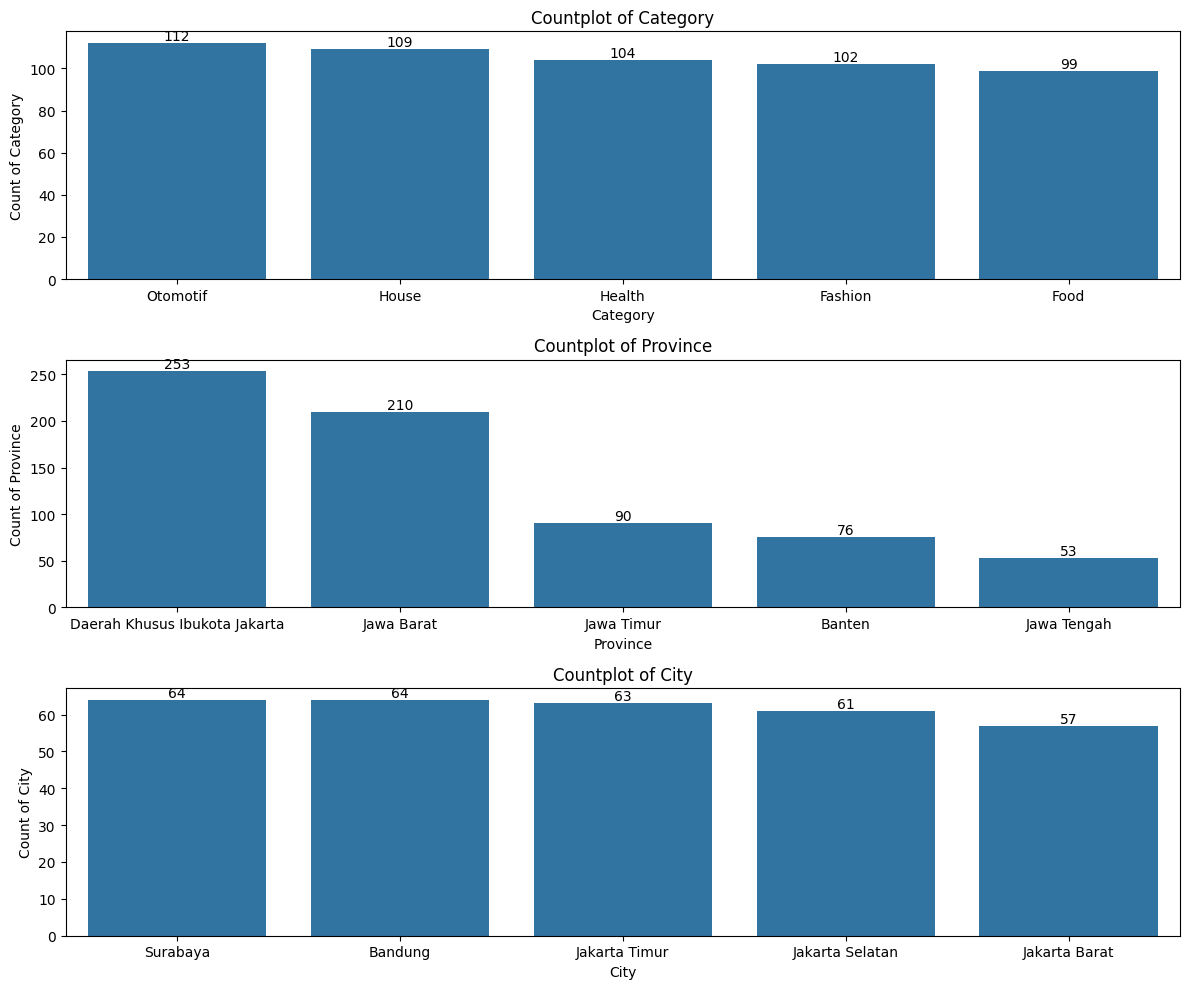

Bottom 5 Categories for Each Column


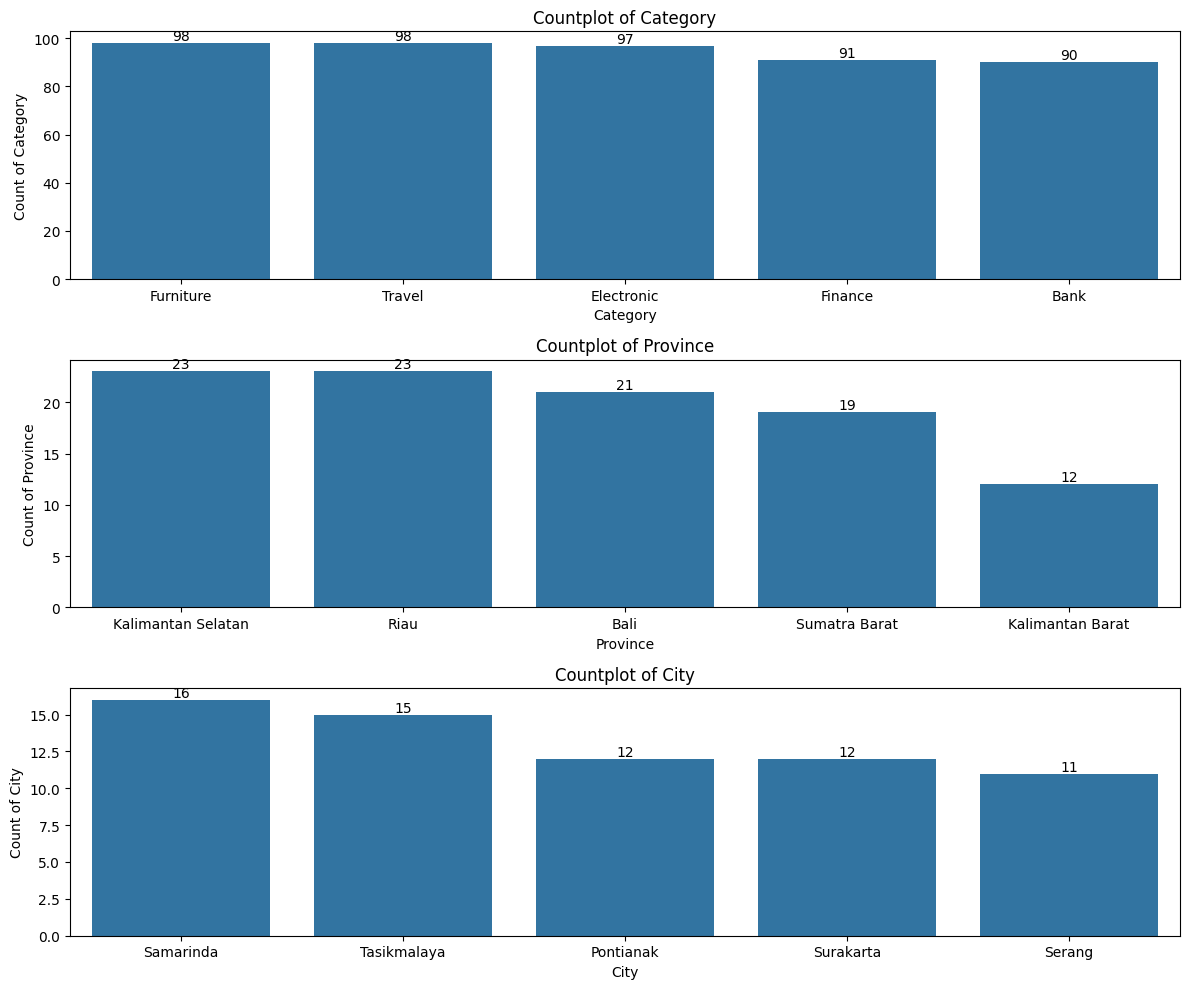

In [31]:
# Countplot function implementation (for many unique values columns)
cats_cols_many = ['Category', 'Province', 'City']

# Show top 5 categories for each column
print('Top 5 Categories for Each Column')
plot_dynamic_countplot(
    df=df,
    col_series=cats_cols_many,
    ncols=1,
    figsize=(12, 10),
    order=[df[cat].value_counts().iloc[:5].index.tolist() for cat in cats_cols_many]
)

# Show bottom 5 categories for each column
print('Bottom 5 Categories for Each Column')
plot_dynamic_countplot(
    df=df,
    col_series=cats_cols_many,
    ncols=1,
    figsize=(12, 10),
    order=[df[cat].value_counts().iloc[-5:].index.tolist() for cat in cats_cols_many]
)

**Major Findings:**

- The distribution of male and female `Gender` is almost equal
- `Province` has 2 dominant values: DKI Jakarta and Jawa Barat.
- `Category` is almost equally distributed among the all the values.

## Bivariate Analysis

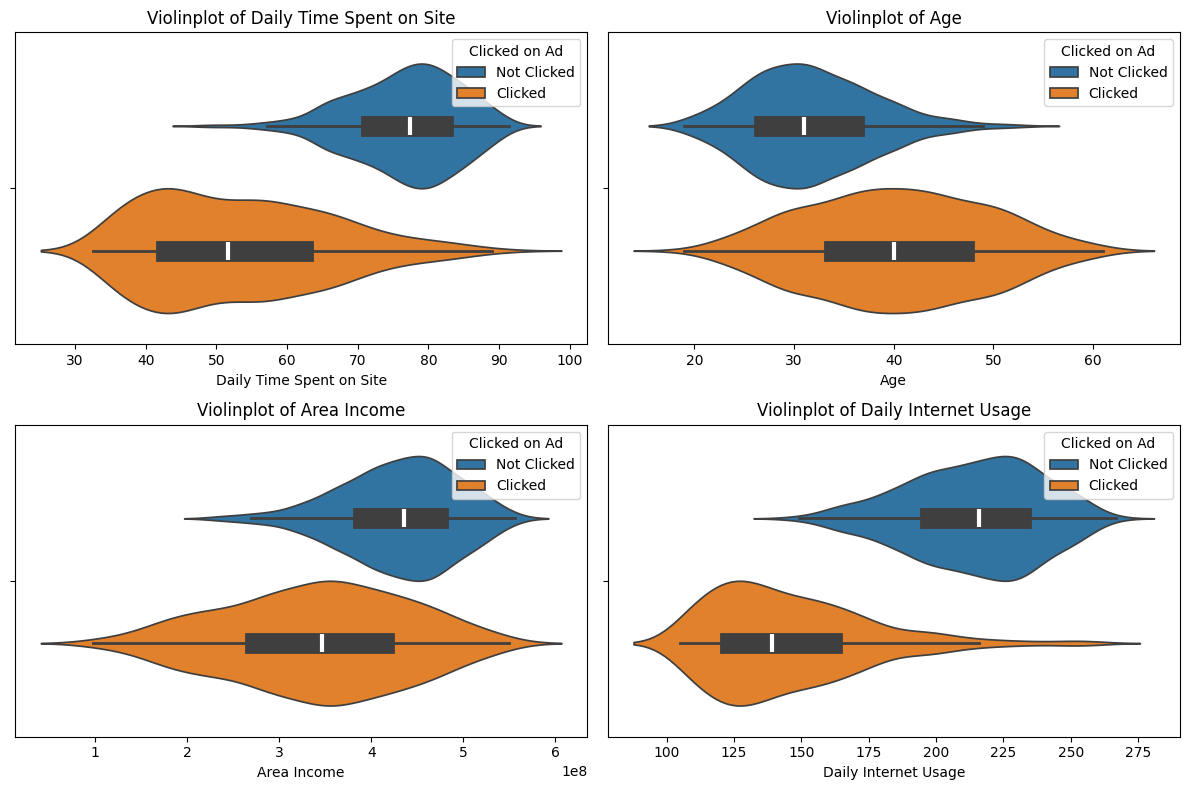

Feature  overall_count  class_Clicked_count  \
0  Daily Time Spent on Site         1000.0                500.0   
1                       Age         1000.0                500.0   
2               Area Income         1000.0                500.0   
3      Daily Internet Usage         1000.0                500.0   

   class_Not Clicked_count  overall_mean  class_Clicked_mean  \
0                    500.0  6.492952e+01        5.326098e+01   
1                    500.0  3.600900e+01        4.033400e+01   
2                    500.0  3.850493e+08        3.406831e+08   
3                    500.0  1.798636e+02        1.456182e+02   

   class_Not Clicked_mean   overall_std  class_Clicked_std  \
0            7.659807e+01  1.574127e+01       1.283706e+01   
1            3.168400e+01  8.785562e+00       8.856598e+00   
2            4.294155e+08  9.347971e+07       9.841556e+07   
3            2.141090e+02  4.362795e+01       2.962363e+01   

   class_Not Clicked_std  overall_min  class_Clicked_min  \
0           7.643672e+00        32.60              32.60   
1           6.212998e+00        19.00              19.00   
2           6.216260e+07  97975500.00        97975500.00   
3           2.414247e+01       104.78             104.78   

   class_Not Clicked_min   overall_25%  class_Clicked_25%  \
0           4.822000e+01  5.154500e+01       4.291500e+01   
1           1.900000e+01  2.900000e+01       3.400000e+01   
2           2.326744e+08  3.298201e+08       2.739265e+08   
3           1.461900e+02  1.390175e+02       1.236350e+02   

   class_Not Clicked_25%   overall_50%  class_Clicked_50%  \
0           7.182000e+01  6.778000e+01       5.163000e+01   
1           2.700000e+01  3.500000e+01       4.000000e+01   
2           3.910686e+08  3.990683e+08       3.469286e+08   
3           1.977800e+02  1.810650e+02       1.390150e+02   

   class_Not Clicked_50%   overall_75%  class_Clicked_75%  \
0           7.745500e+01  7.835250e+01       6.221500e+01   
1           3.100000e+01  4.200000e+01       4.700000e+01   
2           4.352817e+08  4.566932e+08       4.141765e+08   
3           2.160150e+02  2.182875e+02       1.613625e+02   

   class_Not Clicked_75%   overall_max  class_Clicked_max  \
0           8.198250e+01  9.143000e+01       9.137000e+01   
1           3.600000e+01  6.100000e+01       6.100000e+01   
2           4.725904e+08  5.563936e+08       5.496469e+08   
3           2.316550e+02  2.670100e+02       2.586200e+02   

   class_Not Clicked_max  overall_range  class_Clicked_range  \
0           9.143000e+01   5.883000e+01         5.877000e+01   
1           5.300000e+01   4.200000e+01         4.200000e+01   
2           5.563936e+08   4.584181e+08         4.516714e+08   
3           2.670100e+02   1.622300e+02         1.538400e+02   

   class_Not Clicked_range   overall_IQR  class_Clicked_IQR  \
0             4.321000e+01  2.680750e+01       1.930000e+01   
1             3.400000e+01  1.300000e+01       1.300000e+01   
2             3.237192e+08  1.268731e+08       1.402500e+08   
3             1.208200e+02  7.927000e+01       3.772750e+01   

   class_Not Clicked_IQR  overall_CV  class_Clicked_CV  class_Not Clicked_CV  \
0           1.016250e+01   24.243622         24.102189              9.978935   
1           9.000000e+00   24.398240         21.958144             19.609261   
2           8.152176e+07   24.277335         28.887716             14.476094   
3           3.387500e+01   24.256126         20.343351             11.275787   

   overall_skewness  class_Clicked_skewness  class_Not Clicked_skewness  \
0         -0.371617                0.512533                   -0.583254   
1          0.478423                0.025159                    0.479261   
2         -0.653140               -0.182054                   -0.497589   
3         -0.031521                1.140087                   -0.325094   

   overall_kurtosis  class_Clicked_kurtosis  class_Not Clicked_kurtosis  
0         -1.074387               -0.46

In [32]:
# # Boxplot with hue target
# plot_dynamic_boxplots_violinplots(df, col_series=nums_cols, 
#                                   plot_type='boxplot', ncols=2, figsize=(8, 12),
#                                   orientation='h',
#                                   hue='Clicked on Ad')

# # Kdeplot with hue target
# plot_dynamic_hisplots_kdeplots(df, col_series=nums_cols, 
#                                plot_type='kdeplot', ncols=2, 
#                                figsize=(14, 8),
#                                hue='Clicked on Ad', fill=True)

# Violinplot with hue target (combination of both of them)
plot_dynamic_boxplots_violinplots(df, col_series=nums_cols, 
                                  plot_type='violinplot', ncols=2, figsize=(8, 12),
                                  orientation='h',
                                  hue='Clicked on Ad')

# Get better understanding of the data through descriptive statistics with hue target
describe_numerical_combined(df, nums_cols, target_col='Clicked on Ad')

**Major Findings (Check the statistics):**

- The more time customers spent time on the site, the less likely they will click on an ad.

- The average age of customers that clicked on an ad is 40, while the average for those that didn't is 31.

- The median income of customers that clicked on an ad is considerably lower than those that didn't.

- The more time customers use the internet daily, the less likely they wil click on an ad.

In [33]:
# Regplot analysis
def plot_dynamic_regplots(df, x_col, col_series, hue=None, ncols=3, figsize=(18, 6)):
    """
    Create multiple regression plots with R-squared values and equations.
    
    Args:
        df (pandas.DataFrame): Input dataframe
        x_col (str): Column name for x-axis
        col_series (list): List of column names for y-axis
        hue (str, optional): Column name for color grouping
        ncols (int): Number of columns in subplot grid
        figsize (tuple): Figure size (width, height)
    """
    if df is None or df.empty or not col_series:
        raise ValueError("DataFrame and column list cannot be empty")

    # Calculate R-squared value and regression equation (for display purpose only)
    def calculate_r_squared(x, y):
        slope, intercept = np.polyfit(x, y, 1)
        y_pred = slope * x + intercept
        ss_residual = np.sum((y - y_pred) ** 2)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_residual / ss_total), slope, intercept

    # Calculate required number of rows based on number of plots and specified columns
    num_plots = len(col_series)
    nrows = math.ceil(num_plots / ncols)

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    
    # If only one plot, ax is not an array
    if num_plots == 1:
        ax = [ax]
    else:
        ax = ax.flatten()

    # Generate plots for each column
    for i, col in enumerate(col_series):
        # Regression plot
        sns.regplot(data=df, ax=ax[i], x=x_col, y=col, scatter_kws={'s':20, 'alpha':0.4}, line_kws={'color':'red'}, ci=False)

        # Scatterplot
        sns.scatterplot(data=df, ax=ax[i], x=x_col, y=col, hue=hue)

        # Calculating and displaying R-squared
        x = df[x_col]
        y = df[col]
        r_squared, slope, intercept = calculate_r_squared(x, y)

        # Displaying R-squared value
        ax[i].annotate(f'R-squared: {r_squared:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, color='black')

        # Displaying regression equation
        ax[i].annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=10, color='blue')

        ax[i].set_title(f'Regression Plot of {col} and {x_col}')
        ax[i].grid(True)
    
    # Remove any unused subplots if total subplots exceed columns in cols
    for j in range(num_plots, len(ax)):
        fig.delaxes(ax[j])
        
    plt.tight_layout()
    plt.show()

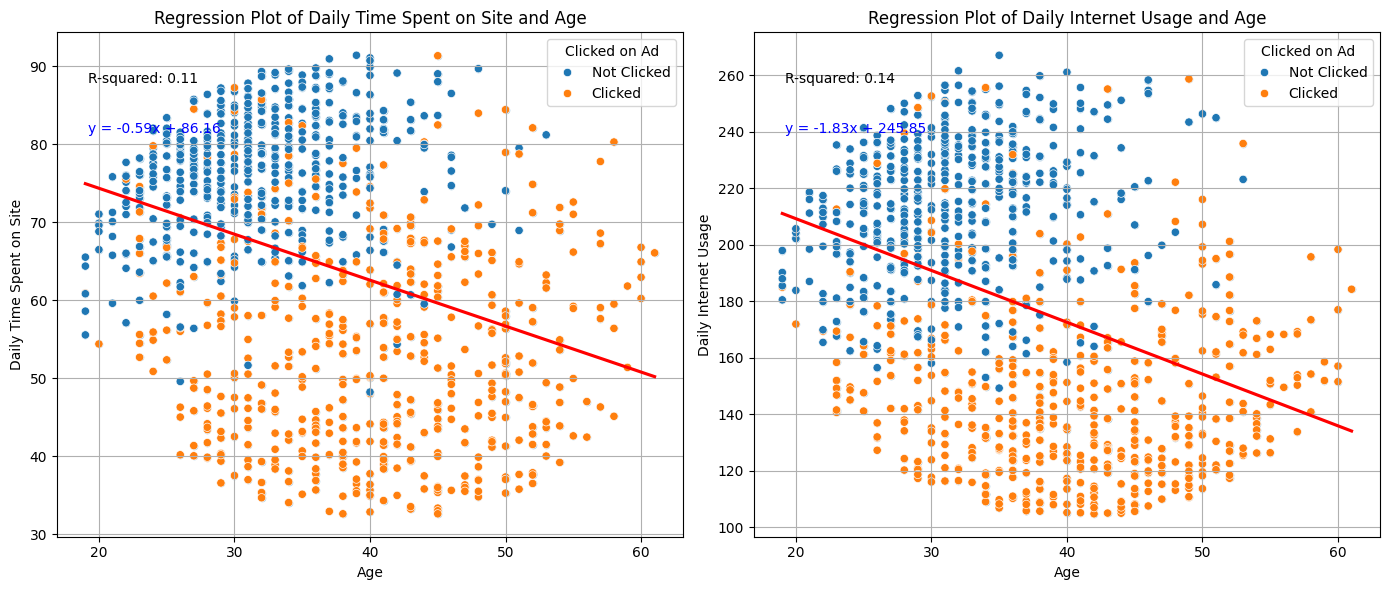

In [34]:
# Regplot of age vs daily time spent on site and daily internet usage
included_col = ['Daily Time Spent on Site', 'Daily Internet Usage']
plot_dynamic_regplots(df, x_col='Age', 
                      col_series=included_col, 
                      hue='Clicked on Ad', ncols=2, figsize=(14, 6))

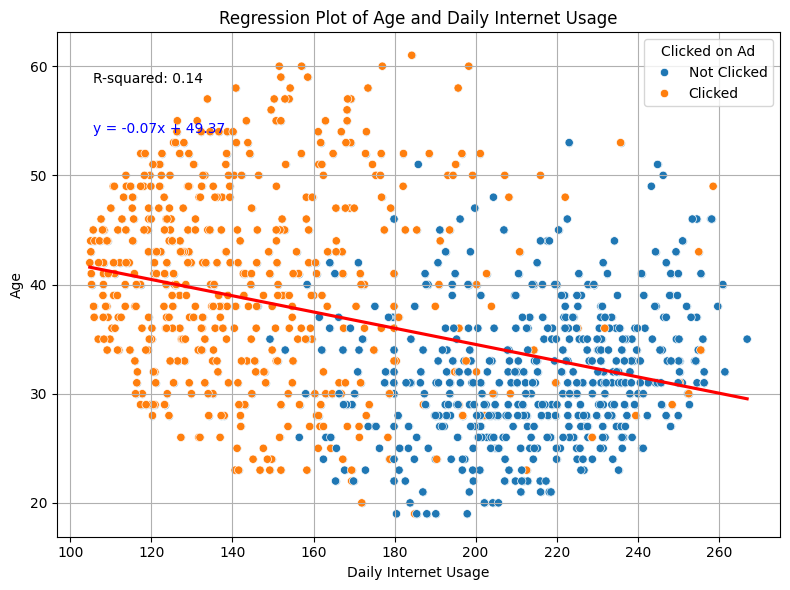

In [35]:
# Regplot of daily internet usage vs daily time spent on site
plot_dynamic_regplots(df, x_col='Daily Internet Usage', 
                      col_series=['Age'],
                      hue='Clicked on Ad', ncols=1, figsize=(8, 6))

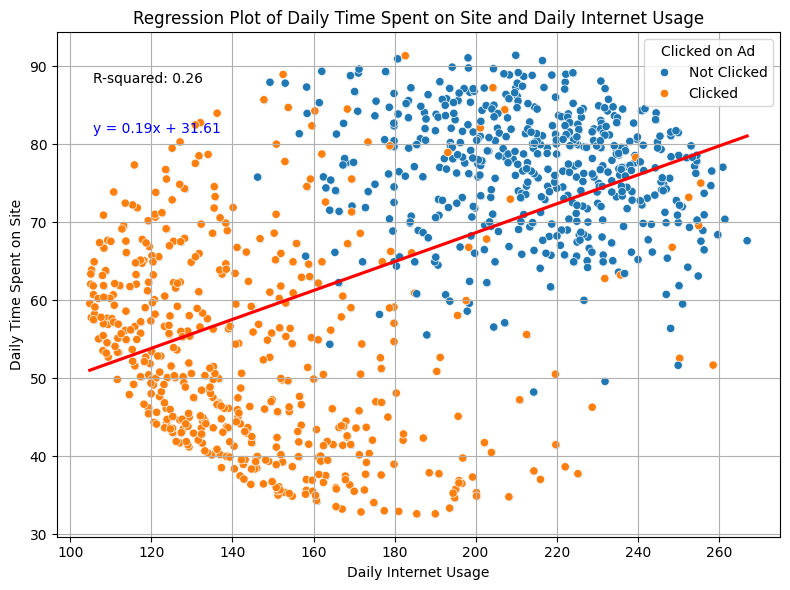

In [36]:
# Regplot of daily internet usage vs daily time spent on site 
plot_dynamic_regplots(df, x_col='Daily Internet Usage', 
                      col_series=['Daily Time Spent on Site'],
                      hue='Clicked on Ad', ncols=1, figsize=(8, 6))

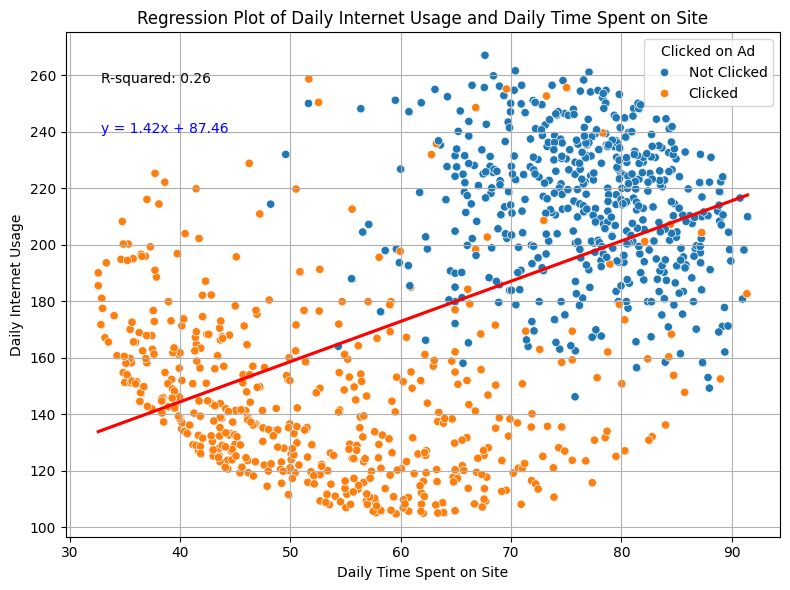

In [37]:
# Regplot of daily internet usage vs daily time spent on site 
plot_dynamic_regplots(df, x_col='Daily Time Spent on Site',
                      col_series=['Daily Internet Usage'],
                      hue='Clicked on Ad', ncols=1, figsize=(8, 6))

Concept Reminder :
- A low R-squared value (close to 0) suggests that the independent variable(s) does not explain much of the variability in the dependent variable, indicating a weak relationship.
- An R-squared value around 0.11 could be considered a weak to modest relationship.

**Major Findings :**
- Age is slightly negatively correlated with Daily Internet Usage. Older customers spend less time on the internet on average compared to younger customers.
- Age is also slightly negatively correlated with Daily Time Spent on Site.
- Internet usage is slightly positively correlated with time spent on site. But there is a quite clear separation between two clusters of data. One cluster is less active and the other more so. Less active customers have a higher tendency to click on an ad compared to more active customers.

In [38]:
# Plot the distribution of binary target variable for a categorical feature
def plot_categorical_stacked_value(df, category_col, target='Risk_Flag', pos_class='Default', neg_class='No Default',
                                    method='count', display_type='all', n_groups=5, figsize=(24, 12)):
    """
    Plot the distribution of binary target variable for a categorical feature using either count or rate method.

    Parameters:
    -----------
    df : pandas DataFrame
        The input dataframe containing the data
    category_col : str
        Name of the categorical column to analyze
    target : str, optional (default='Risk_Flag')
        Name of the target column containing binary classes
    pos_class : str, optional (default='Default')
        Name of the positive class in target column
    neg_class : str, optional (default='No Default')
        Name of the negative class in target column
    method : str, optional (default='count')
        Method to sort the categories:
        - 'count': Sort by absolute number of positive class
        - 'rate': Sort by positive class rate (positive / total)
        - 'total': Sort by total number of instances in each category
    display_type : str, optional (default='all')
        Type of display:
        - 'all': Show all values in descending order
        - 'top': Show only top n_groups
        - 'bottom': Show only bottom n_groups
        - 'both': Show both top and bottom n_groups
    n_groups : int, optional (default=5)
        Number of groups to display when using 'top', 'bottom', or 'both' display_type
    figsize : tuple, optional (default=(24, 12))
        Size of the figure

    Returns:
    --------
    None
        Displays a figure with the specified plot configuration
    """
    
    # Create the grouped data
    grouped_data = df.groupby([category_col, target]).size().unstack(fill_value=0)
    
    # Calculate positive rate and total for all categories
    grouped_data['Positive_Rate'] = grouped_data[pos_class] / (grouped_data[pos_class] + grouped_data[neg_class])
    grouped_data['Total'] = grouped_data[pos_class] + grouped_data[neg_class]

    if method == 'count':
        # Sort by absolute number of positive class
        sorted_data = grouped_data.sort_values(pos_class, ascending=False)
        title_prefix = f'Number of {pos_class}'
    elif method == 'rate':
        # Sort by positive class rate
        sorted_data = grouped_data.sort_values('Positive_Rate', ascending=False)
        title_prefix = f'{pos_class} Rate'
    elif method == 'total':
        # Sort by total number of instances
        sorted_data = grouped_data.sort_values('Total', ascending=False)
        title_prefix = 'Total Count'
    else:
        raise ValueError("Method must be one of: 'count', 'rate', or 'total'")

    # Drop the auxiliary columns before plotting
    sorted_data = sorted_data.drop(['Positive_Rate', 'Total'], axis=1)

    # Select data based on display_type
    if display_type == 'all':
        plot_data = sorted_data
        n_subplots = 1
        subplot_titles = [f'All {category_col}s by {title_prefix} (Descending Order)']
    elif display_type == 'top':
        plot_data = sorted_data.head(n_groups)
        n_subplots = 1
        subplot_titles = [f'Top {n_groups} {category_col}s by {title_prefix}']
    elif display_type == 'bottom':
        plot_data = sorted_data.tail(n_groups)
        n_subplots = 1
        subplot_titles = [f'Bottom {n_groups} {category_col}s by {title_prefix}']
    elif display_type == 'both':
        top_data = sorted_data.head(n_groups)
        bottom_data = sorted_data.tail(n_groups)
        n_subplots = 2
        subplot_titles = [
            f'Top {n_groups} {category_col}s by {title_prefix}',
            f'Bottom {n_groups} {category_col}s by {title_prefix}'
        ]
    else:
        raise ValueError("display_type must be one of: 'all', 'top', 'bottom', or 'both'")

    # Adjust figure size based on number of categories
    if display_type == 'all':
        height = max(12, len(plot_data) * 0.4)
        figsize = (figsize[0], height)

    # Create the plot
    fig, ax = plt.subplots(n_subplots, 1, figsize=figsize)
    
    # Convert ax to array if it's a single subplot
    if n_subplots == 1:
        ax = [ax]

    # Plot the data
    if display_type == 'both':
        plot_datasets = [top_data, bottom_data]
    else:
        plot_datasets = [plot_data]

    for i, (data, title) in enumerate(zip(plot_datasets, subplot_titles)):
        data.plot(kind='bar', stacked=True, ax=ax[i])
        ax[i].set_title(title)
        ax[i].set_ylabel('Count')
        ax[i].legend(title=target)

        # Add value labels
        for container in ax[i].containers:
            ax[i].bar_label(container, label_type='center')

        # Add appropriate labels above the bars based on method
        total_heights = data.sum(axis=1)
        
        if method == 'count':
            # Show total count above bars
            for j, total in enumerate(total_heights):
                ax[i].text(j, total + (total * 0.02), total, ha='center', va='bottom')
        elif method == 'rate':
            # Show rate percentage above bars
            rates = grouped_data.loc[data.index, 'Positive_Rate']
            for j, (rate, total) in enumerate(zip(rates, total_heights)):
                ax[i].text(j, total + (total * 0.02), f'{rate:.1%}', 
                          ha='center', va='bottom')
        elif method == 'total':
            # Show total count above bars
            totals = grouped_data.loc[data.index, 'Total']
            for j, total in enumerate(totals):
                ax[i].text(j, total + (total * 0.02), total, 
                          ha='center', va='bottom')

        # Rotate x-axis labels
        plt.setp(ax[i].get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

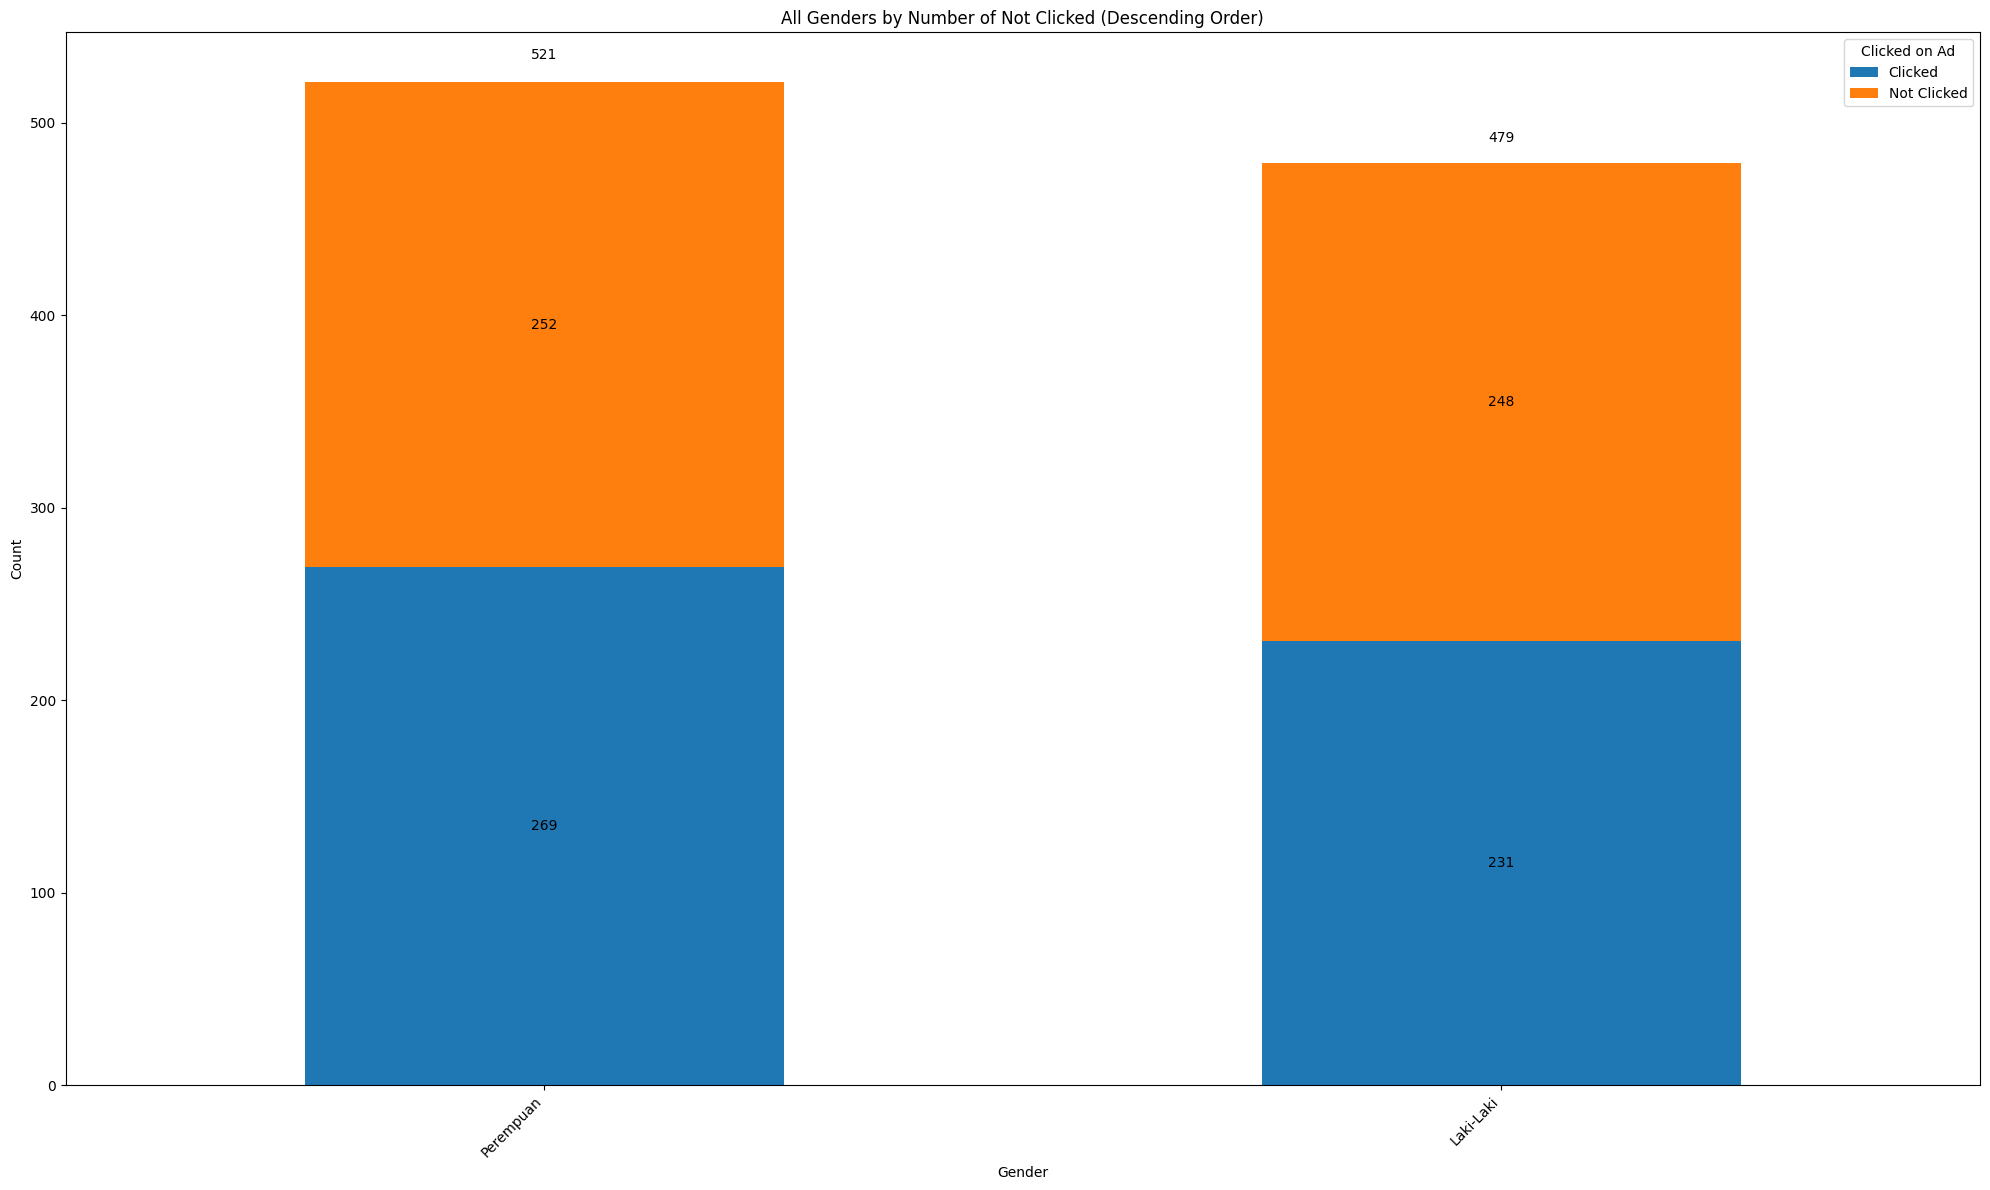

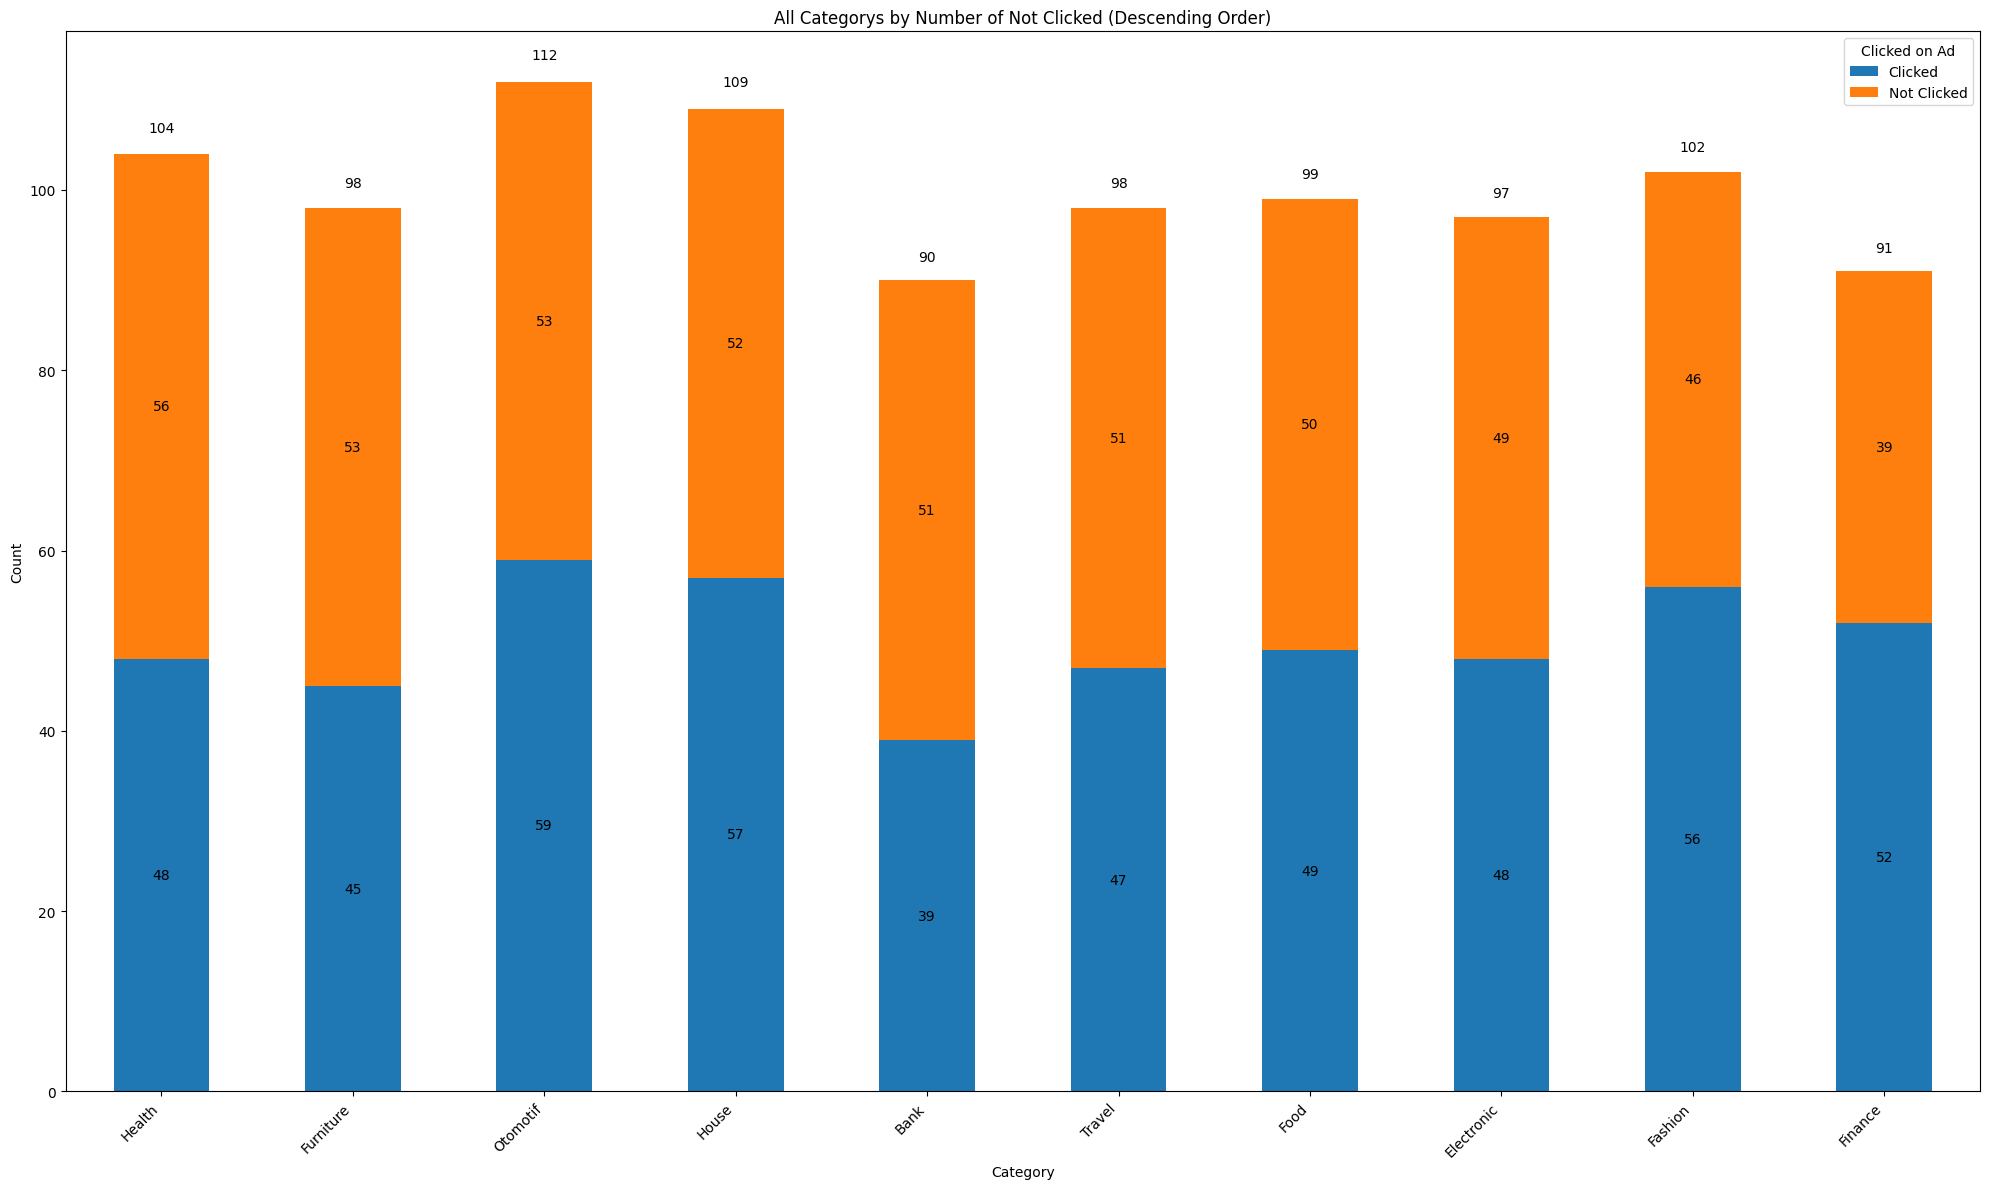

In [39]:
# Function implementation for all few unique values columns
cats_cols_few = ['Gender', 'Category']
for col in cats_cols_few:
    plot_categorical_stacked_value(df, col, target='Clicked on Ad', 
                                   pos_class='Not Clicked', 
                                   neg_class='Clicked',
                                   method='count',
                                   display_type='all', 
                                   figsize=(20, 20))

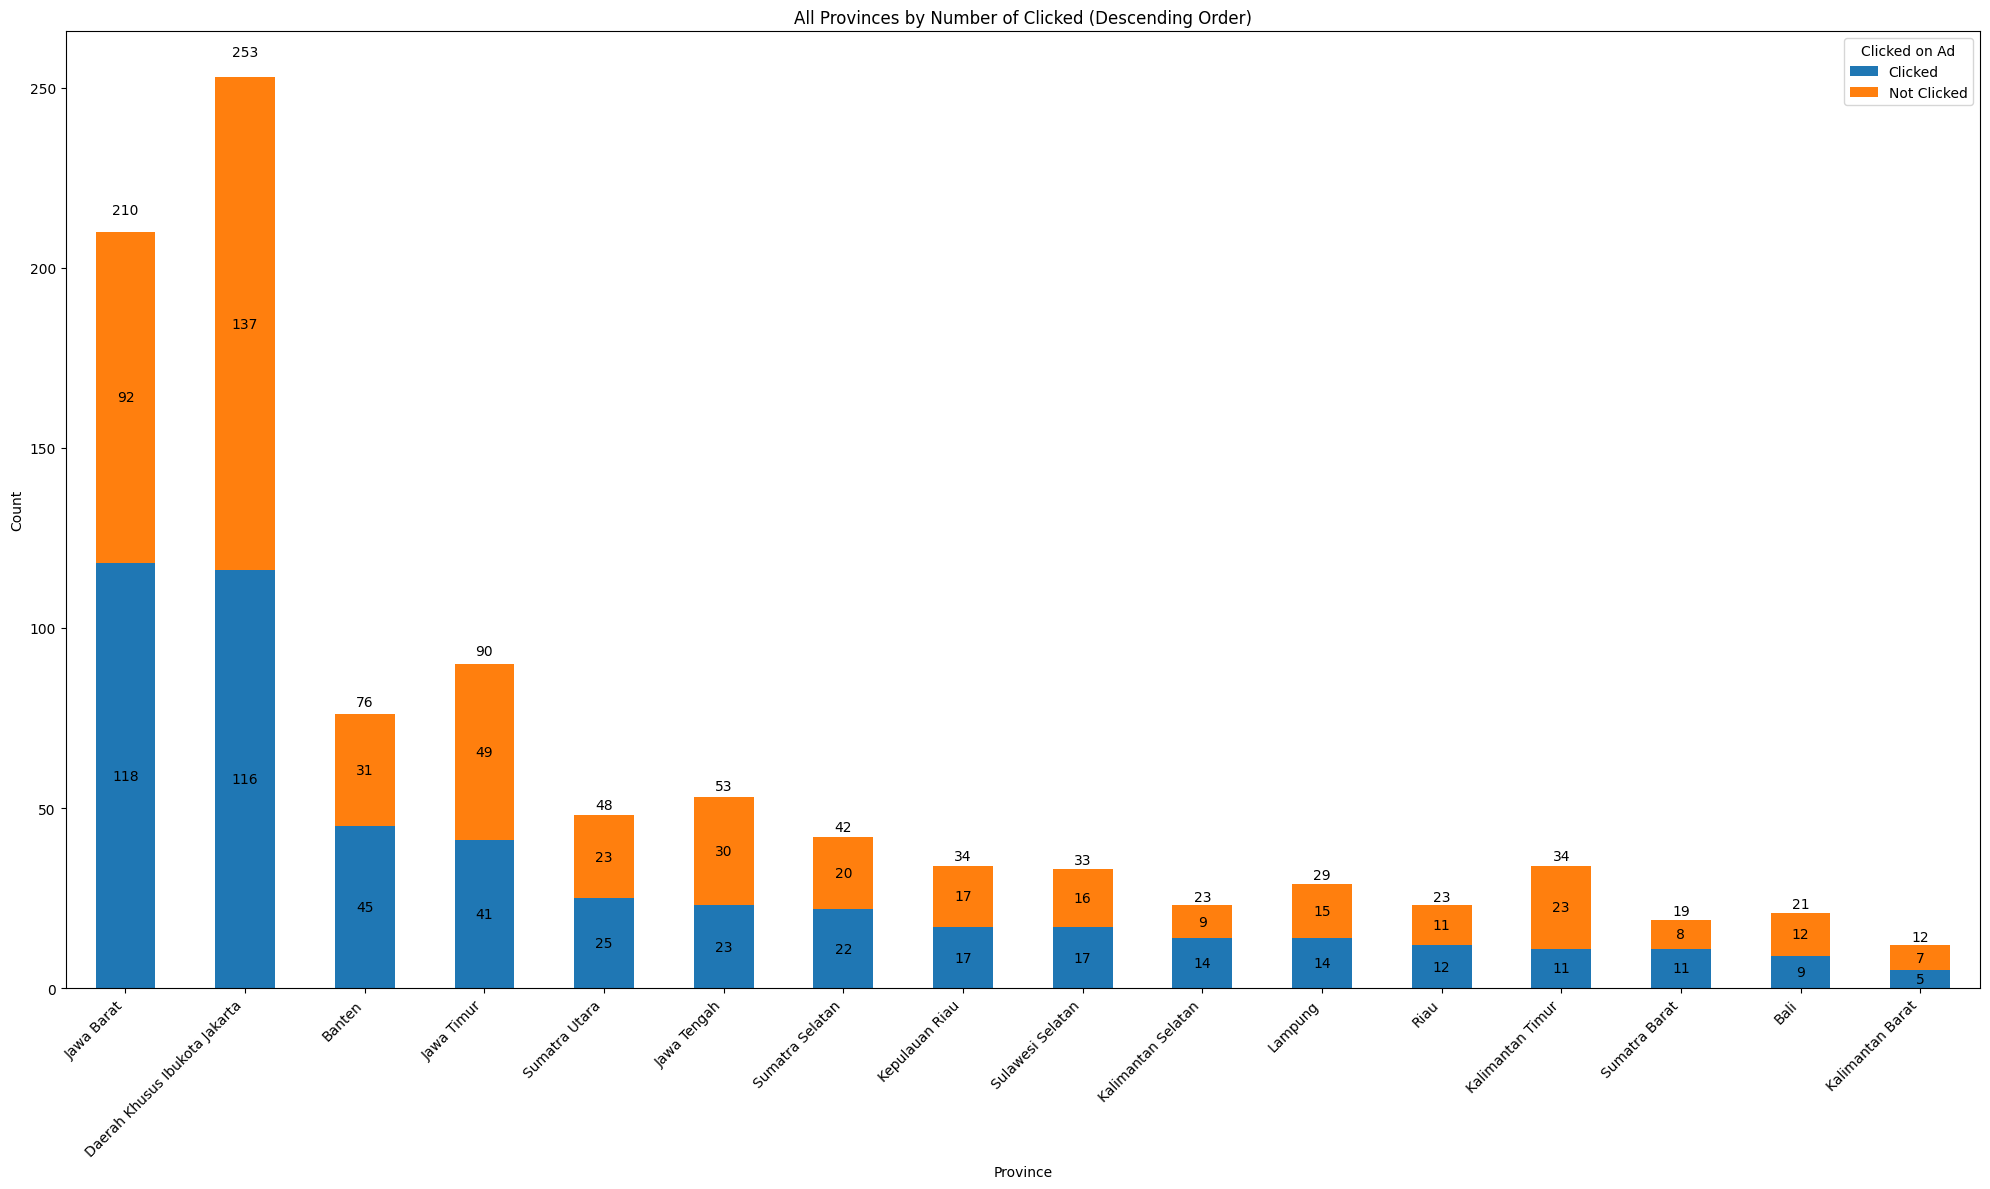

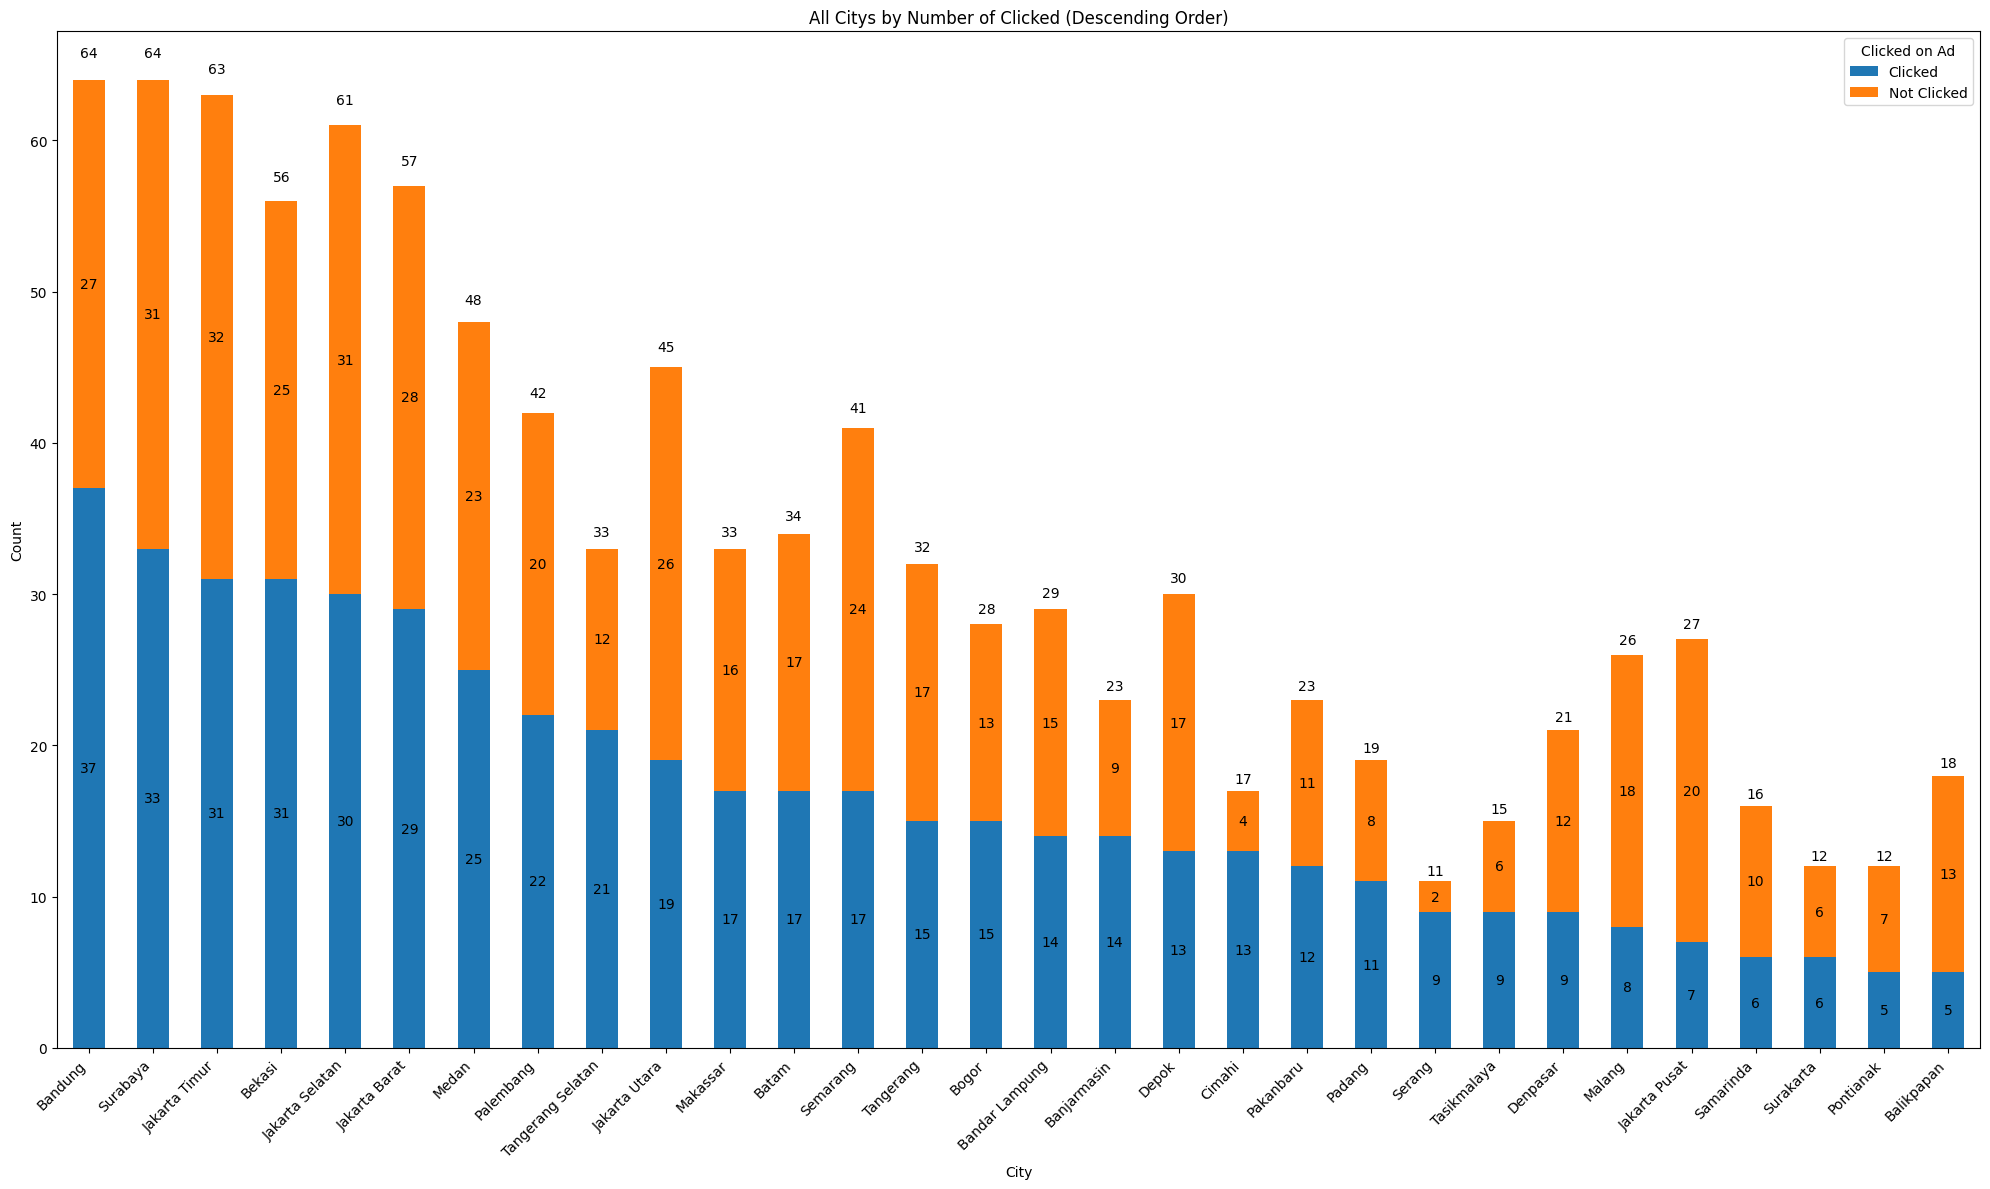

In [40]:
# Function implementation for all many unique values columns
cats_cols_many = ['Province', 'City']
for col in cats_cols_many:
    plot_categorical_stacked_value(df, col, target='Clicked on Ad', 
                                   pos_class='Clicked', 
                                   neg_class='Not Clicked',
                                   method='count',
                                   display_type='all', 
                                   figsize=(20, 20))

**Major Findings :**

- Females clicked on an ad slightly more than males overall even though the difference is not significant
- Ad categories click rates are pretty equal with none below 40% and none above 60%.
- Province with the highest amount of click on ad is Jawa Barat, while the lowest is Kalimantan Barat. The difference is quite large between the top 2 and the rest.
- City with the highest amount of click on ad is Bandung, while the lowest are Balikpapan and Pontianak.

## Multivariate Analysis

> As we have seen from the regression plot before that the numerical distribution is not linear, so we use methods of calculating the correlation that can capture non-linear relationship better, which is Spearmann method.

**Reminder About Correlation Method**

If you have a non-linear distribution of your numerical features, using Pearson correlation may not capture the full extent of the relationship between variables because Pearson correlation measures linear relationships. In such cases, Spearman and Kendall correlations can be more appropriate alternatives as they are non-parametric measures and can capture monotonic relationships, which may better reflect non-linear associations.

Here's a brief overview of each correlation method and its suitability for different types of relationships:

1. **Pearson Correlation**:
   - Measures the linear relationship between two continuous variables.
   - Assumes that variables are normally distributed and have a linear relationship.
   - Sensitive to outliers.
   - Suitable for linear relationships.

2. **Spearman Correlation**:
   - Measures the strength and direction of monotonic relationships between two continuous or ordinal variables.
   - Does not assume linearity.
   - More robust to outliers compared to Pearson correlation.
   - Suitable for non-linear relationships.

3. **Kendall Correlation**:
   - Measures the strength and direction of ordinal relationships between two variables.
   - Does not assume linearity.
   - Less affected by outliers compared to Pearson correlation.
   - Suitable for non-linear relationships, especially when the data is ranked or ordinal.

In summary, if you suspect that your data has non-linear relationships, it's advisable to calculate both Spearman and Kendall correlations in addition to Pearson correlation to capture different aspects of the relationships. This allows you to have a more comprehensive understanding of the associations between variables. Additionally, visual exploration through scatter plots or other graphical techniques can also provide insights into the nature of the relationships between variables.

In [41]:
# Convert target column to numerical
change_target_dtype(df, 'Clicked on Ad', target_type='numerical')

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features Using Spearman Method')

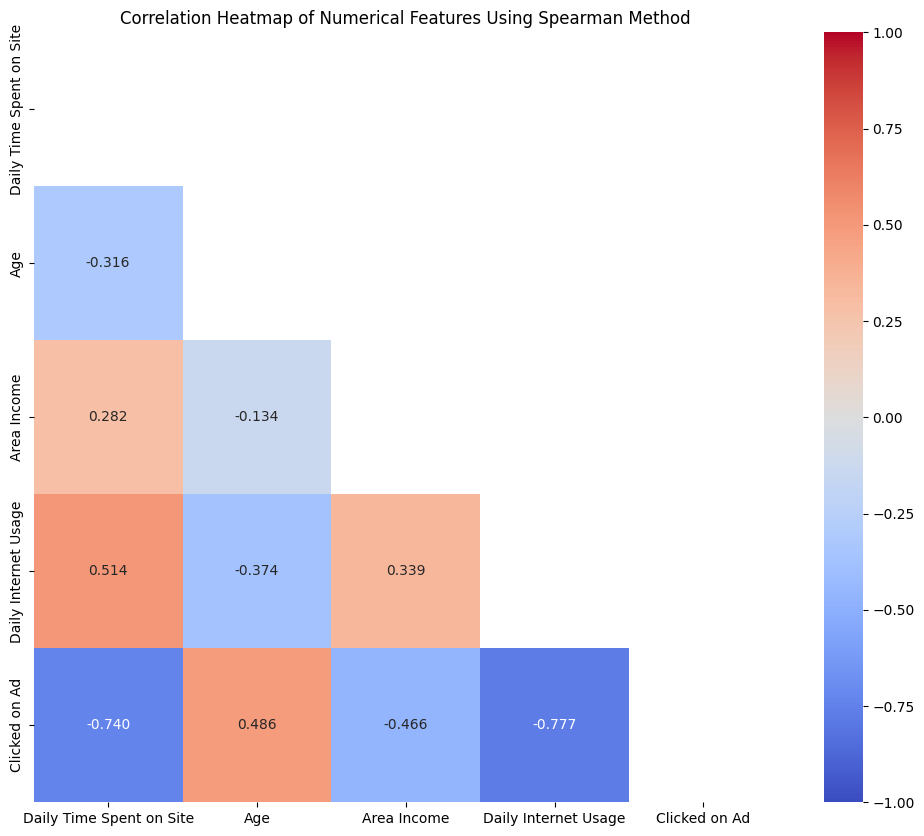

In [42]:
# Heatmap of numerical values (Spearman method)
plt.figure(figsize=(12,10))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))

# Plot correlation heatmap with Spearman method
sns.heatmap(data=df.corr(method='spearman', numeric_only=True), mask=mask, annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features Using Spearman Method')

In [43]:
# # (Additional) Manual way of calculating Spearman correlation using scipy stats library
# def calculate_spearman_correlation(df, cols):
#     corr_matrix = np.zeros((len(cols), len(cols)))
#     p_value_matrix = np.zeros((len(cols), len(cols)))
    
#     for i, col1 in enumerate(cols):
#         for j, col2 in enumerate(cols):
#             if i <= j:
#                 corr, p_value = spearmanr(df[col1], df[col2])
#                 corr_matrix[i, j] = corr
#                 p_value_matrix[i, j] = p_value
#             else:
#                 corr_matrix[i, j] = corr_matrix[j, i]
#                 p_value_matrix[i, j] = p_value_matrix[j, i]
    
#     corr_df = pd.DataFrame(corr_matrix, index=cols, columns=cols)
#     p_value_df = pd.DataFrame(p_value_matrix, index=cols, columns=cols)
    
#     return corr_df, p_value_df

In [80]:
# Correlation analysis in tabluar form
def calculate_correlation_tabular(df, target_col, method='spearman', corr_type='feature_feature'):
    """
    Calculate and display correlation analysis in tabular form for feature-to-feature,
    feature-to-target correlations, or both.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing the features and target variable
    target_col : str
        Name of the target column in the DataFrame
    method : str, optional (default='spearman')
        Correlation method to use. Options include:
        - 'pearson': standard correlation coefficient
        - 'spearman': Spearman rank correlation
        - 'kendall': Kendall Tau correlation coefficient
    corr_type : str, optional (default='feature_feature')
        Type of correlation analysis to perform:
        - 'feature_feature': correlations between all features
        - 'feature_target': correlations between features and target variable
        - 'both': display both feature-feature and feature-target correlations

    Returns:
    --------
    tuple or pandas.DataFrame
        If corr_type is 'both':
            Returns a tuple (feature_feature_df, feature_target_df)
        Otherwise:
            Returns a single DataFrame containing the correlation analysis results
            
        DataFrame columns for feature_feature:
            - 'A': First feature name
            - 'B': Second feature name
            - 'Corr Value': Absolute correlation value
            - 'Corr Type': 'Positive' or 'Negative'
        DataFrame columns for feature_target:
            - 'Feature': Feature name
            - 'Corr Value': Absolute correlation value
            - 'Corr Type': 'Positive' or 'Negative'

    Raises:
    -------
    ValueError
        If corr_type is not 'feature_feature', 'feature_target', or 'both'
    """
    
    # Input validation for correlation type
    if corr_type not in ['feature_feature', 'feature_target', 'both']:
        raise ValueError("corr_type must be either 'feature_feature', 'feature_target', or 'both'")
    
    def get_feature_feature_corr():
        """
        Helper function to calculate feature-to-feature correlations
        """
        # Calculate correlation matrix for all numeric columns
        corr_feature = df.corr(method=method, numeric_only=True)

        # Convert correlation matrix to long format for better visualization
        flat_cm = corr_feature.stack().reset_index()
        flat_cm.columns = ['A', 'B', 'Corr Value']

        # Apply filters to remove:
        # 1. Self-correlations (A to A)
        # 2. Target variable correlations
        # 3. Duplicate pairs (A-B vs B-A)
        flat_cm = flat_cm.loc[
            (flat_cm['A'] != flat_cm['B']) &  # Remove self-correlations
            (flat_cm['A'] != target_col) &     # Remove target from first column
            (flat_cm['B'] != target_col)       # Remove target from second column
        ]

        # Add correlation type (Positive/Negative) and convert to absolute values
        flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')
        flat_cm['Corr Value'] = flat_cm['Corr Value'].abs()
        
        # Sort by correlation strength and remove duplicates
        flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)
        redundan_cm = flat_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True)
        
        print("Correlation Between Features:")
        display(redundan_cm.iloc[:15].reset_index(drop=True))
        return redundan_cm
    
    def get_feature_target_corr():
        """
        Helper function to calculate feature-to-target correlations
        """
        # Calculate correlations between all features and the target variable
        corr_target = df.corrwith(df[target_col], method=method, numeric_only=True)
        
        # Convert to DataFrame for better manipulation
        corr_final = corr_target.reset_index(name='Corr Value').rename(columns={'index': 'Feature'})

        # Remove target variable self-correlation
        corr_final = corr_final.loc[corr_final['Feature'] != target_col]

        # Add correlation type and convert to absolute values
        corr_final['Corr Type'] = corr_final['Corr Value'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')
        corr_final['Corr Value'] = corr_final['Corr Value'].abs()
        
        # Sort by correlation strength
        corr_final = corr_final.sort_values('Corr Value', ascending=False, ignore_index=True)

        print("\nCorrelation of Features to Target:")
        display(corr_final.iloc[:15].reset_index(drop=True))
        return corr_final
    
    # Handle different correlation type requests
    if corr_type == 'feature_feature':
        return get_feature_feature_corr()
    elif corr_type == 'feature_target':
        return get_feature_target_corr()
    else:  # corr_type == 'both'
        # Calculate and return both types of correlations
        feature_feature_df = get_feature_feature_corr()
        feature_target_df = get_feature_target_corr()
        return feature_feature_df, feature_target_df

In [45]:
# Correlation analysis for both feature-feature and feature-target
ff_corr, ft_corr = calculate_correlation_tabular(df, target_col='Clicked on Ad', corr_type='both')

Correlation Between Features:


A                     B  Corr Value Corr Type
0  Daily Time Spent on Site  Daily Internet Usage    0.514424  Positive
1                       Age  Daily Internet Usage    0.374039  Negative
2               Area Income  Daily Internet Usage    0.339034  Positive
3  Daily Time Spent on Site                   Age    0.315546  Negative
4  Daily Time Spent on Site           Area Income    0.282280  Positive
5                       Age           Area Income    0.134418  Negative


Correlation of Features to Target:


Feature  Corr Value Corr Type
0      Daily Internet Usage    0.777141  Negative
1  Daily Time Spent on Site    0.739857  Negative
2                       Age    0.486337  Positive
3               Area Income    0.466317  Negative

In [46]:
# Categorical features correlation analysis
def analyze_categorical_relationships(df, features, target, alpha=0.05):
    """
    Analyze relationships between categorical features and target using Chi-Square test
    and calculate effect sizes using Cramér's V.

    Parameters:
    -----------
    df : pandas DataFrame
        The input dataframe containing the features and target
    features : list
        List of categorical feature names
    target : str
        Name of the target variable
    alpha : float, optional (default=0.05)
        Significance level for the chi-square test

    Returns:
    --------
    pandas DataFrame
        Summary of the analysis including chi-square statistics, p-values, and effect sizes
    """
    results = []

    for feature in features:
        # Create contingency table
        contingency = pd.crosstab(df[feature], df[target])

        # Perform chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency)

        # Calculate Cramér's V for effect size
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        cramer_v = np.sqrt(chi2 / (n * min_dim))

        # Calculate standardized residuals for post-hoc analysis
        observed = contingency.values
        standardized_residuals = (observed - expected) / np.sqrt(expected)

        # Determine significance and effect size interpretation
        is_significant = p_value < alpha

        # Interpret effect size (common thresholds for Cramér's V)
        if cramer_v < 0.1:
            effect_size = 'Negligible'
        elif cramer_v < 0.3:
            effect_size = 'Small'
        elif cramer_v < 0.5:
            effect_size = 'Medium'
        else:
            effect_size = 'Large'

        # Find categories with strongest associations
        max_residual_idx = np.unravel_index(
            np.abs(standardized_residuals).argmax(),
            standardized_residuals.shape
        )
        strongest_category = contingency.index[max_residual_idx[0]]
        strongest_association = 'Positive' if standardized_residuals[max_residual_idx] > 0 else 'Negative'

        results.append({
            'Feature': feature,
            'Chi-Square': chi2,
            'P-Value': p_value,
            "Cramér's V": cramer_v,
            'Effect Size': effect_size,
            'Is Significant': is_significant,
            'Strongest Category': strongest_category,
            'Association Direction': strongest_association
        })

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('Cramér\'s V', ascending=False)

    # Display results
    print("\nChi-Square Analysis Results:")
    print("-" * 80)
    display(results_df)

    # Visualize the results
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Feature'], results_df["Cramér's V"])
    plt.title("Effect Size (Cramér's V) by Feature")
    plt.xticks(rotation=45)
    plt.ylabel("Cramér's V")
    plt.tight_layout()
    plt.show()

    return results_df


Chi-Square Analysis Results:
--------------------------------------------------------------------------------


Feature  Chi-Square   P-Value  Cramér's V Effect Size  Is Significant  \
1      City   34.947015  0.206285    0.186941       Small           False   
2  Province   16.021392  0.380631    0.126576       Small           False   
3  Category    6.440443  0.695155    0.080252  Negligible           False   
0    Gender    1.025810  0.311145    0.032028  Negligible           False   

  Strongest Category Association Direction  
1      Jakarta Pusat              Positive  
2   Kalimantan Timur              Positive  
3            Finance              Negative  
0          Laki-Laki              Positive

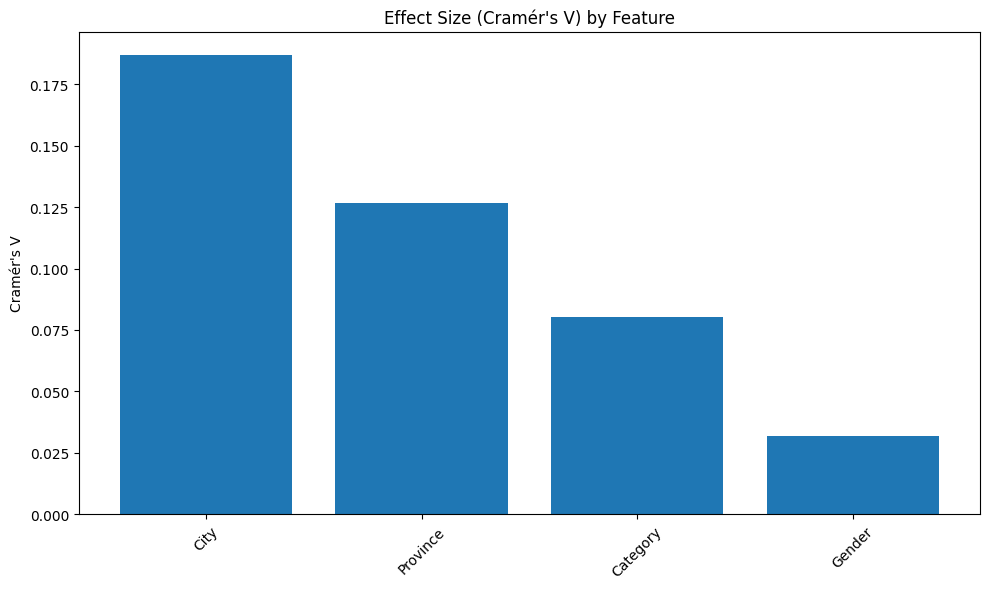

In [47]:
# Using categorical features that wanted to test
cats_check_correlation = [col for col in cats_cols if col != 'Clicked on Ad']

# Run the analysis
results = analyze_categorical_relationships(df, 
                                            cats_check_correlation, 
                                            target='Clicked on Ad',)

**Additional Information About Cramér's V**

Cramér's V is a measure of association between two categorical variables. It is an extension of the chi-square (χ²) test for independence and provides a way to quantify the strength of the association between categorical variables. Cramér's V ranges from 0 to 1, where 0 indicates no association, and 1 indicates a perfect association.

The formula for Cramér's V is:

\[ V = \sqrt{\frac{\chi^2}{n \cdot \min(k-1, r-1)}} \]

Where:
- \( \chi^2 \) is the chi-square statistic obtained from the contingency table,
- \( n \) is the total number of observations,
- \( k \) is the number of categories in one variable, and
- \( r \) is the number of categories in the other variable.

Cramér's V is commonly used for square contingency tables, but it can be applied to rectangular tables as well. It is particularly useful when dealing with nominal categorical variables and helps assess the strength of association between them. Keep in mind that Cramér's V is sensitive to table size, so its interpretation should be done with consideration of the specific context and domain knowledge.

Other references for categorical correlation : https://www.statology.org/correlation-between-categorical-variables/

In [48]:
# # (Additional) Calculating Cramer's V manual approach
# from scipy import stats

# def cramers_v(var1, var2):
#     data = pd.crosstab(var1, var2).values
#     chi_2 = stats.chi2_contingency(data)[0]
#     n = data.sum()
#     phi_2 = chi_2 / n
#     r, k = data.shape
#     return np.sqrt(phi_2 / min((k-1), (r-1)))

# crv=[]
# for i in range(len(cats_cols)):
#   row=[]
#   for j in range(len(cats_cols)):
#     val = cramers_v(df[cats_cols[i]], df[cats_cols[j]])
#     row.append(val)
#   crv.append(row)
# df_crv = pd.DataFrame(data=crv, columns=cats_cols, index=cats_cols)


# plt.figure(figsize=(12, 10))
# mask = np.triu(np.ones_like(df_crv, dtype=bool))
# sns.heatmap(df_crv, cmap='coolwarm', annot=True, mask=mask, fmt='.2f', vmin=-1, vmax=1)
# plt.title("Correlation Heatmap of Categorical Features Using Cramer's V")
# plt.show()

**Major Findings :**

- **Feature-to-feature correlation: (Highest to Lowest)**
    > **Numerical :**

    - `Daily Time Spent on Site` and `Daily Internet Usage` (0.51) have moderate positive relationship, suggesting that people who spend more time on the site tend to use the internet more, and vice versa, but the relationship might not be strictly linear.

    - `Age` and `Daily Internet Usage` (-0.37) have moderate negative relationship, meaning that the older the customer, the less their daily internet usage. This might be because younger individuals are more likely to be digitally active.

    - `Area Income` and `Daily Internet Usage` (0.34) have moderate positive relationship, indicating that people with higher area incomes tend to use the internet more on a daily basis. This could be because they have better access to technology and higher-speed internet connections.

    - `Daily Time Spent on Site` and `Age` (-0.31) have moderate negative relationship, suggesting that older users tend to spend less time on the site and that younger individuals may be more active on the site.

    - `Daily Time Spent on Site` and `Area Income` (0.28) have moderate positive relationship, whare this could mean that people with higher area income levels spend more time on the site.

    - `Age` and `Area Income` (-0.13) have low negative relationship, indication that the older the age of people the more the average income of that area, even though this is not necessarily laways the case.

    > **Categorical :**
    
    - All categorical features (non-encoded) `Gender`, `City`, `Province`, and `Category` have very weak relationship to each other


- **Feature-to-target correlation: (Highest to Lowest)**
    > **Numerical :**

    - `Daily Internet Usage` (-0.79) have strong negative relationship to `Clicked on Ad`. Suggesting that users who spend more time on the internet are less likely to click on the ad. This could imply that users who are more active internet users might be less responsive to online advertisements.  

    - `Daily Time Spent on Site` (0.74) also have strong negative relationship to `Clicked on Ad`. Meaning that users who spend more time on the site are less likely to click on the ad. This could mean that users who spend a lot of time on the site might be more engaged with the content and less likely to click on ads.

    - `Age` (0.48) have moderate positive relationship to `Clicked on Ad`. Meaning that adult/elderly users are more likely to clicked on Ad than younger users.

    - `Area Income` (0.46) have moderate negative relationship to `Clicked on Ad`. Users in areas with lower income levels are more likely to click on the ad.

    > **Categorical :**
    
    - All categorical features (non-encoded) `Gender`, `City`, `Province`, and `Category` have very weak relationship to `Clicked on Ad` target variable.

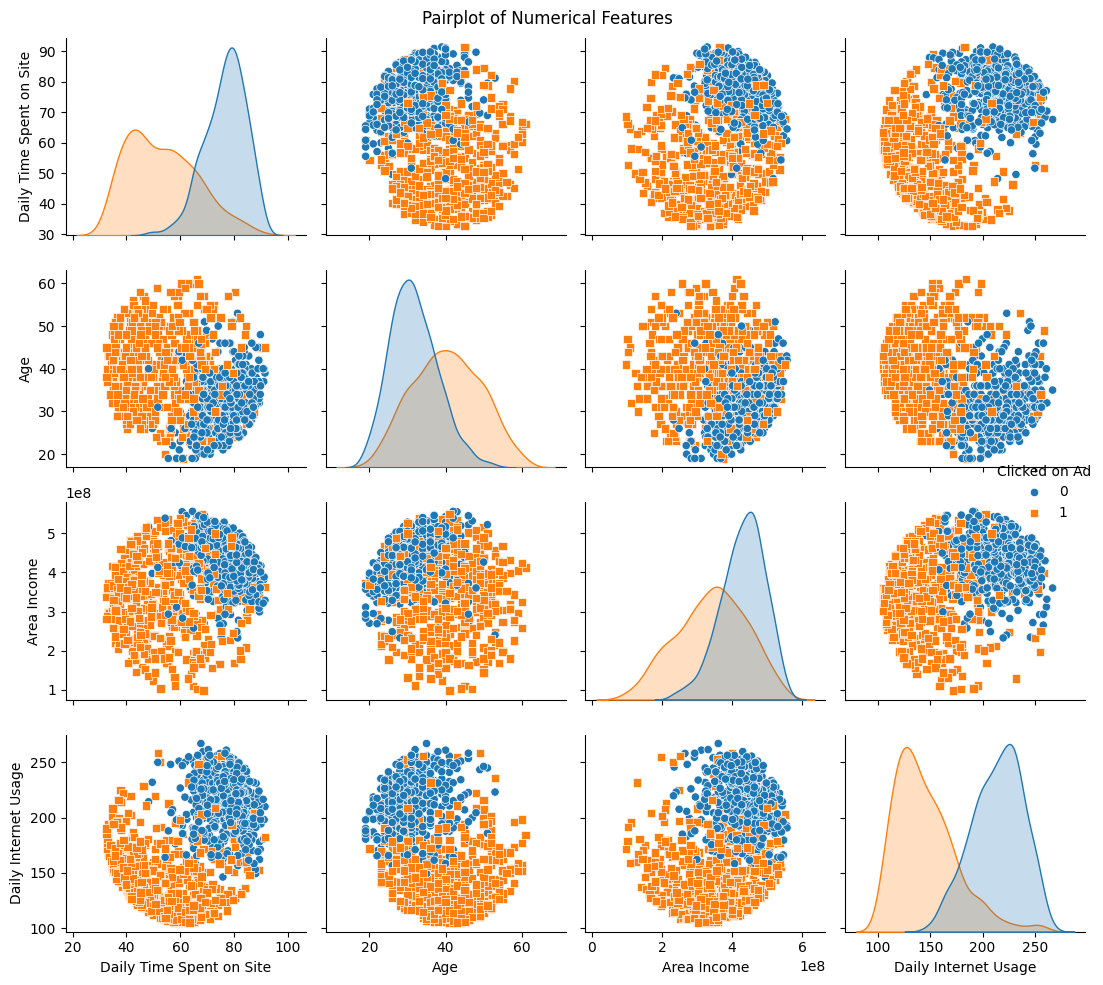

In [49]:
# Pairplot of numerical features
sns.pairplot(data=df, diag_kind='kde', hue='Clicked on Ad', markers=['o', 's'])
plt.suptitle('Pairplot of Numerical Features')
plt.tight_layout()
plt.show()

As explained before in regression plot that there are quite an interesting segmentation of target variable for each numerical features even though their correlation is not linear.

In [50]:
# Stripplot/swarmplot analysis
def plot_dynamic_stripplot_swarmplot(df, cat_col, nums_cols_series, hue_col='Clicked on Ad', 
                                   n_cols=2, figsize=(14, 10), plot_type='stripplot'):
    """
    Create multiple stripplots or swarmplots comparing a categorical column against numerical columns.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing the data
    cat_col : str
        The name of the categorical column to plot on x-axis
    nums_cols_series : list
        List of numerical column names to plot on y-axis
    hue_col : str, optional
        Column name to use for color coding (default: 'Clicked on Ad')
    n_cols : int, optional
        Number of columns in the subplot grid (default: 2)
    figsize : tuple, optional
        Figure size in inches (width, height) (default: (14, 10))
    plot_type : str, optional
        Type of plot to create: 'stripplot' or 'swarmplot' (default: 'stripplot')
    
    Returns:
    --------
    None
        Display a grid of plots
    """
    # Validate plot_type
    if plot_type not in ['stripplot', 'swarmplot']:
        raise ValueError("plot_type must be either 'stripplot' or 'swarmplot'")
    
    # Calculate number of rows needed based on number of plots and columns
    n_plots = len(nums_cols_series)
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    # Create subplots
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, 
                          figsize=figsize)
    
    # Flatten axes array for easier iteration
    ax = ax.flatten() if n_plots > 1 else [ax]
    
    # Create plots
    for i, num_col in enumerate(nums_cols_series):
        if plot_type == 'stripplot':
            sns.stripplot(data=df, ax=ax[i], 
                         x=cat_col, y=num_col, 
                         hue=hue_col)
            plot_name = 'Stripplot'
        else:  # swarmplot
            sns.swarmplot(data=df, ax=ax[i], 
                         x=cat_col, y=num_col, 
                         hue=hue_col)
            plot_name = 'Swarmplot'
            
        ax[i].set_title(f'{cat_col} {plot_name} for {num_col}')
        
        # Rotate x-axis labels if they're too long
        ax[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots if any
    for i in range(len(nums_cols_series), len(ax)):
        ax[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

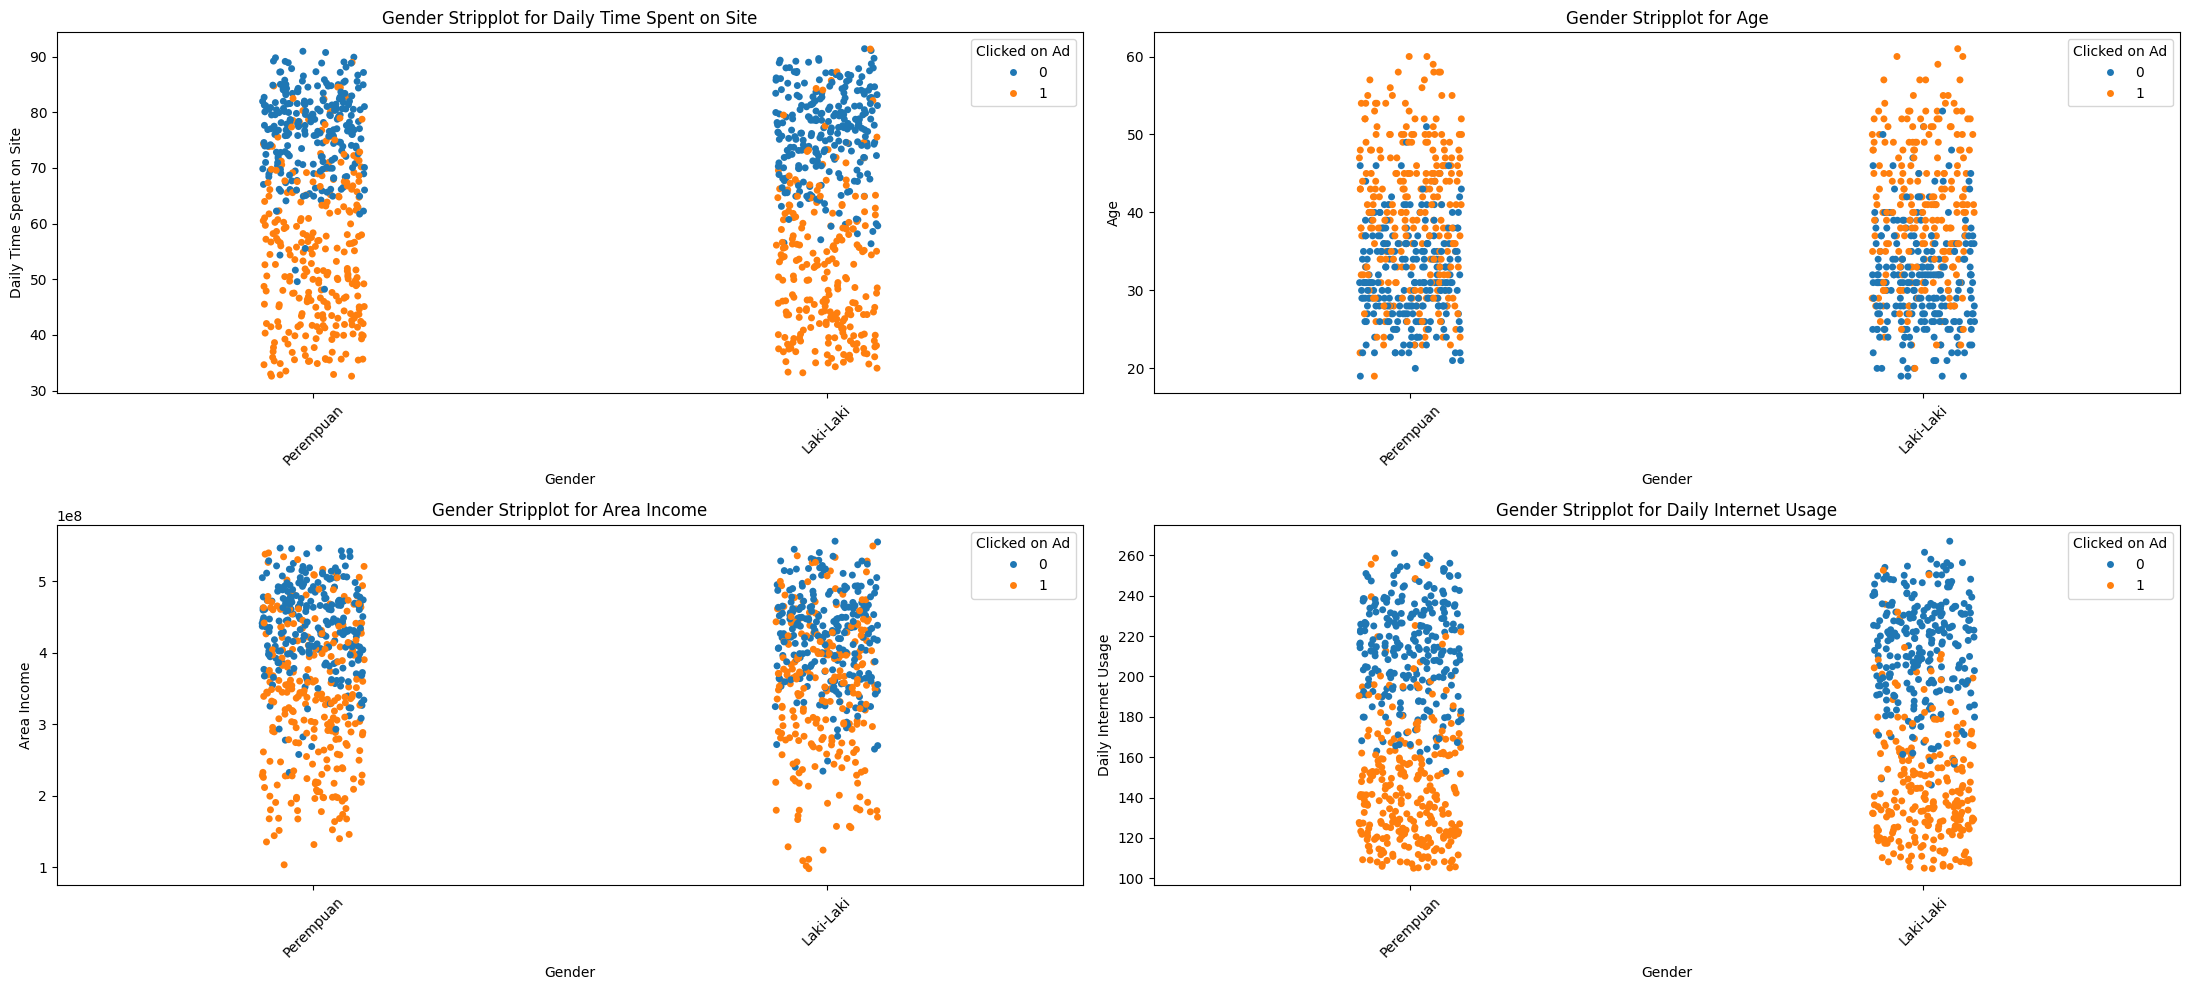

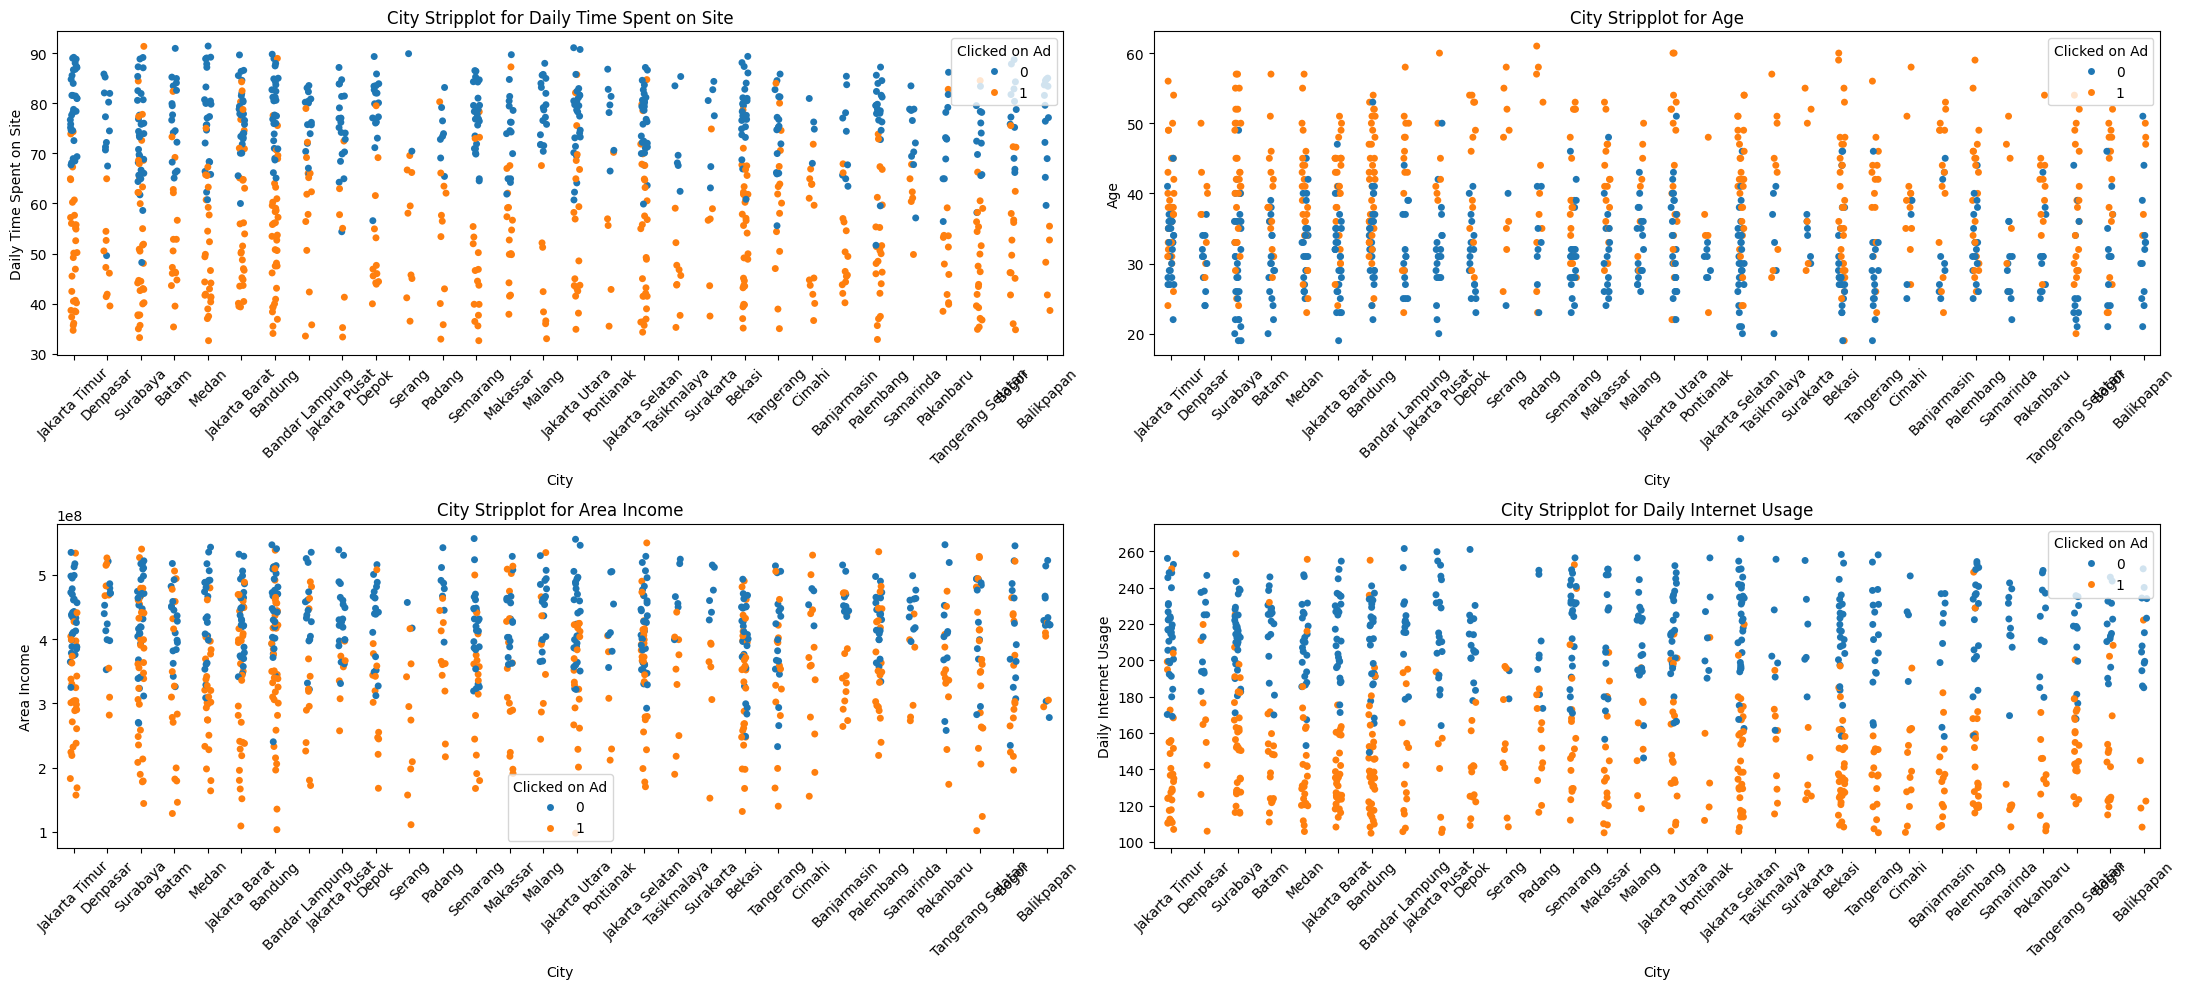

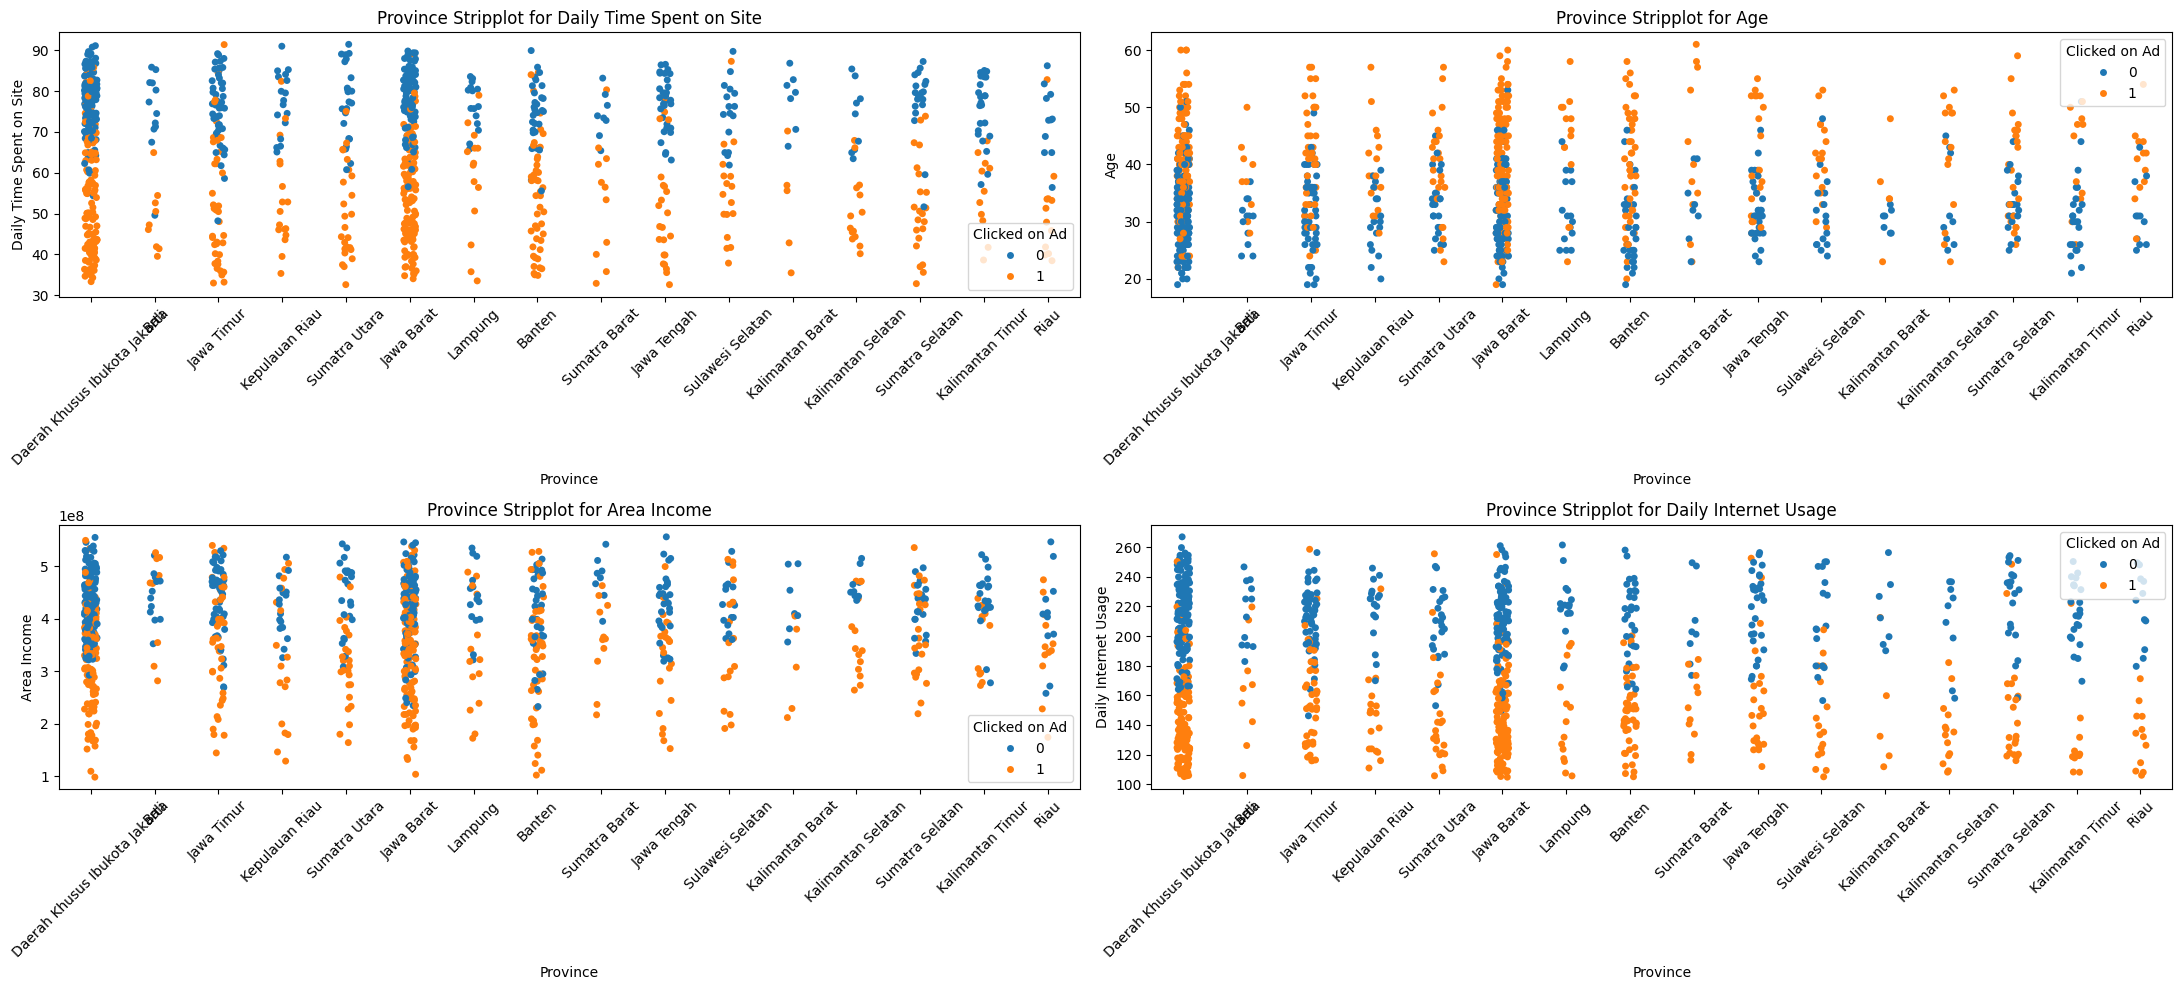

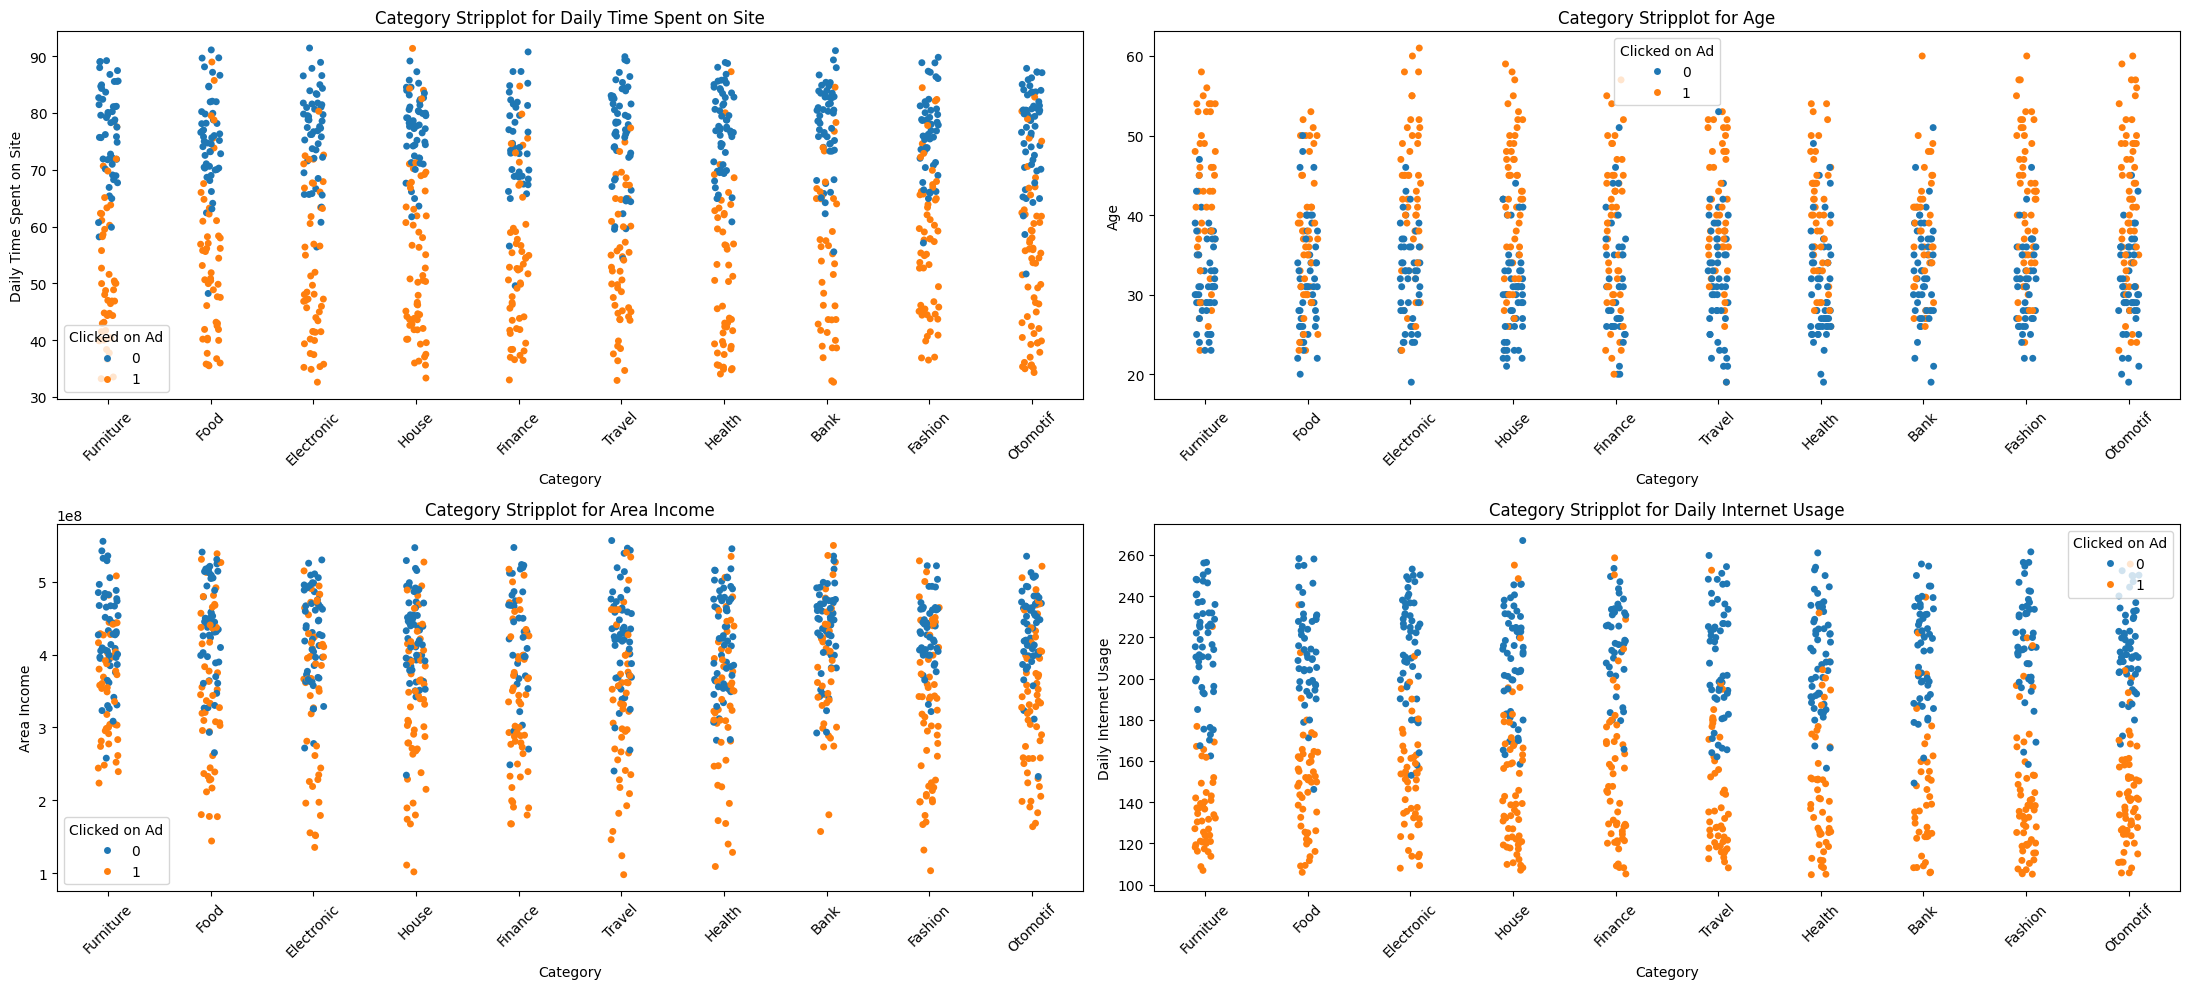

In [51]:
# Function implementation
for cat_col in [col for col in cats_cols if col != 'Clicked on Ad']:
    plot_dynamic_stripplot_swarmplot(df, cat_col, nums_cols_series=nums_cols, 
                                     hue_col='Clicked on Ad', 
                                     n_cols=2, 
                                     figsize=(22, 10))

**Major Findings :**

- Currently there are no meaningful insight that we can extract for the distribution of data points in each category, since they all have the same pattern but just different amount of data. 

# **STAGE 2 : DATA PREPROCESSING**

## Feature Engineering

In [52]:
# Make a copy of original dataframe for preprocessing and encoding process
df_preprocessed = df.copy()
df_preprocessed.sample(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
958                 79.830000   29  390351010.0             234.23000   
991                 38.960000   38  255480540.0             179.86362   
866                 86.580000   32  421062390.0             195.93000   
63                  64.929524   32  431207350.0             179.86362   
867                 90.750000   40  321621160.0             216.50000   

        Gender          Visit Time             City  \
958  Laki-Laki 2016-05-18 19:33:00  Jakarta Selatan   
991  Laki-Laki 2016-07-21 16:02:00  Jakarta Selatan   
866  Laki-Laki 2016-02-26 23:44:00    Jakarta Barat   
63   Laki-Laki 2016-03-31 20:55:00         Makassar   
867  Perempuan 2016-03-11 09:58:00    Jakarta Utara   

                          Province    Category  Clicked on Ad  
958  Daerah Khusus Ibukota Jakarta    Otomotif              0  
991  Daerah Khusus Ibukota Jakarta      Travel              1  
866  Daerah Khusus Ibukota Jakarta  Electronic              0  
63                Sulawesi Selatan     Finance              0  
867  Daerah Khusus Ibukota Jakarta     Finance              0

### Age Group

The `Age Group` column is created by grouping the `Age` column. But first we need check the distribution of age to help with the grouping range.

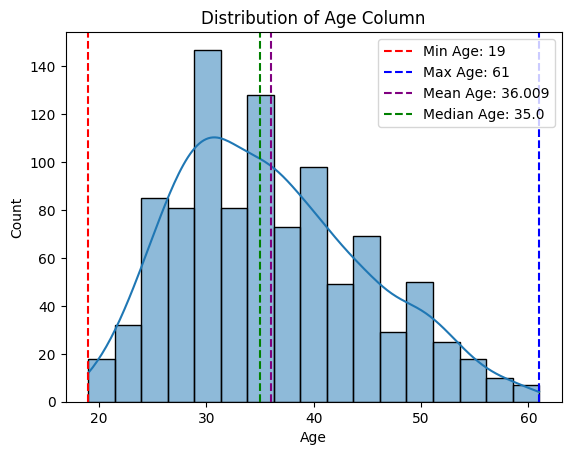

In [53]:
# Checking the distribution of Age column visually
min_age = df_preprocessed['Age'].min()
max_age = df_preprocessed['Age'].max()
mean_age = df_preprocessed['Age'].mean()
median_age = df_preprocessed['Age'].median()

sns.histplot(data=df_preprocessed, x='Age', kde=True)
plt.axvline(min_age, color='red', linestyle='--', label=f'Min Age: {min_age}')
plt.axvline(max_age, color='blue', linestyle='--', label=f'Max Age: {max_age}')
plt.axvline(mean_age, color='purple', linestyle='--', label=f'Mean Age: {mean_age}')
plt.axvline(median_age, color='green', linestyle='--', label=f'Median Age: {median_age}')
plt.title('Distribution of Age Column')
plt.legend()
plt.show()

In [54]:
# Age Group
def age_grouping(age) :
    if age >= 50 :
        group = 'Senior Adult'
    elif age >= 30 :
        group = 'Middle Adult'
    else :
        group = 'Young Adult'
    return group

df_preprocessed['Age Group'] = df_preprocessed['Age'].apply(age_grouping)

### Area Income Group

The `Area Income Group` column is created by grouping the `Area Income` column. Same as before procedure will be done for this column.

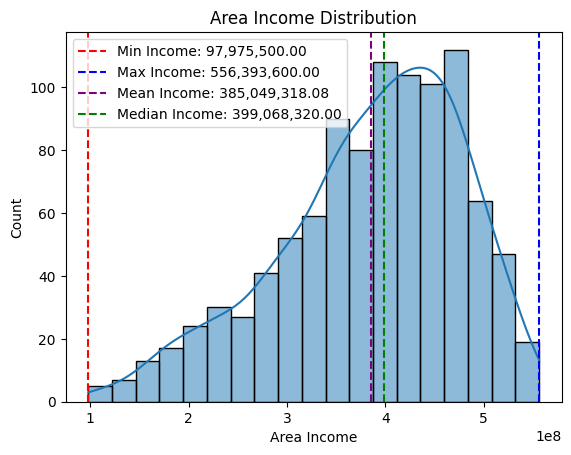

In [55]:
# Checking the distribution of Age column visually
min_income = round(df_preprocessed['Area Income'].min(), 2)
max_income = round(df_preprocessed['Area Income'].max(), 2)
mean_income = round(df_preprocessed['Area Income'].mean(), 2)
median_income = round(df_preprocessed['Area Income'].median(), 2)

sns.histplot(data=df, x='Area Income', kde=True)
plt.axvline(min_income, color='red', linestyle='--', label=f'Min Income: {min_income:,.2f}')
plt.axvline(max_income, color='blue', linestyle='--', label=f'Max Income: {max_income:,.2f}')
plt.axvline(mean_income, color='purple', linestyle='--', label=f'Mean Income: {mean_income:,.2f}')
plt.axvline(median_income, color='green', linestyle='--', label=f'Median Income: {median_income:,.2f}')
plt.title('Area Income Distribution')
plt.legend()
plt.show()

Since the distribution is quite heavily skewed, we will rely on quantiles for grouping.

In [56]:
# Income grouping
q1 = np.percentile(df_preprocessed['Area Income'], 25)
q2 = np.percentile(df_preprocessed['Area Income'], 50)
q3 = np.percentile(df_preprocessed['Area Income'], 75)

def income_grouping(income):
    if income <= q1 :
        group = 'Low Income'
    elif income <= q2 :
        group = 'Medium-Low Income'
    elif income <= q3 :
        group = 'Medium-High Income'
    else :
        group = 'High Income'
    return group

df_preprocessed['Area Income Group'] = df_preprocessed['Area Income'].apply(income_grouping)

### Datetime Components Columns (Month, Day, etc)

In [57]:
df_preprocessed['Visit Time'].describe()

count                          1000
mean     2016-04-10 10:33:36.840000
min             2016-01-01 02:52:00
25%             2016-02-18 02:55:15
50%             2016-04-07 17:27:00
75%             2016-05-31 03:18:00
max             2016-07-24 00:22:00
Name: Visit Time, dtype: object

As we have discovered before that the data only have information of 6/7 months of campaign data. So we won't need to extract the year component.

**Reminder :**

For datetime extraction methods check here : https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components

In [58]:
# Datetime component extraction
df_preprocessed['Visit Month'] = df_preprocessed['Visit Time'].dt.month
df_preprocessed['Visit Week'] = df_preprocessed['Visit Time'].dt.isocalendar().week
df_preprocessed['Visit Day'] = df_preprocessed['Visit Time'].dt.day
df_preprocessed['Visit Hour'] = df_preprocessed['Visit Time'].dt.hour
df_preprocessed['Is Visit Day Weekend'] = df_preprocessed['Visit Time'].dt.day_of_week.isin([5, 6]).astype(int)

However as for the week extraction using isocalendar() method, the numbering will assign week 0 as week 53, even though the data only has up until around week 30. This need to be handled by converting week 53 to week 0.

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
546                     78.77   28  444483340.0                211.83   
930                     80.94   36  425621000.0                239.94   

        Gender          Visit Time           City  \
546  Perempuan 2016-01-01 08:27:00       Semarang   
930  Perempuan 2016-01-01 05:31:00  Jakarta Timur   

                          Province Category  Clicked on Ad     Age Group  \
546                    Jawa Tengah     Food              0   Young Adult   
930  Daerah Khusus Ibukota Jakarta     Bank              0  Middle Adult   

      Area Income Group  Visit Month  Visit Week  Visit Day  Visit Hour  \
546  Medium-High Income            1          53          1           8   
930  Medium-High Income            1          53          1           5   

     Is Visit Day Weekend  
546                     0  
930                     0

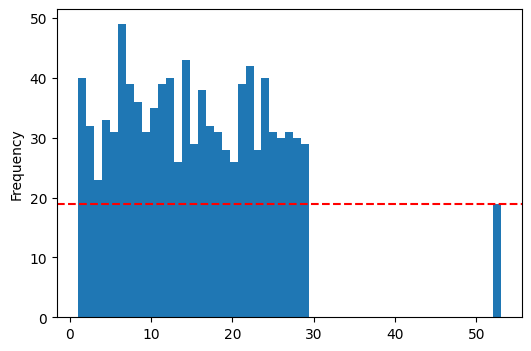

In [59]:
# Checking the distribution of Visit Week column visually
df_preprocessed['Visit Week'].plot(kind='hist', bins=53, figsize=(6, 4))
amount_of_week_53 = len(df_preprocessed[df_preprocessed['Visit Week'] == 53])
plt.axhline(amount_of_week_53, color='red', linestyle='--', label=f'Amount of Week 53: {amount_of_week_53}')

# Checking sample data of week 53
df_preprocessed[df_preprocessed['Visit Week'] == 53].sample(2)

In [60]:
# Transform the week 53 to week 0
df_preprocessed['Visit Week'] = df_preprocessed['Visit Week'].apply(lambda x: 0 if x == 53 else x)
df_preprocessed['Visit Week'] = df_preprocessed['Visit Week'].astype(int)

In [61]:
# Check distribution of weekend or not
df_preprocessed['Is Visit Day Weekend'].value_counts()

Is Visit Day Weekend
0    715
1    285
Name: count, dtype: int64

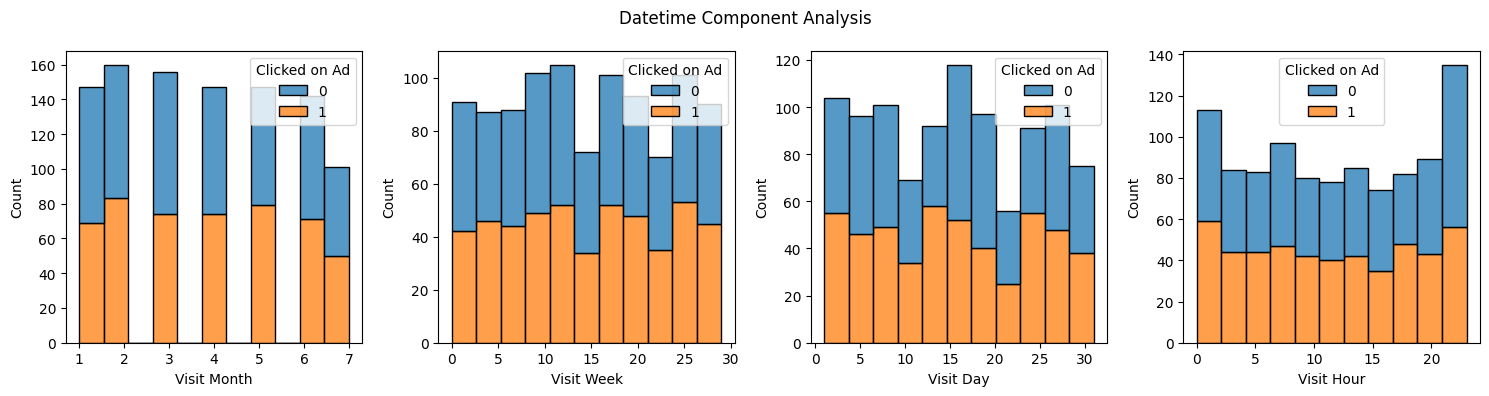

In [62]:
# Datetime component analysis
datetime_cols_analysis = ['Visit Month', 'Visit Week', 'Visit Day', 'Visit Hour']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
ax = ax.flatten()

for i, col in enumerate(datetime_cols_analysis) :
    sns.histplot(data=df_preprocessed, ax=ax[i], x=col, hue='Clicked on Ad', multiple='stack')

plt.suptitle('Datetime Component Analysis')
plt.tight_layout()
plt.show()

There are not much of a difference between the visit time component of our site. The distributions are quite uniform between the customer who clicked on the ad or not.

In [63]:
# Re-check dataframe after feature engineering process
df_preprocessed.sample(3)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
58                      77.63   29  392793590.0                239.22   
298                     80.39   31  463886430.0                214.74   
832                     41.46   42  365241800.0                128.98   

        Gender          Visit Time             City  \
58   Perempuan 2016-02-14 17:05:00         Surabaya   
298  Perempuan 2016-05-03 08:21:00            Bogor   
832  Laki-Laki 2016-05-23 08:06:00  Jakarta Selatan   

                          Province    Category  Clicked on Ad     Age Group  \
58                      Jawa Timur       House              0   Young Adult   
298                     Jawa Barat      Health              0  Middle Adult   
832  Daerah Khusus Ibukota Jakarta  Electronic              1  Middle Adult   

     Area Income Group  Visit Month  Visit Week  Visit Day  Visit Hour  \
58   Medium-Low Income            2           6         14          17   
298        High Income            5          18          3           8   
832  Medium-Low Income            5          21         23           8   

     Is Visit Day Weekend  
58                      1  
298                     0  
832                     0

## Handling Outliers

In [64]:
# Handling the outliers in dataframe based on chosen method using (IQR or Z-Score)
def outlier_handling(df, col_series, method='iqr', threshold=3):
    """
    Function to remove outliers from specific columns of a dataframe using either IQR or Z-Score method.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data
    col_series (list): List of column names to remove outliers from
    method (str): Method to use for outlier detection - either 'iqr' or 'zscore'
    threshold (float): Threshold for z-score method (default=3). Only used if method='zscore'
    
    Returns:
    pd.DataFrame: A new dataframe with outliers removed for the specified columns
    
    Raises:
    ValueError: If an invalid method is specified
    """
    print(f'Rows before removing outliers: {len(df)}')
    
    # Validate the method parameter
    if method.lower() not in ['iqr', 'zscore']:
        raise ValueError("Method must be either 'iqr' or 'zscore'")
    
    # Start with all rows marked as True (non-outliers)
    filtered_entries = np.array([True] * len(df))
    
    # Loop through each column
    for col in col_series:
        if method.lower() == 'iqr':
            # IQR method
            Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
            Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
            IQR = Q3 - Q1  # Interquartile range
            lower_bound = Q1 - (IQR * 1.5)  # Lower bound for outliers
            upper_bound = Q3 + (IQR * 1.5)  # Upper bound for outliers

            # Create a filter that identifies non-outliers for the current column
            filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))
            
        elif method.lower() == 'zscore':  # zscore method
            # Calculate Z-Scores
            z_scores = np.abs(stats.zscore(df[col]))

            # Create a filter that identifies non-outliers
            filter_outlier = (z_scores < threshold)
        
        # Update the filter to exclude rows that have outliers in the current column
        filtered_entries = filtered_entries & filter_outlier
    
    # Create a new dataframe by applying the cumulative filter
    df_filtered_outliers = df[filtered_entries]
    
    print(f'Rows after removing outliers: {len(df_filtered_outliers)}')
    
    return df_filtered_outliers

In [65]:
# Outliers handling with IQR method function implementation
columns_to_filter = ['Area Income']
df_preprocessed = outlier_handling(df_preprocessed, col_series=columns_to_filter, method='iqr')

Rows before removing outliers: 1000
Rows after removing outliers: 991


Data before filtering outliers


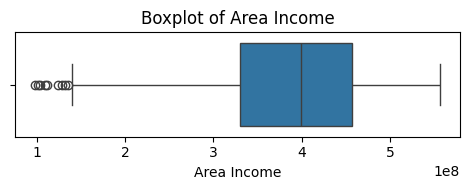

Data after filtering outliers


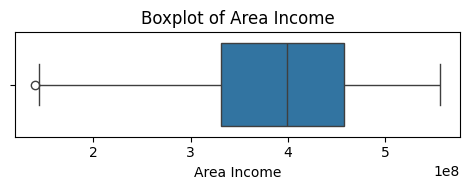

In [66]:
# Check data after filtered
print('Data before filtering outliers')
plot_dynamic_boxplots_violinplots(df=df, col_series=columns_to_filter, ncols=3, figsize=(2, 14), orientation='h')

print('Data after filtering outliers')
plot_dynamic_boxplots_violinplots(df=df_preprocessed, col_series=columns_to_filter, ncols=3, figsize=(2, 14), orientation='h')

## Feature Encoding

In [67]:
# Re-check the unique values of categorical features to determine encoding technique
encoded_features = ['Gender', 'City', 'Province', 'Category', 'Age Group', 'Area Income Group']

for col in encoded_features :
    print(f'======={col}=======')
    print(df_preprocessed[col].unique())
    print()

=======Gender=======
['Perempuan' 'Laki-Laki']

=======City=======
['Jakarta Timur' 'Denpasar' 'Surabaya' 'Batam' 'Medan' 'Jakarta Barat'
 'Bandung' 'Bandar Lampung' 'Jakarta Pusat' 'Depok' 'Serang' 'Padang'
 'Semarang' 'Makassar' 'Malang' 'Jakarta Utara' 'Pontianak'
 'Jakarta Selatan' 'Tasikmalaya' 'Surakarta' 'Bekasi' 'Tangerang' 'Cimahi'
 'Banjarmasin' 'Palembang' 'Samarinda' 'Pakanbaru' 'Tangerang Selatan'
 'Bogor' 'Balikpapan']

=======Province=======
['Daerah Khusus Ibukota Jakarta' 'Bali' 'Jawa Timur' 'Kepulauan Riau'
 'Sumatra Utara' 'Jawa Barat' 'Lampung' 'Banten' 'Sumatra Barat'
 'Jawa Tengah' 'Sulawesi Selatan' 'Kalimantan Barat' 'Kalimantan Selatan'
 'Sumatra Selatan' 'Kalimantan Timur' 'Riau']

=======Category=======
['Furniture' 'Food' 'Electronic' 'House' 'Finance' 'Travel' 'Health'
 'Bank' 'Fashion' 'Otomotif']

=======Age Group=======
['Middle Adult' 'Young Adult' 'Senior Adult']

=======Area Income Group=======
['Medium-High Income' 'High Income' 'Medium-Low Income' '

In [68]:
# Ordinal encoding for Gender, Age Group, and Area Income Group
df_preprocessed['Gender'] = df_preprocessed['Gender'].replace({'Perempuan' : 0,
                                                               'Laki-Laki' : 1})


df_preprocessed['Age Group'] = df_preprocessed['Age Group'].replace({'Young Adult' : 0,
                                                                     'Middle Adult' : 1,
                                                                     'Senior Adult' : 2})

df_preprocessed['Area Income Group'] = df_preprocessed['Area Income Group'].replace({'Low Income' : 0,
                                                                                     'Medium-Low Income' : 1,
                                                                                     'Medium-High Income' : 2,
                                                                                     'High Income' : 3})

In [69]:
# One-hot encoding for City, Province, and Category
one_hot_columns = ['City', 'Province', 'Category']

for col in one_hot_columns :
    onehots = pd.get_dummies(df_preprocessed[col], prefix=col, drop_first=True, sparse=False) * 1
    df_preprocessed = pd.concat([df_preprocessed, onehots], axis=1)

# Drop the original columns after one-hot encoding
df_preprocessed.drop(columns=one_hot_columns, axis=1, inplace=True)

In [70]:
# Re-check final dataframe after encoding process
df_preprocessed.sample(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Gender  \
121                     49.58   26  397542250.0                231.94       0   
818                     81.98   34  472027430.0                212.88       0   
352                     78.19   30  437331930.0                228.81       0   
519                     35.00   40  322236110.0                151.25       1   
333                     79.36   34  400822870.0                245.78       1   

             Visit Time  Clicked on Ad  Age Group  Area Income Group  \
121 2016-04-07 16:02:00              0          0                  1   
818 2016-06-04 09:25:00              0          1                  3   
352 2016-01-31 06:14:00              0          1                  2   
519 2016-06-18 16:02:00              1          1                  0   
333 2016-04-28 22:54:00              0          1                  2   

     Visit Month  Visit Week  Visit Day  Visit Hour  Is Visit Day Weekend  \
121            4          14          7          16                     0   
818            6          22          4           9                     1   
352            1           4         31           6                     1   
519            6          24         18          16                     1   
333            4          17         28          22                     0   

     City_Bandar Lampung  City_Bandung  City_Banjarmasin  City_Batam  \
121                    0             0                 0           0   
818                    0             0                 0           0   
352                    0             0                 0           0   
519                    0             0                 0           0   
333                    0             0                 0           0   

     City_Bekasi  City_Bogor  City_Cimahi  City_Denpasar  City_Depok  \
121            0           0            0              1           0   
818            0           0            0              1           0   
352            0           0            0              0           0   
519            0           0            0              0           0   
333            0           0            0              0           0   

     City_Jakarta Barat  City_Jakarta Pusat  City_Jakarta Selatan  \
121                   0                   0                     0   
818                   0                   0                     0   
352                   0                   0                     0   
519                   0                   0                     0   
333                   0                   0                     1   

     City_Jakarta Timur  City_Jakarta Utara  City_Makassar  City_Malang  \
121                   0                   0              0            0   
818                   0                   0              0            0   
352                   0                   0              0            0   
519                   0                   0              0            0   
333                   0                   0              0            0   

     City_Medan  City_Padang  City_Pakanbaru  City_Palembang  City_Pontianak  \
121           0            0               0               0               0   
818           0            0               0               0               0   
352           0            0               1               0               0   
519           0            0               0               0               0   
333           0            0               0               0               0   

     City_Samarinda  City_Semarang  City_Serang  City_Surabaya  \
121               0              0            0              0   
818               0              0            0              0   
352               0              0            0              0   
519               0              0            0              0   
333               0              0            0              0   

     City_Su

## Feature Selection

In [71]:
# Drop Visit DateTime column (unnecessary for further processes)
df_preprocessed.drop(columns='Visit Time', inplace=True)

In [72]:
# Re-arrange the columns (Clicked on Ad in last)
df_preprocessed = df_preprocessed[[col for col in df_preprocessed.columns if col != 'Clicked on Ad'] + ['Clicked on Ad']]

### Checking correlation heatmap (spearman method)

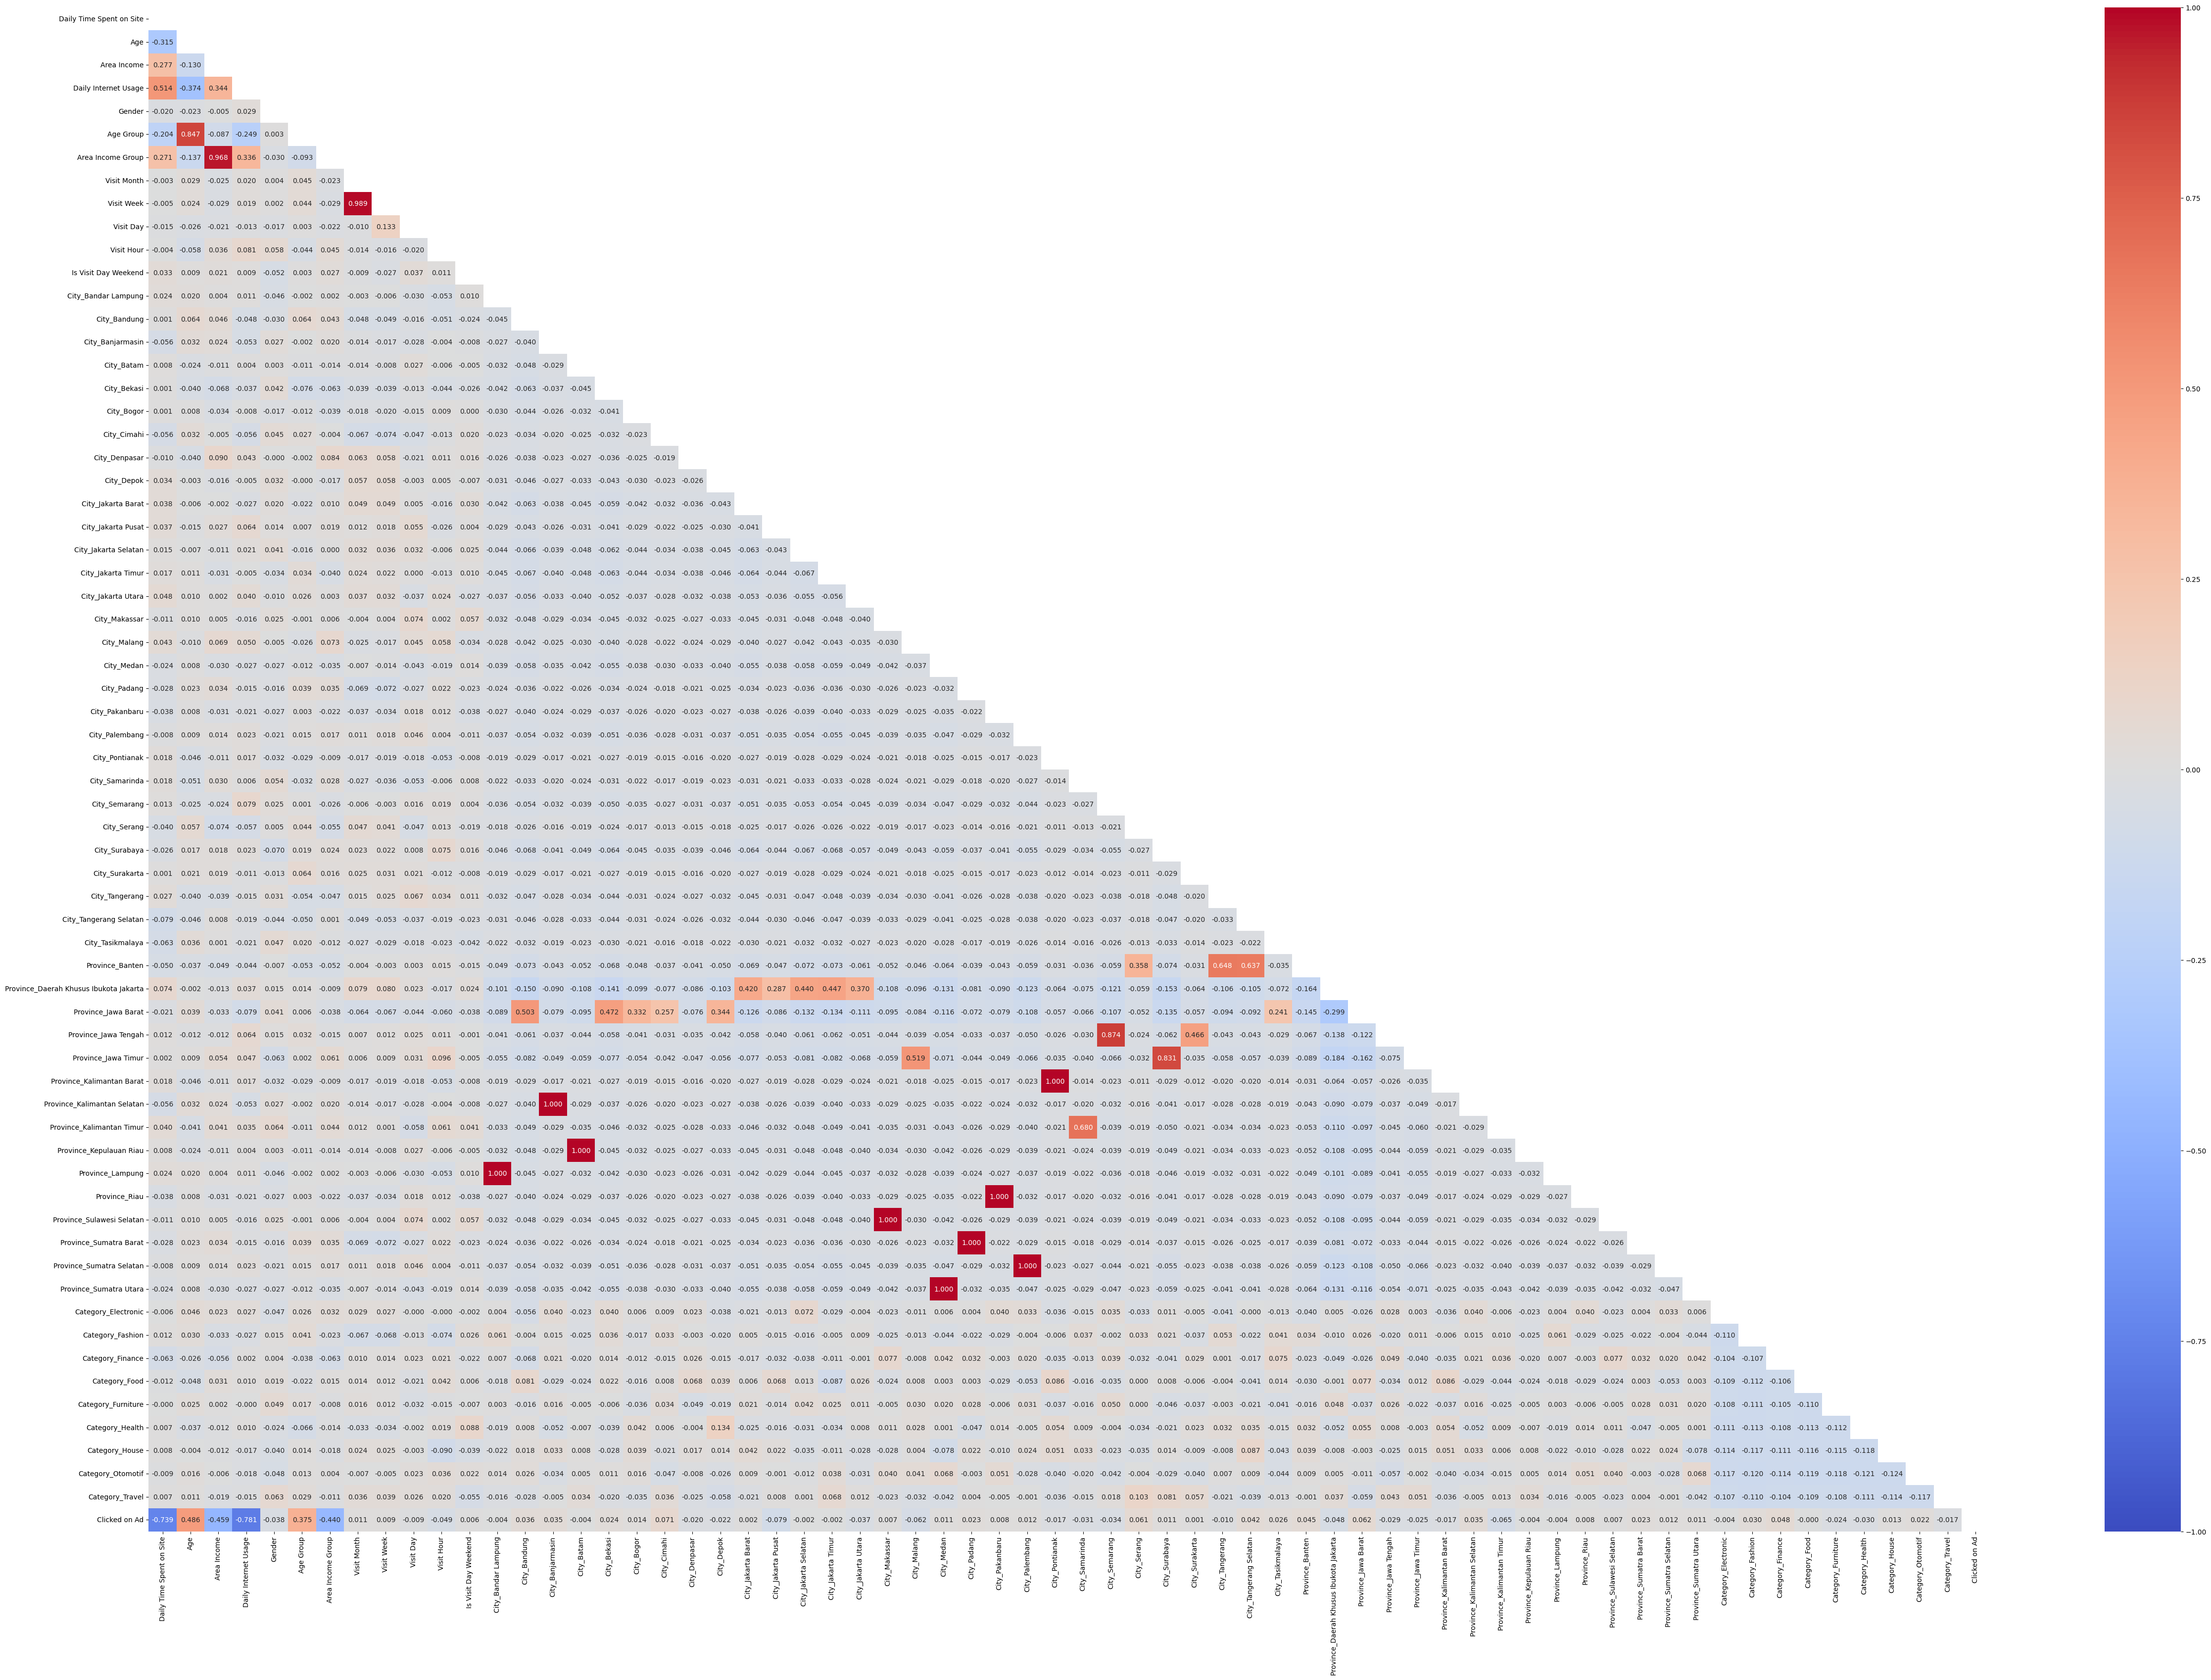

In [73]:
# Heatmap (Spearman corr)
plt.figure(figsize=(60, 40))
mask = np.triu(np.ones_like(df_preprocessed.corr(method='spearman', numeric_only=True), dtype=bool))
sns.heatmap(data = df_preprocessed.corr(method='spearman', numeric_only=True), mask=mask, cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In [74]:
# Correlation analysis for both feature-feature and feature-target
ff_corr, ft_corr = calculate_correlation_tabular(df_preprocessed, target_col='Clicked on Ad', corr_type='both')

Correlation Between Features:


A                     B  Corr Value Corr Type
0     Province_Sulawesi Selatan         City_Makassar    1.000000  Positive
1                   Visit Month            Visit Week    0.988955  Positive
2                   Area Income     Area Income Group    0.968185  Positive
3          Province_Jawa Tengah         City_Semarang    0.873964  Positive
4                           Age             Age Group    0.847434  Positive
...                         ...                   ...         ...       ...
1417                 City_Depok             Age Group    0.000280  Negative
1418         Category_Furniture  Daily Internet Usage    0.000242  Negative
1419                  Visit Day    City_Jakarta Timur    0.000152  Positive
1420     City_Tangerang Selatan   Category_Electronic    0.000059  Negative
1421                City_Serang         Category_Food    0.000034  Positive

[1422 rows x 4 columns]


Correlation of Features to Target:


Feature  Corr Value Corr Type
0       Daily Internet Usage    0.780693  Negative
1   Daily Time Spent on Site    0.738982  Negative
2                        Age    0.486129  Positive
3                Area Income    0.458972  Negative
4          Area Income Group    0.440087  Negative
..                       ...         ...       ...
60        City_Jakarta Barat    0.002223  Positive
61      City_Jakarta Selatan    0.001873  Negative
62        City_Jakarta Timur    0.001770  Negative
63            City_Surakarta    0.001006  Positive
64             Category_Food    0.000340  Negative

[65 rows x 3 columns]

### Checking multicolinearity using Variance Inflation Factor (VIF)

#### Reminder Regarding Variance Inflation Factor (VIF)

#### Variance Inflation Factor (VIF)

Variance Inflation Factor (VIF) is a statistical metric used to detect multicollinearity among independent variables in regression models. Multicollinearity occurs when independent variables are highly correlated with each other, which can lead to:
- Unstable coefficient estimates
- Inflated standard errors
- Difficulties in model interpretation

##### Mathematical Formulation
The VIF for the \(i\)-th independent variable is calculated as:

\[
\text{VIF}_i = \frac{1}{1 - R_i^2}
\]

Where \(R_i^2\) is the \(R^2\) value obtained from regressing the \(i\)-th independent variable against all other independent variables.

##### Interpretation Guidelines
- **VIF = 1**: No multicollinearity
- **VIF > 1**: Increasing levels of multicollinearity
- **VIF > 5 or 10**: Significant multicollinearity (potentially problematic)

##### Practical Implications
1. **Regression Tasks (commonly used)**:
   - Helps identify which variables contribute to multicollinearity
   - Assists in deciding whether to:
     * Remove certain variables
     * Re-specify the model
     * Apply techniques to mitigate multicollinearity

2. **Classification Tasks**:
   - Applicable in coefficient-based models like logistic regression
   - Less critical in tree-based models (Random Forest, Gradient Boosting), these models can handle correlated predictors to some extent
   - Interpretation may vary based on the specific algorithm

##### Recommendations
- Always assess multicollinearity, regardless of the task (regression or classification)
- Consider the context and characteristics of your data
- Use VIF as one of multiple tools for model diagnostics

##### Reference
Detailed documentation: [Statsmodels VIF Function](https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html#statsmodels.stats.outliers_influence.variance_inflation_factor)

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, target_col, high_threshold=10, moderate_threshold=5):
    """
    Calculate VIF for each feature in the dataset.

    Parameters:
    df (pd.DataFrame): Input DataFrame
    target_col (str): Name of target column to exclude

    Returns:
    pd.DataFrame: DataFrame with VIF scores
    """
    # Create DataFrame of features only
    features_df = df.drop(columns=[target_col])

    # Initialize VIF DataFrame
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features_df.columns

    # Calculate VIF for each feature
    try:
        vif_data['VIF'] = [variance_inflation_factor(features_df.values, i)
                          for i in range(features_df.shape[1])]
    except Exception as e:
        print(f"Error calculating VIF: {e}")
        return None

    # Sort by VIF score
    vif_data = vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)

    # Add interpretation column
    vif_data['Interpretation'] = vif_data['VIF'].apply(lambda x:
        'High multicollinearity' if x > high_threshold
        else ('Moderate multicollinearity' if x > moderate_threshold
        else 'Low multicollinearity'))

    return vif_data

In [93]:
# VIF calculation function usage
vif_results = calculate_vif(df_preprocessed, 'Clicked on Ad')

print("Displat top 10 VIF results:")
display(vif_results.head(10))

print("Displat bottom 10 VIF results:")
display(vif_results.tail(10))

Displat top 10 VIF results:


Feature           VIF  \
0                Province_Sumatra Selatan           inf   
1               Province_Kalimantan Barat           inf   
2                          City_Palembang           inf   
3                          City_Pontianak  9.007199e+15   
4                     City_Bandar Lampung  9.007199e+15   
5                        Province_Lampung  9.007199e+15   
6                     Province_Jawa Timur  9.007199e+15   
7  Province_Daerah Khusus Ibukota Jakarta  9.007199e+15   
8                              City_Batam  9.007199e+15   
9                             City_Padang  9.007199e+15   

           Interpretation  
0  High multicollinearity  
1  High multicollinearity  
2  High multicollinearity  
3  High multicollinearity  
4  High multicollinearity  
5  High multicollinearity  
6  High multicollinearity  
7  High multicollinearity  
8  High multicollinearity  
9  High multicollinearity

Displat bottom 10 VIF results:


Feature       VIF         Interpretation
55             Category_Food  1.977895  Low multicollinearity
56        Category_Furniture  1.952074  Low multicollinearity
57       Category_Electronic  1.946359  Low multicollinearity
58           Category_Travel  1.933546  Low multicollinearity
59          Category_Finance  1.908499  Low multicollinearity
60            City_Samarinda  1.890438  Low multicollinearity
61      Daily Internet Usage  1.599707  Low multicollinearity
62  Daily Time Spent on Site  1.515788  Low multicollinearity
63                    Gender  1.073270  Low multicollinearity
64                Visit Hour  1.065947  Low multicollinearity

As we can see here that, mostly the one-hot encoded features have high multicollinearity here, meaning that we probably wont be using them, but we need to make sure by doing another statsitical analysis.

### Checking feature importance using SelectKBest (Mutual information, Chi2, and ANOVA F-test)

#### Reminder Regarding Feature Relevance Calculation Method using SelectKBest

`sklearn.feature_selection.f_classif`, `sklearn.feature_selection.mutual_info_classif`, and `sklearn.feature_selection.chi2` are three different feature selection methods in scikit-learn, and each of them uses a different statistical test or measure to evaluate the importance of features in a classification task.

1. **`sklearn.feature_selection.f_classif`:**

   - **Type of Test:** Analysis of variance (ANOVA) F-statistic.
   - **Nature:** Assesses the linear dependency between each feature and the target variable.
   - **Assumption:** Assumes that the features are normally distributed and that the variance of the feature values is roughly equal across different classes.
   - **Usage:** Suitable for identifying features with significant differences in means among different classes.

   ```python
   from sklearn.feature_selection import f_classif
   ```

2. **`sklearn.feature_selection.mutual_info_classif`:**

   - **Type of Measure:** Mutual information, a non-parametric measure of the dependency between variables.
   - **Nature:** Captures any kind of statistical dependency, whether it is linear or non-linear.
   - **Assumption:** Has fewer assumptions compared to `f_classif` and is more robust when the relationship between features and the target variable is not strictly linear.
   - **Usage:** Suitable for identifying features with any type of relationship with the target variable.

   ```python
   from sklearn.feature_selection import mutual_info_classif
   ```

3. **`sklearn.feature_selection.chi2`:**

   - **Type of Test:** Chi-squared (χ²) statistical test.
   - **Nature:** Assesses the independence between each feature and the target variable.
   - **Assumption:** Assumes that the features and target variable are categorical.
   - **Usage:** Suitable for identifying features that are independent of the target variable in a categorical setting.

   ```python
   from sklearn.feature_selection import chi2
   ```

**Summary:**
- `f_classif` is based on the F-statistic and assumes a linear relationship between features and the target variable.
- `mutual_info_classif` is based on mutual information and is non-parametric, capturing any kind of statistical dependency.
- `chi2` uses the chi-squared test and is suitable for categorical data, assessing the independence between features and the target variable.

The choice between these methods depends on the nature of your data, the type of variables you have, and the assumptions you are willing to make about the relationships between features and the target variable. If your data is categorical, `chi2` might be more appropriate, while `f_classif` and `mutual_info_classif` are suitable for continuous or ordinal data.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Additional Information Regarding Scipy Statistical Tests

In `scipy`, you can determine feature importance using statistical tests that compute p-values. Here are some commonly used methods along with the corresponding functions in `scipy.stats`:

1. **T-test**: Determines if there is a significant difference between the means of two groups.
   - Function: `scipy.stats.ttest_ind()`

2. **ANOVA (Analysis of Variance)**: Determines if there are statistically significant differences between the means of three or more independent groups.
   - Function: `scipy.stats.f_oneway()`

3. **Chi-square test**: Tests the independence between two categorical variables.
   - Function: `scipy.stats.chi2_contingency()`

4. **Correlation test (Pearson, Spearman, etc.)**: Measures the strength and direction of association between two continuous variables.
   - Functions:
     - Pearson correlation: `scipy.stats.pearsonr()`
     - Spearman correlation: `scipy.stats.spearmanr()`
     - Kendall correlation: `scipy.stats.kendalltau()`

5. **Mutual information**: Measures the dependency between two variables by computing the reduction in uncertainty of one variable given the other.
   - Function: `sklearn.feature_selection.mutual_info_regression()` for regression problems and `sklearn.feature_selection.mutual_info_classif()` for classification problems.

6. **ANOVA F-value for feature selection**: Computes the ANOVA F-value for the provided sample and target variable.
   - Function: `sklearn.feature_selection.f_classif()` for classification problems and `sklearn.feature_selection.f_regression()` for regression problems.

Each of these methods provides a p-value, which indicates the significance of the relationship between the feature and the target variable. Lower p-values typically suggest stronger evidence against the null hypothesis, indicating a more significant feature.

Choose the appropriate method based on the nature of your data and the assumptions of the statistical test.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [75]:
# Create temporary dataframe for testing SelectKBest
df_feature_target_relation = df_preprocessed.copy()
df_feature_target_relation.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Gender  \
0                     68.95   35  432837300.0                256.09       0   
1                     80.23   31  479092950.0                193.77       1   
2                     69.47   26  418501580.0                236.50       0   
3                     74.15   29  383643260.0                245.89       1   
4                     68.37   35  517229930.0                225.58       0   

   Age Group  Area Income Group  Visit Month  Visit Week  Visit Day  \
0          1                  2            3          12         27   
1          1                  3            4          14          4   
2          0                  2            3          10         13   
3          0                  1            1           1         10   
4          1                  3            6          22          3   

   Visit Hour  Is Visit Day Weekend  City_Bandar Lampung  City_Bandung  \
0           0                     1                    0             0   
1           1                     0                    0             0   
2          20                     1                    0             0   
3           2                     1                    0             0   
4           3                     0                    0             0   

   City_Banjarmasin  City_Batam  City_Bekasi  City_Bogor  City_Cimahi  \
0                 0           0            0           0            0   
1                 0           0            0           0            0   
2                 0           0            0           0            0   
3                 0           1            0           0            0   
4                 0           0            0           0            0   

   City_Denpasar  City_Depok  City_Jakarta Barat  City_Jakarta Pusat  \
0              0           0                   0                   0   
1              1           0                   0                   0   
2              0           0                   0                   0   
3              0           0                   0                   0   
4              0           0                   0                   0   

   City_Jakarta Selatan  City_Jakarta Timur  City_Jakarta Utara  \
0                     0                   1                   0   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                   0                   0   
4                     0                   0                   0   

   City_Makassar  City_Malang  City_Medan  City_Padang  City_Pakanbaru  \
0              0            0           0            0               0   
1              0            0           0            0               0   
2              0            0           0            0               0   
3              0            0           0            0               0   
4              0            0           1            0               0   

   City_Palembang  City_Pontianak  City_Samarinda  City_Semarang  City_Serang  \
0               0               0               0              0            0   
1               0               0               0              0            0   
2               0               0               0              0            0   
3               0               0               0              0            0   
4               0               0               0              0            0   

   City_Surabaya  City_Surakarta  City_Tangerang  City_Tangerang Selatan  \
0              0               0               0                       0   
1              0               0               0                       0   
2              1               0               0                       0   
3              0               0               0                       0   
4              0               0               0                     

In [76]:
# Change the target column to categorical
change_target_dtype(df_feature_target_relation, target_type='categorical')

In [77]:
from sklearn.feature_selection import (
    SelectKBest,
    mutual_info_classif,
    f_classif,
    chi2,
    f_regression,
    mutual_info_regression
)

# Calculate feature importance scores using different statistical methods for classification or regression
def calculate_feature_importance(X, y, task='classification', method='mutual_info', k='all'):
    """
    Calculate feature importance scores using different statistical methods for classification or regression.

    Parameters:
    X (DataFrame): Feature matrix
    y (Series): Target variable
    task (str): Task type ('classification' or 'regression')
    method (str): Method for feature selection ('mutual_info', 'anova', 'chi2' for classification; 'f_regression', 'mutual_info' for regression)
    k (int or 'all'): Number of top features to select. Use 'all' to see scores for all features.

    Returns:
    DataFrame: Sorted DataFrame with feature names, scores, and p-values (if applicable)
    """
    # Select the appropriate scoring function based on task and method
    if task == 'classification':
        if method == 'mutual_info':
            score_func = mutual_info_classif
        elif method == 'anova':
            score_func = f_classif
        elif method == 'chi2':
            score_func = chi2
        else:
            raise ValueError("For classification, method must be 'mutual_info', 'anova', or 'chi2'")
    elif task == 'regression':
        if method == 'f_regression':
            score_func = f_regression
        elif method == 'mutual_info':
            score_func = mutual_info_regression
        else:
            raise ValueError("For regression, method must be 'f_regression' or 'mutual_info'")
    else:
        raise ValueError("Task must be 'classification' or 'regression'")

    # Instantiate SelectKBest with the chosen scoring function
    k_best = SelectKBest(score_func=score_func, k=k)

    # Fit the model and transform the data
    k_best.fit_transform(X, y)

    # Extract feature scores and names
    feature_scores = k_best.scores_
    feature_names = X.columns

    # Create a DataFrame to display feature scores
    # Note: p-values are not applicable for mutual_info_classif or mutual_info_regression, hence set to None
    feature_scores_df = pd.DataFrame({
        'Feature': feature_names,
        'Score': feature_scores,
        'P_Values': k_best.pvalues_ if method in ['anova', 'chi2', 'f_regression'] else [None] * len(feature_scores)
    })

    # Sort the DataFrame by scores in descending order
    feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

    return feature_scores_df

In [81]:
# Function implementation (this case is for classification)
x_features_test = df_feature_target_relation.drop(columns=['Clicked on Ad'])  # Features
y_target_test = df_feature_target_relation['Clicked on Ad']  # Target variable

# Calculate feature importance using mutual information
mi_scores_df = calculate_feature_importance(x_features_test, y_target_test, task='classification', method='mutual_info')
print("Mutual Information: ")
display(mi_scores_df.iloc[:15].reset_index(drop=True))

# Calculate feature importance using chi2
chi2_scores_df = calculate_feature_importance(x_features_test, y_target_test, task='classification', method='chi2')
print("Chi2 Test: ")
display(chi2_scores_df.iloc[:15].reset_index(drop=True))

# Calculate feature importance using anova
anova_scores_df = calculate_feature_importance(x_features_test, y_target_test, task='classification', method='anova')
print("ANOVA F-test: ")
display(anova_scores_df.iloc[:15].reset_index(drop=True))

# Bring back the correlation using Spearman for comparison
print("Spearman Correlation :")
ft_corr = calculate_correlation_tabular(df_preprocessed, target_col='Clicked on Ad', corr_type='feature_target')

Mutual Information: 


Feature     Score P_Values
0        Daily Internet Usage  0.418408     None
1    Daily Time Spent on Site  0.365965     None
2                         Age  0.135275     None
3                 Area Income  0.120601     None
4           Area Income Group  0.111212     None
5                   Age Group  0.103366     None
6           Category_Otomotif  0.047371     None
7          City_Jakarta Timur  0.037821     None
8         Province_Jawa Barat  0.028297     None
9                  City_Bogor  0.026021     None
10        Category_Electronic  0.025822     None
11              City_Semarang  0.021836     None
12           City_Banjarmasin  0.018236     None
13             City_Pakanbaru  0.015969     None
14  Province_Kalimantan Timur  0.015369     None

Chi2 Test: 


Feature         Score       P_Values
0                 Area Income  4.577025e+09   0.000000e+00
1        Daily Internet Usage  6.586997e+03   0.000000e+00
2    Daily Time Spent on Site  2.094096e+03   0.000000e+00
3                         Age  5.189736e+02  7.076999e-115
4           Area Income Group  1.578516e+02   3.334855e-36
5                   Age Group  5.720299e+01   3.930737e-14
6                  Visit Hour  9.782893e+00   1.761429e-03
7          City_Jakarta Pusat  6.025858e+00   1.409778e-02
8                 City_Cimahi  4.929986e+00   2.639453e-02
9   Province_Kalimantan Timur  4.020468e+00   4.495123e-02
10                City_Serang  3.710112e+00   5.408377e-02
11                City_Malang  3.666966e+00   5.550113e-02
12        Province_Jawa Barat  2.990635e+00   8.374732e-02
13           Category_Finance  2.100947e+00   1.472080e-01
14            Province_Banten  1.863507e+00   1.722206e-01

ANOVA F-test: 


Feature        Score       P_Values
0                     Daily Internet Usage  1643.948064  1.667625e-212
1                 Daily Time Spent on Site  1216.091360  2.153898e-174
2                                      Age   318.057899   6.707319e-62
3                              Area Income   278.565258   2.738110e-55
4                        Area Income Group   237.118669   4.022063e-48
5                                Age Group   167.656112   1.552879e-35
6                       City_Jakarta Pusat     6.221017   1.278658e-02
7                              City_Cimahi     5.031376   2.511287e-02
8                Province_Kalimantan Timur     4.172433   4.135149e-02
9                      Province_Jawa Barat     3.787071   5.193290e-02
10                             City_Malang     3.772501   5.238529e-02
11                             City_Serang     3.754567   5.294783e-02
12                              Visit Hour     2.347574   1.257980e-01
13                        Category_Finance     2.314109   1.285244e-01
14  Province_Daerah Khusus Ibukota Jakarta     2.291562   1.303985e-01

Spearman Correlation :

Correlation of Features to Target:


Feature  Corr Value Corr Type
0                     Daily Internet Usage    0.780693  Negative
1                 Daily Time Spent on Site    0.738982  Negative
2                                      Age    0.486129  Positive
3                              Area Income    0.458972  Negative
4                        Area Income Group    0.440087  Negative
5                                Age Group    0.374842  Positive
6                       City_Jakarta Pusat    0.079063  Negative
7                              City_Cimahi    0.071145  Positive
8                Province_Kalimantan Timur    0.064816  Negative
9                      Province_Jawa Barat    0.061762  Positive
10                             City_Malang    0.061644  Negative
11                             City_Serang    0.061498  Positive
12                              Visit Hour    0.048893  Negative
13                        Category_Finance    0.048315  Positive
14  Province_Daerah Khusus Ibukota Jakarta    0.048080  Negative

- Reviewing the statistical test values of several features generated, I've decided not to use some engineered features in training the model due to multicollinearity issues with the original features. Therefore, these engineered features will only be used for analysis purposes.

- Meanwhile, some one-hot encoded features like city and province have many features with very low importance to the target, so those features will not be used.

- **Most of the features that will be used are from original features**

In [82]:
df_preprocessed.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'Age Group', 'Area Income Group',
       'Visit Month', 'Visit Week', 'Visit Day', 'Visit Hour',
       'Is Visit Day Weekend', 'City_Bandar Lampung', 'City_Bandung',
       'City_Banjarmasin', 'City_Batam', 'City_Bekasi', 'City_Bogor',
       'City_Cimahi', 'City_Denpasar', 'City_Depok', 'City_Jakarta Barat',
       'City_Jakarta Pusat', 'City_Jakarta Selatan', 'City_Jakarta Timur',
       'City_Jakarta Utara', 'City_Makassar', 'City_Malang', 'City_Medan',
       'City_Padang', 'City_Pakanbaru', 'City_Palembang', 'City_Pontianak',
       'City_Samarinda', 'City_Semarang', 'City_Serang', 'City_Surabaya',
       'City_Surakarta', 'City_Tangerang', 'City_Tangerang Selatan',
       'City_Tasikmalaya', 'Province_Banten',
       'Province_Daerah Khusus Ibukota Jakarta', 'Province_Jawa Barat',
       'Province_Jawa Tengah', 'Province_Jawa Timur',
       'Province_Kalimantan Barat', 'Province_Kal

In [84]:
# Select only relevant features for each cases before moving to modelling process
df_model = df_preprocessed.copy()

# Important features only based on correlation and K-best parameter (correlation > 0.7 will be dropped)
selected_features = ['Daily Time Spent on Site', 'Age', 'Area Income',
                     'Daily Internet Usage', 'Gender', 'Category_Electronic',
                     'Category_Fashion', 'Category_Finance', 'Category_Food',
                     'Category_Furniture', 'Category_Health', 'Category_House',
                     'Category_Otomotif', 'Category_Travel', 'Clicked on Ad']

df_model = df_model[selected_features]

## Split Train and Test Data

> Update: The splitting approach used here is based on the original task of this project that is to compare between scaled features and non-scaled features, which is why you can see there 2 splitting done.

In [95]:
# Split Train and Test Data
X = df_model.drop(columns=['Clicked on Ad'])
y = df_model['Clicked on Ad']

# Initialize the train and test data for each case
X1 = X.copy()
y1 = y.copy()
X2 = X.copy()
y2 = y.copy()

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42) # Data without scaling
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42) # Data with scaling

#Check dimension of train and test data
print(f'Dimension of X_train data : {X1_train.shape}')
print(f'Dimension of y_train data : {y1_train.shape}')
print(f'Dimension of X_test data : {X1_test.shape}')
print(f'Dimension of y_test data : {y1_test.shape}')

Dimension of X_train data : (693, 14)
Dimension of y_train data : (693,)
Dimension of X_test data : (298, 14)
Dimension of y_test data : (298,)


In [107]:
# Check distribution of target after splitting
display(y2_train.value_counts())
display(y2_test.value_counts())

Clicked on Ad
1    347
0    346
Name: count, dtype: int64

Clicked on Ad
0    154
1    144
Name: count, dtype: int64

## Feature Scalling

Train Data Distribution Before Scaling: 


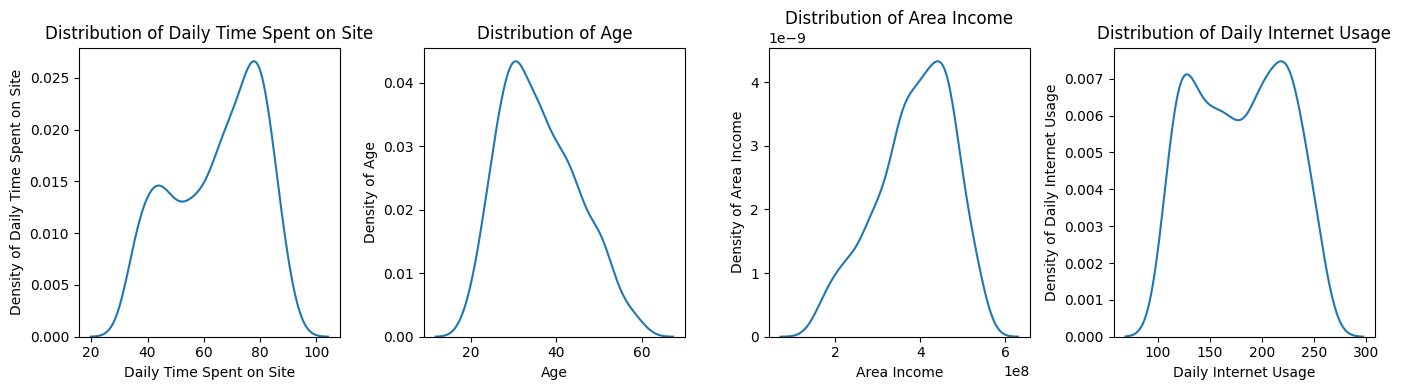

Test Data Distribution Before Scaling: 


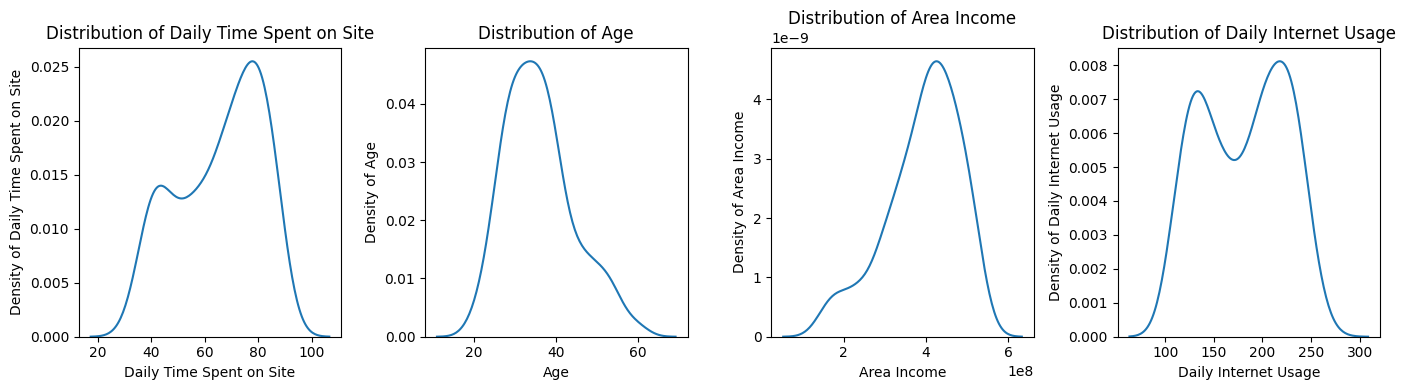

In [108]:
# Checking distribution before scaling
columns_to_scale = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'] # Choose columns for scaling based on the distribution in EDA

print("Train Data Distribution Before Scaling: ")
plot_dynamic_hisplots_kdeplots(df=X2_train, col_series=columns_to_scale, plot_type='kdeplot', ncols=4, figsize=(14, 4))

print("Test Data Distribution Before Scaling: ")
plot_dynamic_hisplots_kdeplots(df=X2_test, col_series=columns_to_scale, plot_type='kdeplot', ncols=4, figsize=(14, 4))

The overall feature distribution is near normal distribution, but the problem lies in the values range. The proper method of scalling for this case is standardization.

**Reminder About Choosing Scaling Methods**

If the issue is primarily with the range of values rather than the shape of the distributions, you can use scaling methods to bring all features to a similar scale without altering their distributions. Here are some common scaling methods you can consider:

1. **Min-Max Scaling (Normalization)**:
   - Scales the data to a fixed range, usually between 0 and 1.
   - Formula: \( X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \)
   - Use when you know the minimum and maximum values for your features or when you want to bound the data within a specific range.

2. **Standard Scaling (Standardization)**:
   - Scales the data so that it has a mean of 0 and a standard deviation of 1.
   - Formula: \( X_{\text{scaled}} = \frac{X - \mu}{\sigma} \)
   - Use when the features are normally distributed or when you're using models that assume zero-centered data.

3. **Robust Scaling**:
   - Scales the data similarly to standard scaling but uses the median and the interquartile range (IQR) instead of the mean and standard deviation.
   - Formula: \( X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}(X)} \)
   - Use when the data contains outliers or when the distribution is not normal.

4. **Max Abs Scaler**:
   - Scales each feature to its maximum absolute value.
   - Formula: \( X_{\text{scaled}} = \frac{X}{\max(|X|)} \)
   - Use when the features are sparse or when you want to preserve sparsity.

5. **Power Transformer (Yeo-Johnson or Box-Cox)**:
   - Applies a power transformation to make the data more Gaussian-like.
   - Use when the data is skewed or when you need to stabilize variance.

For your case where the overall feature distributions are near normal but the ranges vary significantly, Min-Max Scaling or Standard Scaling might be appropriate. If you're concerned about outliers, Robust Scaling could be a better choice. It's often a good idea to try different scaling methods and see which one works best for your specific dataset and model.

In [109]:
# Statistical summary of mean and standard deviation before scale
X2_train[columns_to_scale].describe().transpose()[['mean', 'std']]

mean           std
Daily Time Spent on Site  6.469393e+01  1.579638e+01
Age                       3.603608e+01  8.968643e+00
Area Income               3.849767e+08  9.025912e+07
Daily Internet Usage      1.794542e+02  4.393979e+01

In [110]:
# Scaling with standardization method
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X2_train[columns_to_scale] = ss.fit_transform(X2_train[columns_to_scale])
X2_test[columns_to_scale] = ss.transform(X2_test[columns_to_scale])

In [111]:
# Statistical summary of mean and standard deviation after scale
X2_train[columns_to_scale].describe().transpose()[['mean', 'std']]

mean       std
Daily Time Spent on Site -4.844610e-16  1.000722
Age                       3.486068e-16  1.000722
Area Income               1.307276e-16  1.000722
Daily Internet Usage     -4.114073e-16  1.000722

Train Data Distribution Before Scaling: 


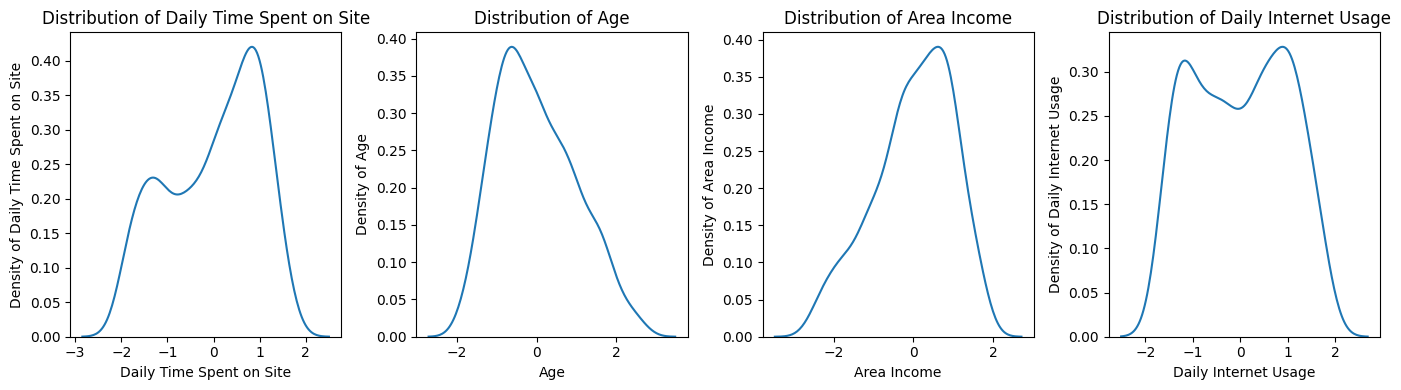

Test Data Distribution Before Scaling: 


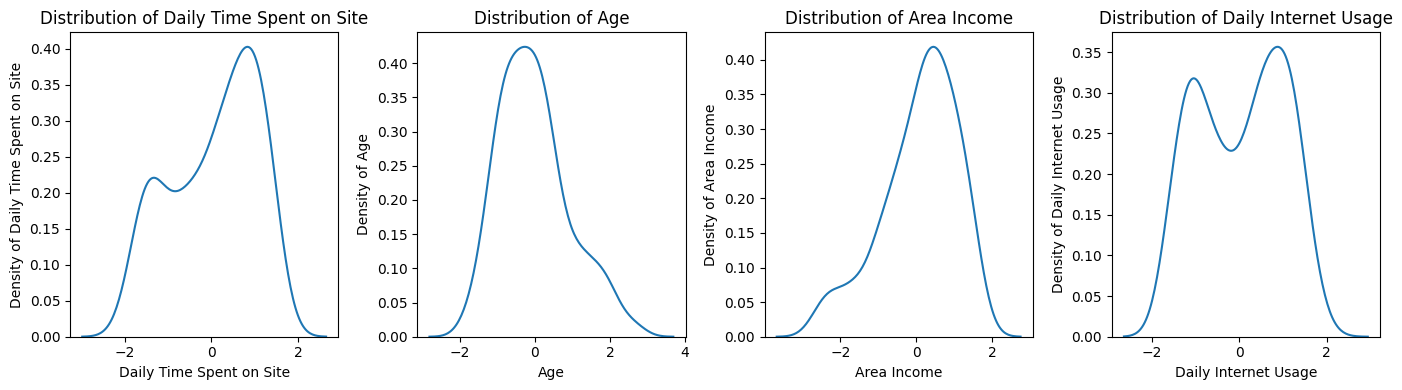

In [112]:
# Checking distribution before scaling

print("Train Data Distribution Before Scaling: ")
plot_dynamic_hisplots_kdeplots(df=X2_train, col_series=columns_to_scale, plot_type='kdeplot', ncols=4, figsize=(14, 4))

print("Test Data Distribution Before Scaling: ")
plot_dynamic_hisplots_kdeplots(df=X2_test, col_series=columns_to_scale, plot_type='kdeplot', ncols=4, figsize=(14, 4))

# **STAGE 3 : MODELLING AND EVALUATION**

## **Before Normalization/Standardization**

### Helper Function

First we will define some functions that will help us in the process of training and evaluation.

In [71]:
# Import metrics score that will be evalueated
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time

# Evaluation score calculation
def eval_classification(model):
    y_pred = model.predict(x1_test)
    y_pred_train = model.predict(x1_train)
    y_pred_proba = model.predict_proba(x1_test)
    y_pred_proba_train = model.predict_proba(x1_train)

    # Print evaluation scores
    print(f"Accuracy Score (Test Set): {accuracy_score(y_pred, y1_test)* 100:.2f}")
    print(f"Accuracy Score (Train Set): {accuracy_score(y1_train, y_pred_train)* 100:.2f}")

    print(f"Precision Score (Test Set): {precision_score(y_pred, y1_test)* 100:.2f}")
    print(f"Precision Score (Train Set): {precision_score(y1_train, y_pred_train)* 100:.2f}")

    print(f"Recall Score (Test Set): {recall_score(y_pred, y1_test)* 100:.2f}")
    print(f"Recall Score (Train Set): {recall_score(y1_train, y_pred_train)* 100:.2f}")

    print(f"F1 Score (Test Set): {f1_score(y_pred, y1_test)* 100:.2f}")
    print(f"F1 Score (Train Set): {f1_score(y1_train, y_pred_train)* 100:.2f}")
    
    print(f"ROC-AUC (Test-Proba): {roc_auc_score(y1_test, y_pred_proba[:, 1])* 100:.2f}")
    print(f"ROC-AUC (Train-Proba): {roc_auc_score(y1_train, y_pred_proba_train[:, 1])* 100:.2f}")

    # Cross Validation
    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 5)
    score = cross_validate(model, x1_train, y1_train, cv=cv, scoring='accuracy', return_train_score=True) # Scoring change based on what metrics we want to validate (usually choose the main performance metric)
    print(f'Accuracy (Crossval Test): {score['test_score'].mean()* 100:.2f}') 
    print(f'Accuracy (Crossval Train): {score['train_score'].mean()* 100:.2f}')

def grid_pipe1(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models1 = {}
    fit_time1 = []
    for name, pipeline in pipedict.items():

    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 5)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True, error_score='raise')

        # Fit using grid search
        start = time.time()
        model.fit(x1_train, y1_train)
        end = time.time()
        fit_time1.append(round(end-start, 2))

        #Append model
        fitted_models1[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models1, fit_time1 

def confusion_matrix1(model):
    y_pred = model.predict(x1_test)
    y_pred_proba = model.predict_proba(x1_test)

    print(f"Accuracy Score (Test Set): {accuracy_score(y_pred, y1_test) * 100:.2f}")
    print(f"Precision Score (Test Set): {precision_score(y_pred, y1_test) * 100:.2f}")
    print(f"Recall Score (Test Set): {recall_score(y_pred, y1_test) * 100:.2f}")
    print(f"F1 Score (Test Set): {f1_score(y_pred, y1_test) *100:.2f}")
    print(f"ROC-AUC (Test-Proba): {roc_auc_score(y1_test, y_pred_proba[:, 1]) *100:.2f}")

    conf_mat = confusion_matrix(y1_test, y_pred)
    ax = plt.subplot()
    sns.heatmap(conf_mat, ax=ax, fmt='d', cmap='Blues', xticklabels=['False (0)', 'True (1)'], yticklabels=['False (0)', 'True (1)'])

    # Add annotations for TN, FN, FP, TP
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:
                text = f'TN = {conf_mat[i, j]}'
            elif i == 1 and j == 0:
                text = f'FN = {conf_mat[i, j]}'
            elif i == 0 and j == 1:
                text = f'FP = {conf_mat[i, j]}'
            elif i == 1 and j == 1:
                text = f'TP = {conf_mat[i, j]}'

            plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=12)
            
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {str(model)}')

**Additional Information About confusion_matrix in sckit-learn**

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

The `confusion_matrix` function from scikit-learn is used to compute the confusion matrix, which is a table that summarizes the performance of a classification algorithm. The confusion matrix is typically a 2x2 matrix for binary classification problems.

Here's the breakdown:

```python
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_mat = confusion_matrix(y_test, y_pred)
```

The confusion matrix `conf_mat` will be a 2x2 matrix in the form:

```
[[True Negative  False Positive]
 [False Negative True Positive]]
```

- True Negative (TN): The instances that are actually negative (class 0) and are predicted correctly as negative.
- False Positive (FP): The instances that are actually negative (class 0) but are predicted incorrectly as positive.
- False Negative (FN): The instances that are actually positive (class 1) but are predicted incorrectly as negative.
- True Positive (TP): The instances that are actually positive (class 1) and are predicted correctly as positive.

So, in the confusion matrix `conf_mat`, the elements are arranged as follows:

- `conf_mat[0, 0]`: True Negatives (TN)
- `conf_mat[0, 1]`: False Positives (FP)
- `conf_mat[1, 0]`: False Negatives (FN)
- `conf_mat[1, 1]`: True Positives (TP)

These values help evaluate the performance of your binary classification model. The diagonal elements (`conf_mat[0, 0]` and `conf_mat[1, 1]`) represent correct predictions, while the off-diagonal elements represent errors in predictions.

### Train Vanilla Models

In [72]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Initiatialize object for each model
lg1 = LogisticRegression(random_state=42)
knn1 = KNeighborsClassifier()
dt1 = DecisionTreeClassifier(random_state=42)
rf1 = RandomForestClassifier(random_state=42)
gb1 = GradientBoostingClassifier(random_state=42)
xgb1 = XGBClassifier(random_state=42)

models = [lg1, knn1, dt1, rf1, gb1, xgb1]

# Train models
for model in models :
    model.fit(x1_train, y1_train)

### Evaluate Vanilla Models

#### Logistic Regression

In [73]:
eval_classification(lg1)

Accuracy Score (Test Set): 91.61
Accuracy Score (Train Set): 89.47
Precision Score (Test Set): 88.19
Precision Score (Train Set): 92.02
Recall Score (Test Set): 94.07
Recall Score (Train Set): 86.46
F1 Score (Test Set): 91.04
F1 Score (Train Set): 89.15
ROC-AUC (Test-Proba): 96.20
ROC-AUC (Train-Proba): 95.16
Accuracy (Crossval Test): 77.79
Accuracy (Crossval Train): 78.22


Accuracy Score (Test Set): 91.61
Precision Score (Test Set): 88.19
Recall Score (Test Set): 94.07
F1 Score (Test Set): 91.04
ROC-AUC (Test-Proba): 96.20


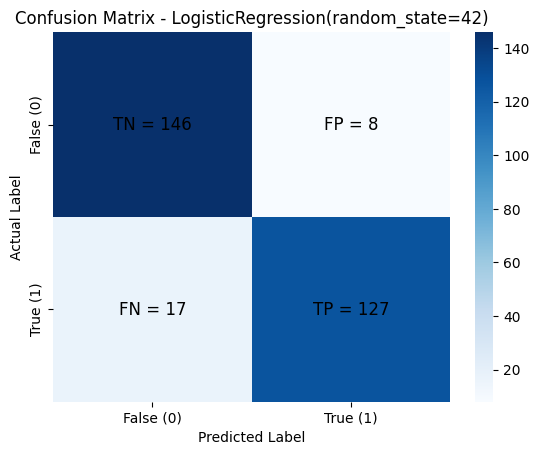

In [74]:
confusion_matrix1(lg1)

#### K-Nearest Neighbours

In [75]:
eval_classification(knn1)

Accuracy Score (Test Set): 65.77
Accuracy Score (Train Set): 76.48
Precision Score (Test Set): 54.86
Precision Score (Train Set): 78.22
Recall Score (Test Set): 68.10
Recall Score (Train Set): 73.49
F1 Score (Test Set): 60.77
F1 Score (Train Set): 75.78
ROC-AUC (Test-Proba): 68.05
ROC-AUC (Train-Proba): 85.57
Accuracy (Crossval Test): 66.44
Accuracy (Crossval Train): 76.67


Accuracy Score (Test Set): 65.77
Precision Score (Test Set): 54.86
Recall Score (Test Set): 68.10
F1 Score (Test Set): 60.77
ROC-AUC (Test-Proba): 68.05


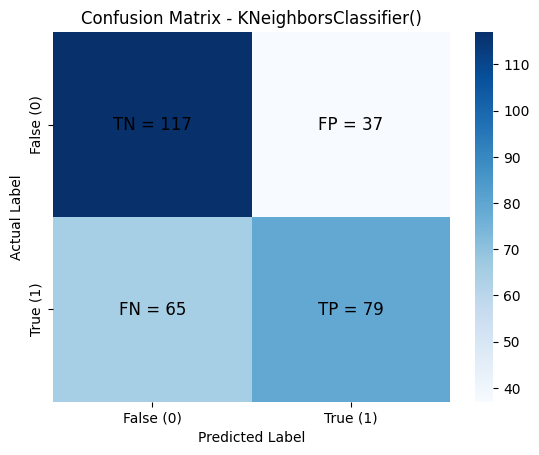

In [76]:
confusion_matrix1(knn1)

#### Decision Tree

In [77]:
eval_classification(dt1)

Accuracy Score (Test Set): 94.30
Accuracy Score (Train Set): 100.00
Precision Score (Test Set): 94.44
Precision Score (Train Set): 100.00
Recall Score (Test Set): 93.79
Recall Score (Train Set): 100.00
F1 Score (Test Set): 94.12
F1 Score (Train Set): 100.00
ROC-AUC (Test-Proba): 94.30
ROC-AUC (Train-Proba): 100.00
Accuracy (Crossval Test): 93.19
Accuracy (Crossval Train): 100.00


Accuracy Score (Test Set): 94.30
Precision Score (Test Set): 94.44
Recall Score (Test Set): 93.79
F1 Score (Test Set): 94.12
ROC-AUC (Test-Proba): 94.30


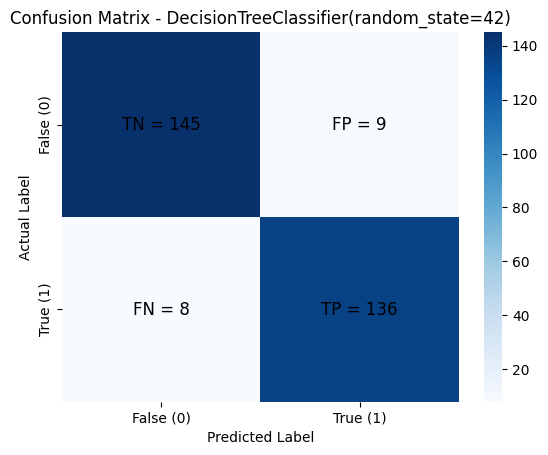

In [78]:
confusion_matrix1(dt1)

#### Random Forest

In [79]:
eval_classification(rf1)

Accuracy Score (Test Set): 97.65
Accuracy Score (Train Set): 100.00
Precision Score (Test Set): 96.53
Precision Score (Train Set): 100.00
Recall Score (Test Set): 98.58
Recall Score (Train Set): 100.00
F1 Score (Test Set): 97.54
F1 Score (Train Set): 100.00
ROC-AUC (Test-Proba): 99.08
ROC-AUC (Train-Proba): 100.00
Accuracy (Crossval Test): 95.76
Accuracy (Crossval Train): 100.00


Accuracy Score (Test Set): 97.65
Precision Score (Test Set): 96.53
Recall Score (Test Set): 98.58
F1 Score (Test Set): 97.54
ROC-AUC (Test-Proba): 99.08


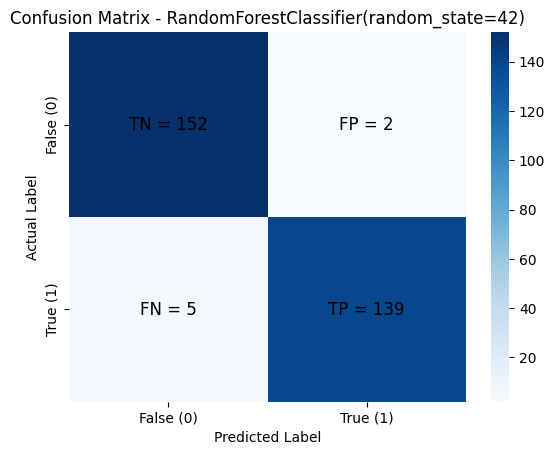

In [80]:
confusion_matrix1(rf1)

#### GradientBoost

In [81]:
eval_classification(gb1)

Accuracy Score (Test Set): 96.98
Accuracy Score (Train Set): 99.86
Precision Score (Test Set): 96.53
Precision Score (Train Set): 100.00
Recall Score (Test Set): 97.20
Recall Score (Train Set): 99.71
F1 Score (Test Set): 96.86
F1 Score (Train Set): 99.86
ROC-AUC (Test-Proba): 99.02
ROC-AUC (Train-Proba): 100.00
Accuracy (Crossval Test): 94.81
Accuracy (Crossval Train): 99.94


Accuracy Score (Test Set): 96.98
Precision Score (Test Set): 96.53
Recall Score (Test Set): 97.20
F1 Score (Test Set): 96.86
ROC-AUC (Test-Proba): 99.02


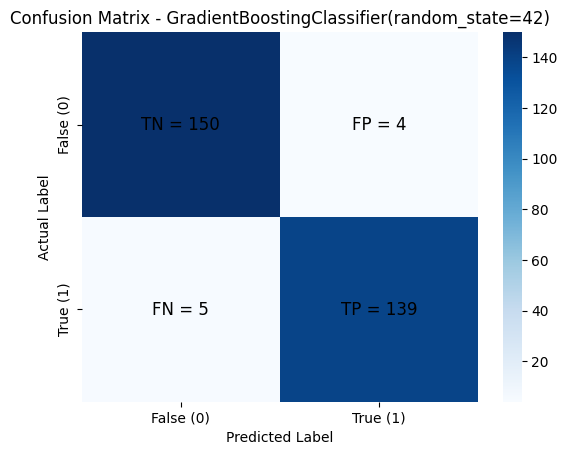

In [82]:
confusion_matrix1(gb1)

#### XGBoost

In [83]:
eval_classification(xgb1)

Accuracy Score (Test Set): 97.32
Accuracy Score (Train Set): 100.00
Precision Score (Test Set): 95.83
Precision Score (Train Set): 100.00
Recall Score (Test Set): 98.57
Recall Score (Train Set): 100.00
F1 Score (Test Set): 97.18
F1 Score (Train Set): 100.00
ROC-AUC (Test-Proba): 99.08
ROC-AUC (Train-Proba): 100.00
Accuracy (Crossval Test): 94.11
Accuracy (Crossval Train): 100.00


Accuracy Score (Test Set): 97.32
Precision Score (Test Set): 95.83
Recall Score (Test Set): 98.57
F1 Score (Test Set): 97.18
ROC-AUC (Test-Proba): 99.08


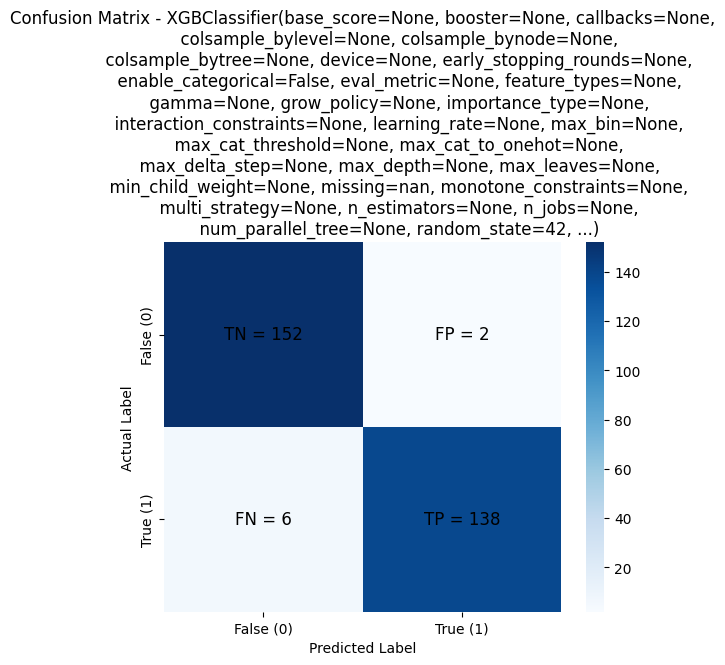

In [84]:
confusion_matrix1(xgb1)

> There are some overfitting models, to tackle this issue hyperparameter tuning will be done.

In [89]:
# # Printing metrics in form of classification report (Additional)
# from sklearn.metrics import classification_report

# def display_classification_reports(model_for_report):
#     model_for_report.fit(x1_train, y1_train)
#     y_pred = model_for_report.predict(x1_test)
#     print("Classification Report for", type(model_for_report).__name__)
#     print(classification_report(y1_test, y_pred))

# # Evaluate and print classification reports for all models
# for model in models:
#     display_classification_reports(model)

### Hyperparameter Tuning

In [90]:
?Pipeline

Init signature: Pipeline(steps, *, memory=None, verbose=False)
Docstring:     
A sequence of data transformers with an optional final predictor.

`Pipeline` allows you to sequentially apply a list of transformers to
preprocess the data and, if desired, conclude the sequence with a final
:term:`predictor` for predictive modeling.

Intermediate steps of the pipeline must be 'transforms', that is, they
must implement `fit` and `transform` methods.
The final :term:`estimator` only needs to implement `fit`.
The transformers in the pipeline can be cached using ``memory`` argument.

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters. For this, it
enables setting parameters of the various steps using their names and the
parameter name separated by a `'__'`, as in the example below. A step's
estimator may be replaced entirely by setting the parameter with its name
to another estimator, or a transformer removed by sett

In [127]:
# Create pipeline for each of the classifiers.
pipelines = {'logisticregression1': Pipeline([('clf', LogisticRegression(random_state=42))]),
             'knn1': Pipeline([('clf', KNeighborsClassifier())]),
            'decisiontree1': Pipeline([('clf', DecisionTreeClassifier(random_state = 42))]),
            'randomforest1': Pipeline([('clf', RandomForestClassifier(random_state = 42))]),
            'gb1': Pipeline([('clf', GradientBoostingClassifier(random_state = 42))]),
            'xgboost1': Pipeline([('clf', XGBClassifier(random_state=42))])}

# Define Hyperparameters for each pipeline
hyperparameters_lr1 ={'clf__C': [float(x) for x in np.linspace(0.002, 1, 100)],
                      'clf__penalty' : ['l2'],
                      'clf__solver' : ['newton-cg', 'lbfgs', 'newton-cholesky', 'liblinear'],
                      'clf__max_iter':[10000]}

hyperparameters_dt1 ={'clf__criterion' : ['entropy', 'gini'],
                      'clf__max_depth' : [int(x) for x in np.linspace(1, 20, 20)],
                      'clf__min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__max_features' : ['sqrt'],
                      'clf__splitter' : ['best']}

hyperparameters_rf1 ={'clf__n_estimators': [50, 60, 75, 100, 120],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__max_features':['sqrt' , None],
                     'clf__min_samples_leaf':[0.05, 0.1, 0.2]}

hyperparameters_knn1 ={'clf__n_neighbors' : list(range(1,30)),
                       'clf__weights' : ['uniform'],
                       'clf__p' : [1, 2],
                       'clf__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_gb1 ={'clf__n_estimators' : [int(x) for x in np.linspace(10, 50, num = 5)],
                      'clf__criterion' : ['friedman_mse', 'squared_error'],
                      'clf__max_depth' : [1, 2, 3],
                      'clf__min_samples_split' : [2, 3, 5],
                      'clf__min_samples_leaf' : [2, 3, 5],
                      'clf__max_features' : ['sqrt'],
                      'clf__loss' : ['exponential']}

hyperparameters_xgb1 ={'clf__eta': [float(x) for x in np.linspace(0.1, 0.7, 20)],
                     'clf__max_depth': [1, 3, 5],
                     'clf__nthread' : [2, 4, 6, 8],
                     'clf__tree_method' : ['approx', 'hist']}

# Instantiate hyperparapeter dictionary
hyperparameters = {'logisticregression1':hyperparameters_lr1,
                   'decisiontree1':hyperparameters_dt1,
                   'randomforest1':hyperparameters_rf1,
                   'knn1':hyperparameters_knn1,
                   'gb1':hyperparameters_gb1,
                   'xgboost1': hyperparameters_xgb1}

In [128]:
fitted_models1, fit_time1 = grid_pipe1(pipelines, hyperparameters, scoring='accuracy')

Fitting 25 folds for each of 400 candidates, totalling 10000 fits
The logisticregression1 model has been fitted.
Total Fit Time: 74.458s
Best accuracy: 0.945
Best params:
 {'clf__C': 0.4253939393939394, 'clf__max_iter': 10000, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'} 

Fitting 25 folds for each of 232 candidates, totalling 5800 fits
The knn1 model has been fitted.
Total Fit Time: 38.982s
Best accuracy: 0.719
Best params:
 {'clf__algorithm': 'auto', 'clf__n_neighbors': 28, 'clf__p': 1, 'clf__weights': 'uniform'} 

Fitting 25 folds for each of 1000 candidates, totalling 25000 fits
The decisiontree1 model has been fitted.
Total Fit Time: 31.354s
Best accuracy: 0.929
Best params:
 {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 50, 'clf__splitter': 'best'} 

Fitting 25 folds for each of 60 candidates, totalling 1500 fits
The randomforest1 model has been fitted.
Total Fit Time: 34.024s
Best accura

### Train Tuned Models

In [85]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Initiatialize object for each model
lg1_tuned = LogisticRegression(random_state=42, C=0.4253939393939394, max_iter=10000, penalty='l2', solver='newton-cg')
knn1_tuned = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 28, p = 1, weights = 'uniform')
dt1_tuned = DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth = 4, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 50, splitter = 'best')
rf1_tuned = RandomForestClassifier(random_state=42, criterion = 'entropy', max_features = 'sqrt', min_samples_leaf = 0.05, n_estimators = 100)
gb1_tuned = GradientBoostingClassifier(random_state=42, criterion = 'friedman_mse', loss = 'exponential', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 2, n_estimators = 50)
xgb1_tuned = XGBClassifier(random_state=42, eta=0.19473684210526315, max_depth = 1, nthread=6, tree_method='approx')

models = [lg1_tuned, knn1_tuned, dt1_tuned, rf1_tuned, gb1_tuned, xgb1_tuned]

# Train models
for model in models :
    model.fit(x1_train, y1_train)

### Evaluate Tuned Models

#### Logistic Regression

In [86]:
eval_classification(lg1_tuned)

Accuracy Score (Test Set): 97.32
Accuracy Score (Train Set): 96.39
Precision Score (Test Set): 96.53
Precision Score (Train Set): 97.92
Recall Score (Test Set): 97.89
Recall Score (Train Set): 94.81
F1 Score (Test Set): 97.20
F1 Score (Train Set): 96.34
ROC-AUC (Test-Proba): 99.24
ROC-AUC (Train-Proba): 99.08
Accuracy (Crossval Test): 94.49
Accuracy (Crossval Train): 95.01


Accuracy Score (Test Set): 97.32
Precision Score (Test Set): 96.53
Recall Score (Test Set): 97.89
F1 Score (Test Set): 97.20
ROC-AUC (Test-Proba): 99.24


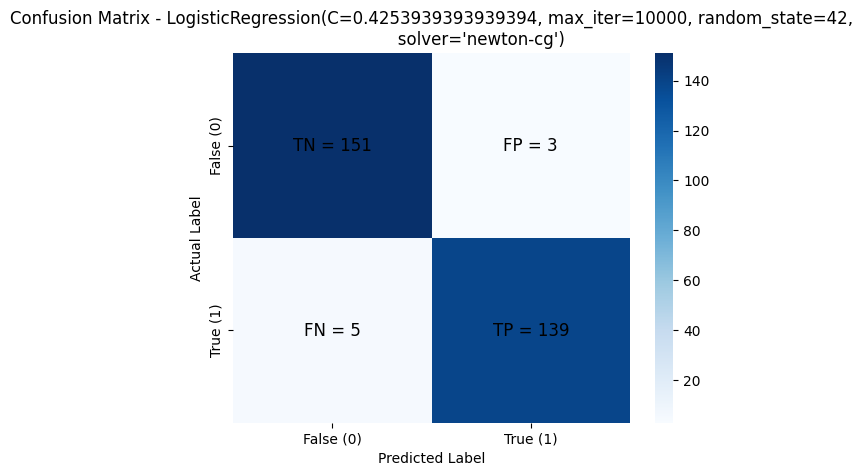

In [87]:
confusion_matrix1(lg1_tuned)

#### K-Nearest Neighbours

In [88]:
eval_classification(knn1_tuned)

Accuracy Score (Test Set): 67.45
Accuracy Score (Train Set): 72.73
Precision Score (Test Set): 52.08
Precision Score (Train Set): 77.05
Recall Score (Test Set): 72.82
Recall Score (Train Set): 64.84
F1 Score (Test Set): 60.73
F1 Score (Train Set): 70.42
ROC-AUC (Test-Proba): 71.65
ROC-AUC (Train-Proba): 79.54
Accuracy (Crossval Test): 71.95
Accuracy (Crossval Train): 72.97


Accuracy Score (Test Set): 67.45
Precision Score (Test Set): 52.08
Recall Score (Test Set): 72.82
F1 Score (Test Set): 60.73
ROC-AUC (Test-Proba): 71.65


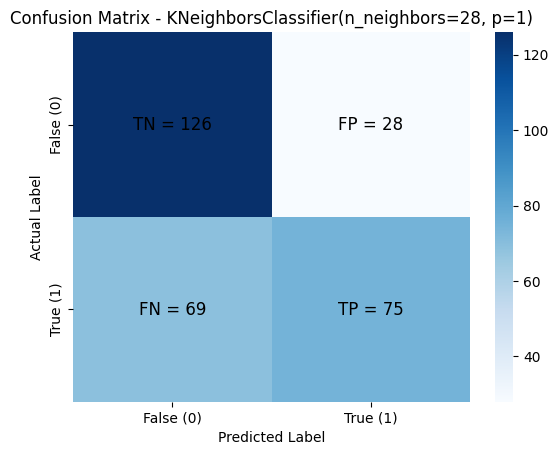

In [89]:
confusion_matrix1(knn1_tuned)

#### Decision Tree

In [90]:
eval_classification(dt1_tuned)

Accuracy Score (Test Set): 94.63
Accuracy Score (Train Set): 94.66
Precision Score (Test Set): 95.14
Precision Score (Train Set): 94.03
Recall Score (Test Set): 93.84
Recall Score (Train Set): 95.39
F1 Score (Test Set): 94.48
F1 Score (Train Set): 94.71
ROC-AUC (Test-Proba): 95.46
ROC-AUC (Train-Proba): 96.44
Accuracy (Crossval Test): 92.87
Accuracy (Crossval Train): 94.44


Accuracy Score (Test Set): 94.63
Precision Score (Test Set): 95.14
Recall Score (Test Set): 93.84
F1 Score (Test Set): 94.48
ROC-AUC (Test-Proba): 95.46


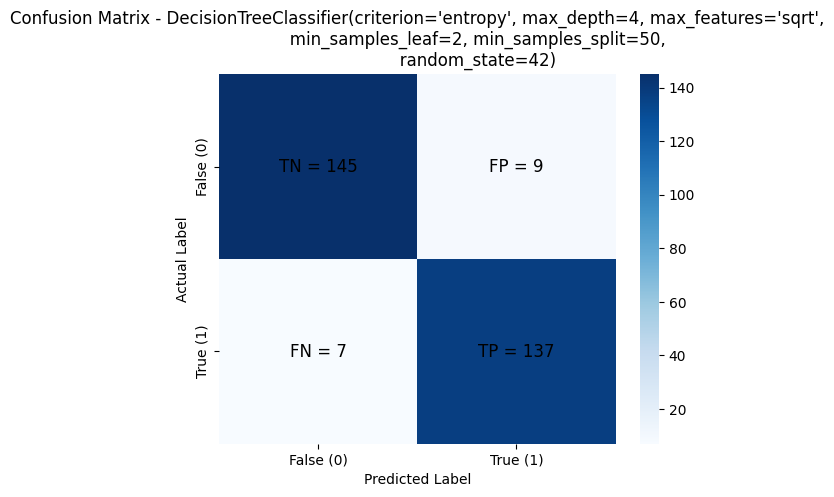

In [91]:
confusion_matrix1(dt1_tuned)

#### Random Forest

In [92]:
eval_classification(rf1_tuned)

Accuracy Score (Test Set): 95.97
Accuracy Score (Train Set): 95.09
Precision Score (Test Set): 94.44
Precision Score (Train Set): 95.89
Recall Score (Test Set): 97.14
Recall Score (Train Set): 94.24
F1 Score (Test Set): 95.77
F1 Score (Train Set): 95.06
ROC-AUC (Test-Proba): 99.04
ROC-AUC (Train-Proba): 99.15
Accuracy (Crossval Test): 94.43
Accuracy (Crossval Train): 95.48


Accuracy Score (Test Set): 95.97
Precision Score (Test Set): 94.44
Recall Score (Test Set): 97.14
F1 Score (Test Set): 95.77
ROC-AUC (Test-Proba): 99.04


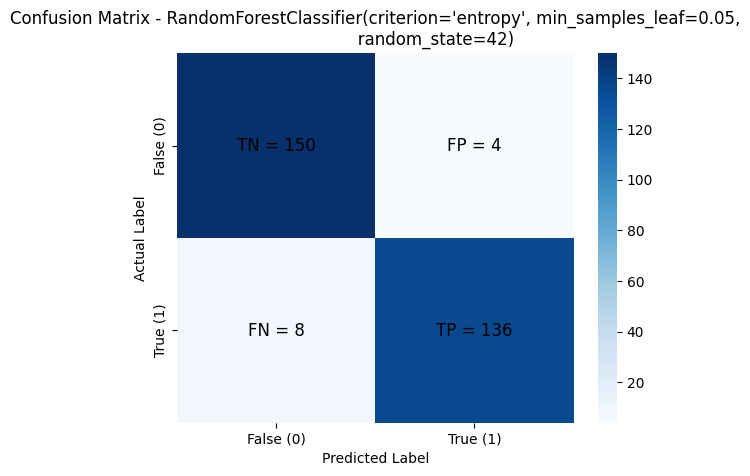

In [93]:
confusion_matrix1(rf1_tuned)

#### GradientBoost

In [94]:
eval_classification(gb1_tuned)

Accuracy Score (Test Set): 96.98
Accuracy Score (Train Set): 97.84
Precision Score (Test Set): 96.53
Precision Score (Train Set): 98.82
Recall Score (Test Set): 97.20
Recall Score (Train Set): 96.83
F1 Score (Test Set): 96.86
F1 Score (Train Set): 97.82
ROC-AUC (Test-Proba): 99.21
ROC-AUC (Train-Proba): 99.78
Accuracy (Crossval Test): 95.53
Accuracy (Crossval Train): 98.14


Accuracy Score (Test Set): 96.98
Precision Score (Test Set): 96.53
Recall Score (Test Set): 97.20
F1 Score (Test Set): 96.86
ROC-AUC (Test-Proba): 99.21


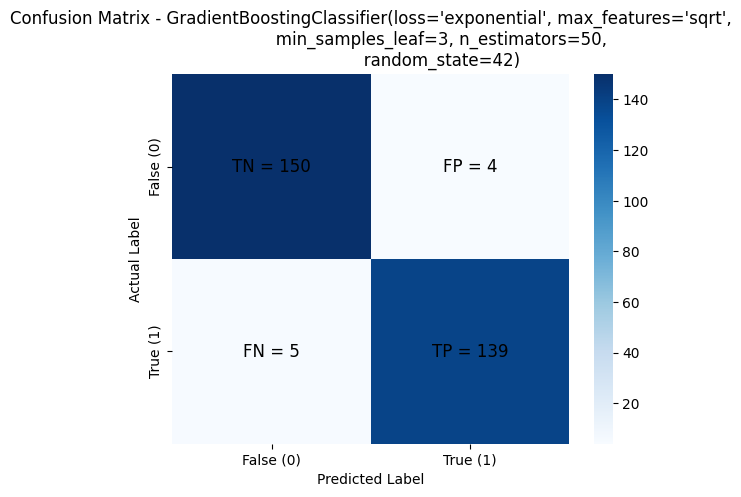

In [95]:
confusion_matrix1(gb1_tuned)

#### XGBoost

In [96]:
eval_classification(xgb1_tuned)

Accuracy Score (Test Set): 97.65
Accuracy Score (Train Set): 97.55
Precision Score (Test Set): 97.22
Precision Score (Train Set): 99.11
Recall Score (Test Set): 97.90
Recall Score (Train Set): 95.97
F1 Score (Test Set): 97.56
F1 Score (Train Set): 97.51
ROC-AUC (Test-Proba): 99.04
ROC-AUC (Train-Proba): 99.58
Accuracy (Crossval Test): 95.67
Accuracy (Crossval Train): 97.56


Accuracy Score (Test Set): 97.65
Precision Score (Test Set): 97.22
Recall Score (Test Set): 97.90
F1 Score (Test Set): 97.56
ROC-AUC (Test-Proba): 99.04


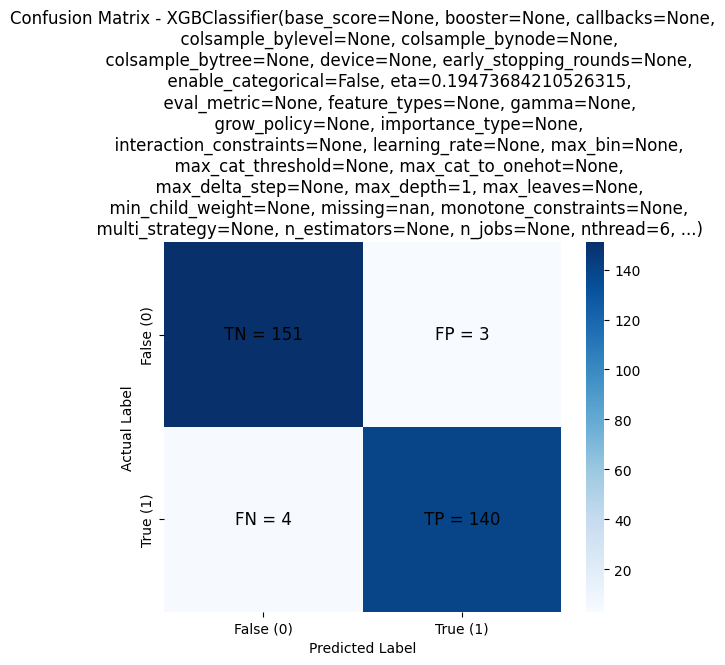

In [97]:
confusion_matrix1(xgb1_tuned)

## **After Normalization/Standardization**

### Helper Function

In [98]:
# Import metrics score that will be evalueated
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
import time

# Evaluation score calculation
def eval_classification(model):
    y_pred = model.predict(x2_test)
    y_pred_train = model.predict(x2_train)
    y_pred_proba = model.predict_proba(x2_test)
    y_pred_proba_train = model.predict_proba(x2_train)

    # Print evaluation scores
    print(f"Accuracy Score (Test Set): {accuracy_score(y_pred, y2_test)* 100:.2f}")
    print(f"Accuracy Score (Train Set): {accuracy_score(y2_train, y_pred_train)* 100:.2f}")

    print(f"Precision Score (Test Set): {precision_score(y_pred, y2_test)* 100:.2f}")
    print(f"Precision Score (Train Set): {precision_score(y2_train, y_pred_train)* 100:.2f}")

    print(f"Recall Score (Test Set): {recall_score(y_pred, y2_test)* 100:.2f}")
    print(f"Recall Score (Train Set): {recall_score(y2_train, y_pred_train)* 100:.2f}")

    print(f"F1 Score (Test Set): {f1_score(y_pred, y2_test)* 100:.2f}")
    print(f"F1 Score (Train Set): {f1_score(y2_train, y_pred_train)* 100:.2f}")
    
    print(f"ROC-AUC (Test-Proba): {roc_auc_score(y2_test, y_pred_proba[:, 1])* 100:.2f}")
    print(f"ROC-AUC (Train-Proba): {roc_auc_score(y2_train, y_pred_proba_train[:, 1])* 100:.2f}")

    # Cross Validation
    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 5)
    score = cross_validate(model, x2_train, y2_train, cv=cv, scoring='accuracy', return_train_score=True) # Scoring change based on what metrics we want to validate (usually choose the main performance metric)
    print(f'Accuracy (Crossval Test): {score['test_score'].mean()* 100:.2f}') 
    print(f'Accuracy (Crossval Train): {score['train_score'].mean()* 100:.2f}')

def grid_pipe2(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models2={}
    fit_time2 = []
    for name, pipeline in pipedict.items():

    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True)

        # Fit using grid search
        start = time.time()
        model.fit(x2_train, y2_train)
        end = time.time()
        fit_time2.append(round(end-start, 2))

        #Append model
        fitted_models2[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models2, fit_time2

def confusion_matrix2(model):
    y_pred = model.predict(x2_test)
    y_pred_proba = model.predict_proba(x2_test)

    print(f"Accuracy Score (Test Set): {accuracy_score(y_pred, y2_test) * 100:.2f}")
    print(f"Precision Score (Test Set): {precision_score(y_pred, y2_test) * 100:.2f}")
    print(f"Recall Score (Test Set): {recall_score(y_pred, y2_test) * 100:.2f}")
    print(f"F1 Score (Test Set): {f1_score(y_pred, y2_test) *100:.2f}")
    print(f"ROC-AUC (Test-Proba): {roc_auc_score(y2_test, y_pred_proba[:, 1]) *100:.2f}")

    conf_mat = confusion_matrix(y2_test, y_pred)
    ax = plt.subplot()
    sns.heatmap(conf_mat, ax=ax, fmt='d', cmap='Blues', xticklabels=['False (0)', 'True (1)'], yticklabels=['False (0)', 'True (1)'])

    # Add annotations for TN, FN, FP, TP
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:
                text = f'TN = {conf_mat[i, j]}'
            elif i == 1 and j == 0:
                text = f'FN = {conf_mat[i, j]}'
            elif i == 0 and j == 1:
                text = f'FP = {conf_mat[i, j]}'
            elif i == 1 and j == 1:
                text = f'TP = {conf_mat[i, j]}'

            plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=12)
            
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {str(model)}')

### Train Vanilla Models

In [99]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Initiatialize object for each model
lg2 = LogisticRegression(random_state=42)
knn2 = KNeighborsClassifier()
dt2 = DecisionTreeClassifier(random_state=42)
rf2 = RandomForestClassifier(random_state=42)
gb2 = GradientBoostingClassifier(random_state=42)
xgb2 = XGBClassifier(random_state=42)

models = [lg2, knn2, dt2, rf2, gb2, xgb2]

# Train models
for model in models :
    model.fit(x2_train, y2_train)

### Evaluate Vanilla Models

#### Logistic Regression

In [100]:
eval_classification(lg2)

Accuracy Score (Test Set): 96.98
Accuracy Score (Train Set): 96.83
Precision Score (Test Set): 97.22
Precision Score (Train Set): 97.94
Recall Score (Test Set): 96.55
Recall Score (Train Set): 95.68
F1 Score (Test Set): 96.89
F1 Score (Train Set): 96.79
ROC-AUC (Test-Proba): 99.30
ROC-AUC (Train-Proba): 99.19
Accuracy (Crossval Test): 96.16
Accuracy (Crossval Train): 96.79


Accuracy Score (Test Set): 96.98
Precision Score (Test Set): 97.22
Recall Score (Test Set): 96.55
F1 Score (Test Set): 96.89
ROC-AUC (Test-Proba): 99.30


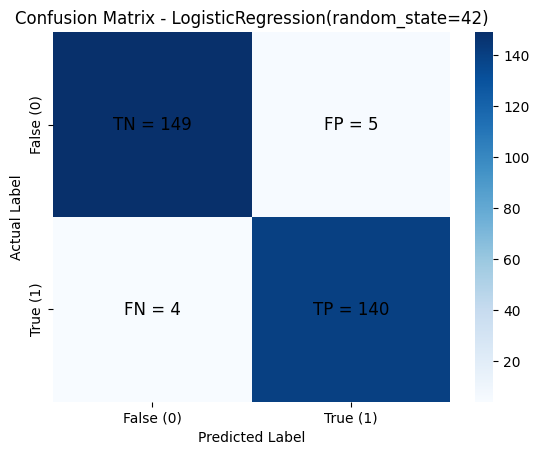

In [101]:
confusion_matrix2(lg2)

#### K-Nearest Neighbours

In [102]:
eval_classification(knn2)

Accuracy Score (Test Set): 98.32
Accuracy Score (Train Set): 96.10
Precision Score (Test Set): 96.53
Precision Score (Train Set): 98.78
Recall Score (Test Set): 100.00
Recall Score (Train Set): 93.37
F1 Score (Test Set): 98.23
F1 Score (Train Set): 96.00
ROC-AUC (Test-Proba): 99.15
ROC-AUC (Train-Proba): 99.58
Accuracy (Crossval Test): 95.50
Accuracy (Crossval Train): 96.13


Accuracy Score (Test Set): 98.32
Precision Score (Test Set): 96.53
Recall Score (Test Set): 100.00
F1 Score (Test Set): 98.23
ROC-AUC (Test-Proba): 99.15


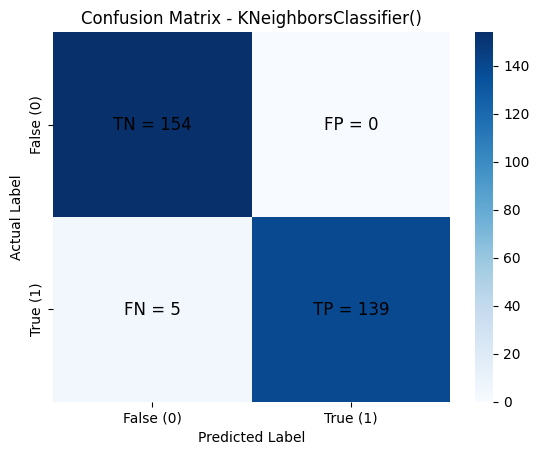

In [103]:
confusion_matrix2(knn2)

#### Decision Tree

In [104]:
eval_classification(dt2)

Accuracy Score (Test Set): 94.30
Accuracy Score (Train Set): 100.00
Precision Score (Test Set): 94.44
Precision Score (Train Set): 100.00
Recall Score (Test Set): 93.79
Recall Score (Train Set): 100.00
F1 Score (Test Set): 94.12
F1 Score (Train Set): 100.00
ROC-AUC (Test-Proba): 94.30
ROC-AUC (Train-Proba): 100.00
Accuracy (Crossval Test): 93.16
Accuracy (Crossval Train): 100.00


Accuracy Score (Test Set): 94.30
Precision Score (Test Set): 94.44
Recall Score (Test Set): 93.79
F1 Score (Test Set): 94.12
ROC-AUC (Test-Proba): 94.30


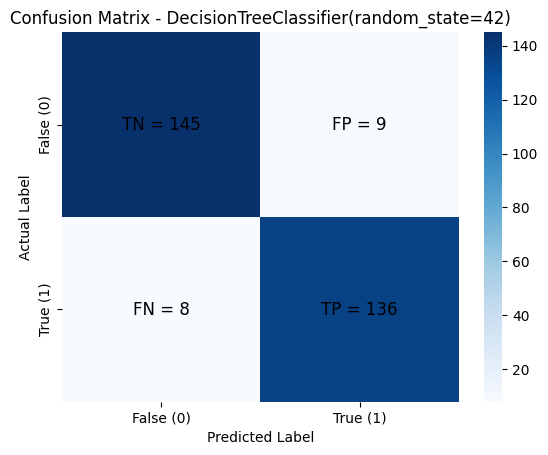

In [105]:
confusion_matrix2(dt2)

#### Random Forest

In [106]:
eval_classification(rf2)

Accuracy Score (Test Set): 97.65
Accuracy Score (Train Set): 100.00
Precision Score (Test Set): 96.53
Precision Score (Train Set): 100.00
Recall Score (Test Set): 98.58
Recall Score (Train Set): 100.00
F1 Score (Test Set): 97.54
F1 Score (Train Set): 100.00
ROC-AUC (Test-Proba): 99.18
ROC-AUC (Train-Proba): 100.00
Accuracy (Crossval Test): 95.76
Accuracy (Crossval Train): 100.00


Accuracy Score (Test Set): 97.65
Precision Score (Test Set): 96.53
Recall Score (Test Set): 98.58
F1 Score (Test Set): 97.54
ROC-AUC (Test-Proba): 99.18


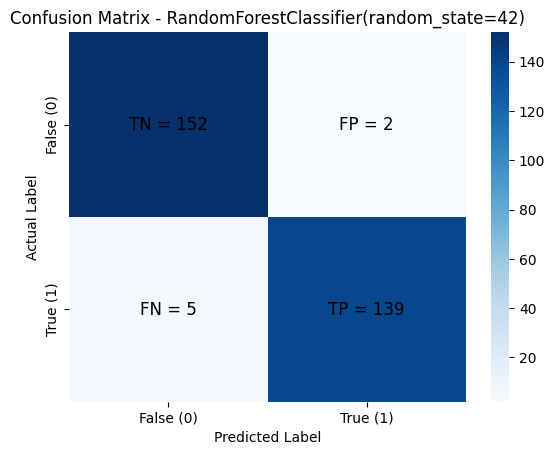

In [107]:
confusion_matrix2(rf2)

#### GradientBoost

In [108]:
eval_classification(gb2)

Accuracy Score (Test Set): 96.98
Accuracy Score (Train Set): 99.86
Precision Score (Test Set): 96.53
Precision Score (Train Set): 100.00
Recall Score (Test Set): 97.20
Recall Score (Train Set): 99.71
F1 Score (Test Set): 96.86
F1 Score (Train Set): 99.86
ROC-AUC (Test-Proba): 99.02
ROC-AUC (Train-Proba): 100.00
Accuracy (Crossval Test): 94.72
Accuracy (Crossval Train): 99.94


Accuracy Score (Test Set): 96.98
Precision Score (Test Set): 96.53
Recall Score (Test Set): 97.20
F1 Score (Test Set): 96.86
ROC-AUC (Test-Proba): 99.02


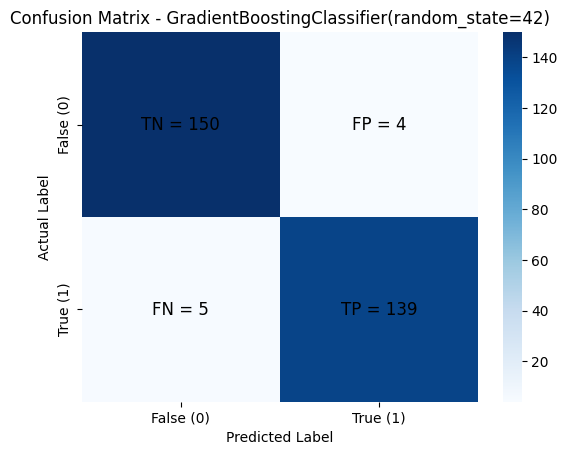

In [109]:
confusion_matrix2(gb2)

#### XGBoost

In [110]:
eval_classification(xgb2)

Accuracy Score (Test Set): 97.32
Accuracy Score (Train Set): 100.00
Precision Score (Test Set): 95.83
Precision Score (Train Set): 100.00
Recall Score (Test Set): 98.57
Recall Score (Train Set): 100.00
F1 Score (Test Set): 97.18
F1 Score (Train Set): 100.00
ROC-AUC (Test-Proba): 99.08
ROC-AUC (Train-Proba): 100.00
Accuracy (Crossval Test): 94.11
Accuracy (Crossval Train): 100.00


Accuracy Score (Test Set): 97.32
Precision Score (Test Set): 95.83
Recall Score (Test Set): 98.57
F1 Score (Test Set): 97.18
ROC-AUC (Test-Proba): 99.08


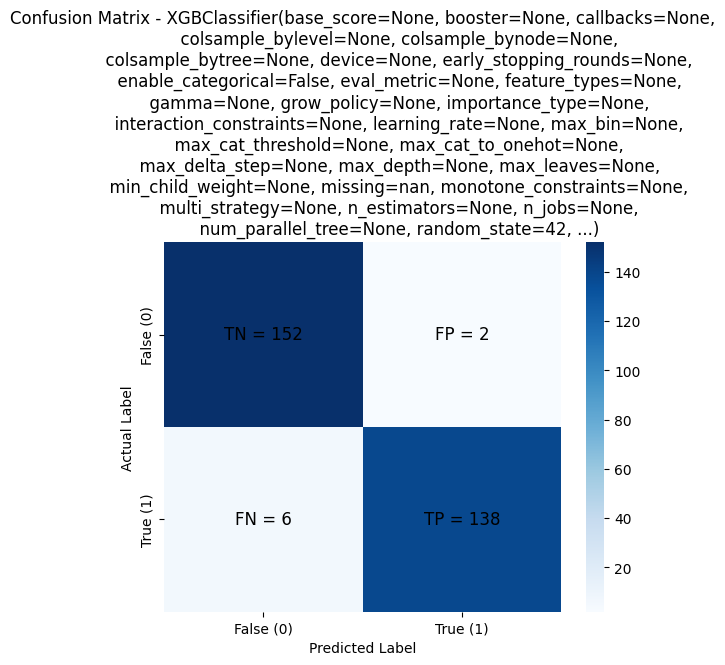

In [111]:
confusion_matrix2(xgb2)

Overfitting happens in some models, the same case with before normalization/standardization case. The solution will be the same which is hyperparameter tuning will be done.

### Hyperparameter Tuning

In [129]:
# Create pipeline for each of the classifiers.
pipelines = {'logisticregression2': Pipeline([('scaling', StandardScaler()), ('clf', LogisticRegression(random_state=42))]),
            'knn2':Pipeline([('scaling', StandardScaler()), ('clf', KNeighborsClassifier())]),
            'decisiontree2':Pipeline([('scaling', StandardScaler()), ('clf', DecisionTreeClassifier(random_state = 42))]),
            'randomforest2':Pipeline([('scaling', StandardScaler()), ('clf', RandomForestClassifier(random_state = 42))]),
            'gb2':Pipeline([('scaling', StandardScaler()), ('clf', GradientBoostingClassifier(random_state = 42))]),
            'xgboost2': Pipeline([('scaling', StandardScaler()), ('clf', XGBClassifier(random_state=42))])}

# Define Hyperparameters for each pipeline
hyperparameters_lr2 ={'clf__C': [float(x) for x in np.linspace(0.002, 1, 100)],
                      'clf__penalty' : ['l2'],
                      'clf__solver' : ['newton-cg', 'lbfgs', 'newton-cholesky', 'liblinear'],
                      'clf__max_iter':[10000]}

hyperparameters_dt2 ={'clf__criterion' : ['entropy', 'gini'],
                      'clf__max_depth' : [int(x) for x in np.linspace(1, 20, 20)],
                      'clf__min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__max_features' : ['sqrt'],
                      'clf__splitter' : ['best']}

hyperparameters_rf2 ={'clf__n_estimators': [50, 60, 75, 100, 120],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__max_features':['sqrt' , None],
                     'clf__min_samples_leaf':[0.05, 0.1, 0.2]}

hyperparameters_knn2 ={'clf__n_neighbors' : list(range(1,30)),
                       'clf__weights' : ['uniform'],
                       'clf__p' : [1, 2],
                       'clf__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_gb2 ={'clf__n_estimators' : [int(x) for x in np.linspace(10, 50, num = 5)],
                      'clf__criterion' : ['friedman_mse', 'squared_error'],
                      'clf__max_depth' : [1, 2, 3],
                      'clf__min_samples_split' : [2, 3, 5],
                      'clf__min_samples_leaf' : [2, 3, 5],
                      'clf__max_features' : ['sqrt'],
                      'clf__loss' : ['exponential']}

hyperparameters_xgb2 ={'clf__eta': [float(x) for x in np.linspace(0.1, 0.7, 20)],
                     'clf__max_depth': [1, 3, 5],
                     'clf__nthread' : [2, 4, 6, 8],
                     'clf__tree_method' : ['approx', 'hist']}

# Instantiate hyperparapeter dictionary
hyperparameters = {'logisticregression2':hyperparameters_lr2,
                   'decisiontree2':hyperparameters_dt2,
                   'randomforest2':hyperparameters_rf2,
                   'knn2':hyperparameters_knn2,
                   'gb2':hyperparameters_gb2,
                   'xgboost2': hyperparameters_xgb2}

In [130]:
fitted_models2, fit_time2 = grid_pipe2(pipelines, hyperparameters, scoring='accuracy')

Fitting 15 folds for each of 400 candidates, totalling 6000 fits
The logisticregression2 model has been fitted.
Total Fit Time: 10.985s
Best accuracy: 0.962
Best params:
 {'clf__C': 0.5161212121212121, 'clf__max_iter': 10000, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'} 

Fitting 15 folds for each of 232 candidates, totalling 3480 fits
The knn2 model has been fitted.
Total Fit Time: 26.604s
Best accuracy: 0.950
Best params:
 {'clf__algorithm': 'auto', 'clf__n_neighbors': 3, 'clf__p': 2, 'clf__weights': 'uniform'} 

Fitting 15 folds for each of 1000 candidates, totalling 15000 fits
The decisiontree2 model has been fitted.
Total Fit Time: 22.107s
Best accuracy: 0.931
Best params:
 {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 50, 'clf__splitter': 'best'} 

Fitting 15 folds for each of 60 candidates, totalling 900 fits
The randomforest2 model has been fitted.
Total Fit Time: 18.690s
Best accuracy: 0.9

### Train Tuned Models

In [112]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Initiatialize object for each model
lg2_tuned = LogisticRegression(random_state=42, C=0.5161212121212121, max_iter=10000, penalty='l2', solver='lbfgs')
knn2_tuned = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 3, p = 2, weights = 'uniform')
dt2_tuned = DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth = 4, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 50, splitter = 'best')
rf2_tuned = RandomForestClassifier(random_state=42, criterion = 'entropy', max_features = 'sqrt', min_samples_leaf = 0.05, n_estimators = 100)
gb2_tuned = GradientBoostingClassifier(random_state=42, criterion = 'friedman_mse', loss = 'exponential', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 50)
xgb2_tuned = XGBClassifier(random_state=42, eta=0.4157894736842105, max_depth = 1, nthread=2, tree_method='approx')

models = [lg2_tuned, knn2_tuned, dt2_tuned, rf2_tuned, gb2_tuned, xgb2_tuned]

# Train models
for model in models :
    model.fit(x2_train, y2_train)

### Evaluate Tuned Models

#### Logistic Regression

In [113]:
eval_classification(lg2_tuned)

Accuracy Score (Test Set): 97.32
Accuracy Score (Train Set): 96.68
Precision Score (Test Set): 97.22
Precision Score (Train Set): 97.93
Recall Score (Test Set): 97.22
Recall Score (Train Set): 95.39
F1 Score (Test Set): 97.22
F1 Score (Train Set): 96.64
ROC-AUC (Test-Proba): 99.31
ROC-AUC (Train-Proba): 99.17
Accuracy (Crossval Test): 96.13
Accuracy (Crossval Train): 96.75


Accuracy Score (Test Set): 97.32
Precision Score (Test Set): 97.22
Recall Score (Test Set): 97.22
F1 Score (Test Set): 97.22
ROC-AUC (Test-Proba): 99.31


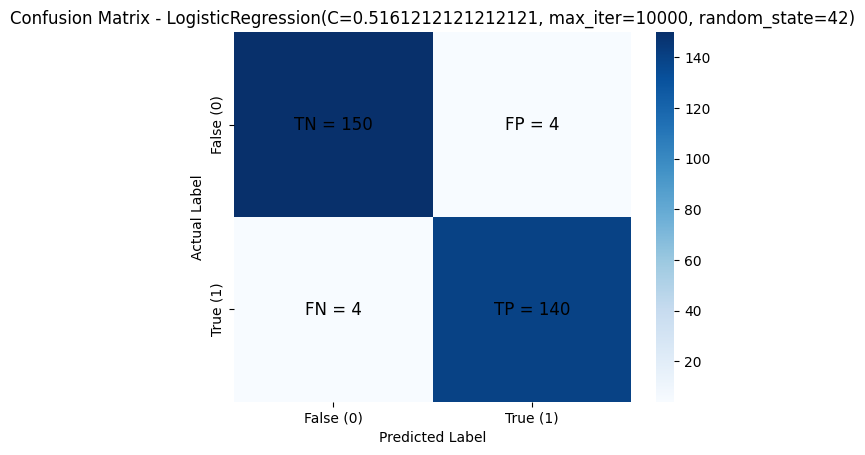

In [114]:
confusion_matrix2(lg2_tuned)

#### K-Nearest Neighbours

In [115]:
eval_classification(knn2_tuned)

Accuracy Score (Test Set): 97.99
Accuracy Score (Train Set): 96.97
Precision Score (Test Set): 96.53
Precision Score (Train Set): 99.70
Recall Score (Test Set): 99.29
Recall Score (Train Set): 94.24
F1 Score (Test Set): 97.89
F1 Score (Train Set): 96.89
ROC-AUC (Test-Proba): 99.12
ROC-AUC (Train-Proba): 99.69
Accuracy (Crossval Test): 95.07
Accuracy (Crossval Train): 96.88


Accuracy Score (Test Set): 97.99
Precision Score (Test Set): 96.53
Recall Score (Test Set): 99.29
F1 Score (Test Set): 97.89
ROC-AUC (Test-Proba): 99.12


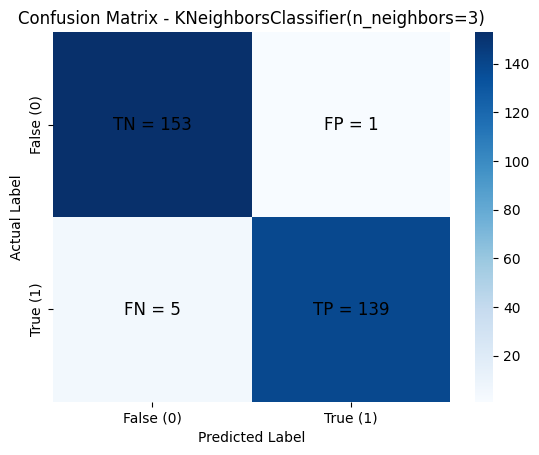

In [116]:
confusion_matrix2(knn2_tuned)

#### Decision Tree

In [117]:
eval_classification(dt2_tuned)

Accuracy Score (Test Set): 94.63
Accuracy Score (Train Set): 94.66
Precision Score (Test Set): 95.14
Precision Score (Train Set): 94.03
Recall Score (Test Set): 93.84
Recall Score (Train Set): 95.39
F1 Score (Test Set): 94.48
F1 Score (Train Set): 94.71
ROC-AUC (Test-Proba): 95.50
ROC-AUC (Train-Proba): 96.44
Accuracy (Crossval Test): 92.87
Accuracy (Crossval Train): 94.44


Accuracy Score (Test Set): 94.63
Precision Score (Test Set): 95.14
Recall Score (Test Set): 93.84
F1 Score (Test Set): 94.48
ROC-AUC (Test-Proba): 95.50


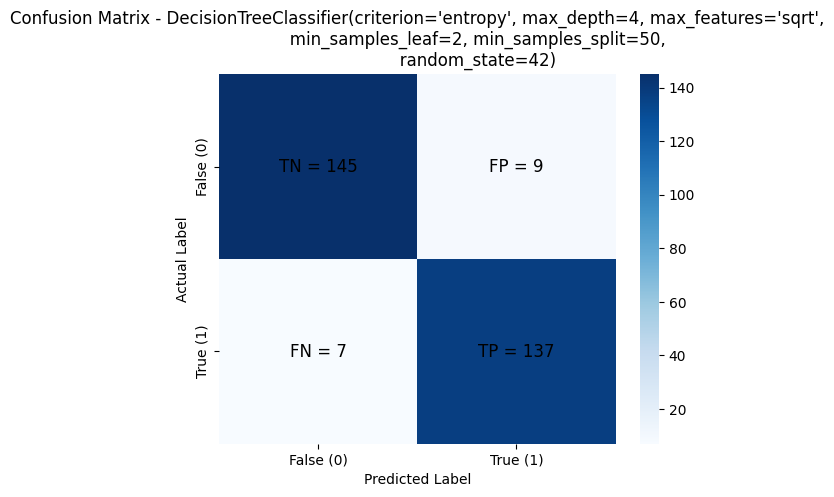

In [118]:
confusion_matrix2(dt2_tuned)

#### Random Forest

In [119]:
eval_classification(rf2_tuned)

Accuracy Score (Test Set): 95.97
Accuracy Score (Train Set): 95.09
Precision Score (Test Set): 94.44
Precision Score (Train Set): 95.89
Recall Score (Test Set): 97.14
Recall Score (Train Set): 94.24
F1 Score (Test Set): 95.77
F1 Score (Train Set): 95.06
ROC-AUC (Test-Proba): 99.04
ROC-AUC (Train-Proba): 99.15
Accuracy (Crossval Test): 94.43
Accuracy (Crossval Train): 95.48


Accuracy Score (Test Set): 95.97
Precision Score (Test Set): 94.44
Recall Score (Test Set): 97.14
F1 Score (Test Set): 95.77
ROC-AUC (Test-Proba): 99.04


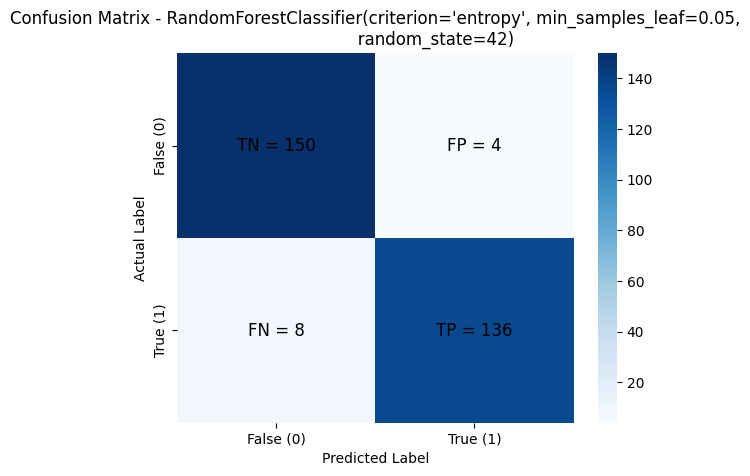

In [120]:
confusion_matrix2(rf2_tuned)

#### GradientBoost

In [121]:
eval_classification(gb2_tuned)

Accuracy Score (Test Set): 96.98
Accuracy Score (Train Set): 97.69
Precision Score (Test Set): 96.53
Precision Score (Train Set): 98.53
Recall Score (Test Set): 97.20
Recall Score (Train Set): 96.83
F1 Score (Test Set): 96.86
F1 Score (Train Set): 97.67
ROC-AUC (Test-Proba): 99.18
ROC-AUC (Train-Proba): 99.78
Accuracy (Crossval Test): 95.44
Accuracy (Crossval Train): 98.10


Accuracy Score (Test Set): 96.98
Precision Score (Test Set): 96.53
Recall Score (Test Set): 97.20
F1 Score (Test Set): 96.86
ROC-AUC (Test-Proba): 99.18


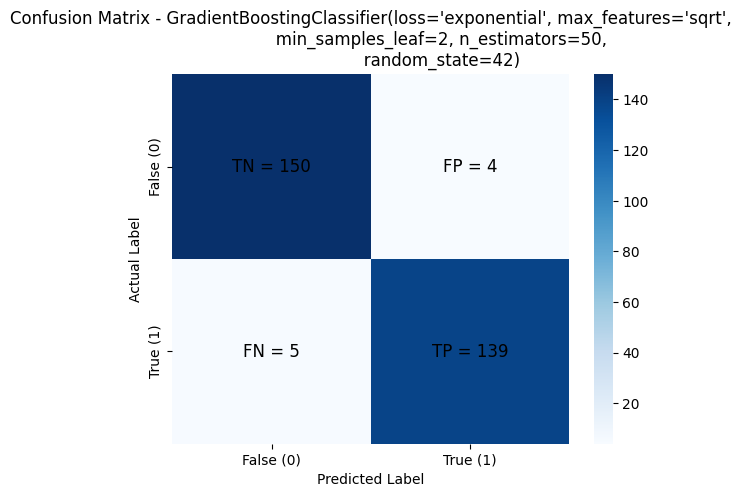

In [122]:
confusion_matrix2(gb2_tuned)

#### XGBoost

In [123]:
eval_classification(xgb2_tuned)

Accuracy Score (Test Set): 97.32
Accuracy Score (Train Set): 97.84
Precision Score (Test Set): 97.22
Precision Score (Train Set): 99.40
Recall Score (Test Set): 97.22
Recall Score (Train Set): 96.25
F1 Score (Test Set): 97.22
F1 Score (Train Set): 97.80
ROC-AUC (Test-Proba): 99.05
ROC-AUC (Train-Proba): 99.75
Accuracy (Crossval Test): 95.53
Accuracy (Crossval Train): 97.99


Accuracy Score (Test Set): 97.32
Precision Score (Test Set): 97.22
Recall Score (Test Set): 97.22
F1 Score (Test Set): 97.22
ROC-AUC (Test-Proba): 99.05


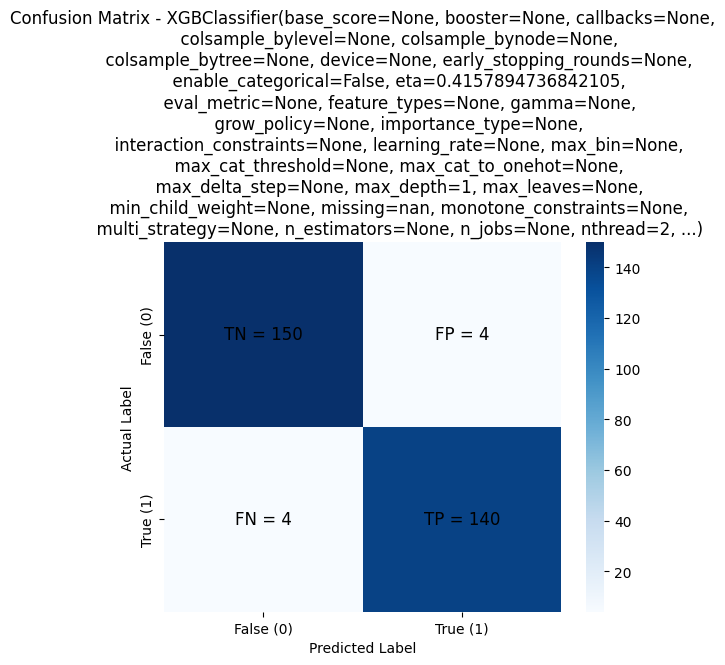

In [124]:
confusion_matrix2(xgb2_tuned)

## **Model Comparison**

> In the beginning we knew that the target variable is balanced (50:50), so the main evaluation metric we will use is **Accuracy**. As for the secondary evaluation metric we will be using **Recall** because in business context we want to reduce the number of customers/users that is predicted not clicked on the ad while actually he/she wanted to clicked on the ad (False Negative).

### **Before Normalization/Standardization**

In [131]:
# Creating models dict
models1_dict = {}
models1_dict['lg1'] = lg1_tuned
models1_dict['knn1'] = knn1_tuned
models1_dict['dt1'] = dt1_tuned
models1_dict['rf1'] = rf1_tuned
models1_dict['gb1'] = gb1_tuned
models1_dict['xgb1'] = xgb1_tuned

In [132]:
# Creating eval data frame
accuracy_test1 = []
accuracy_train1 = []
recall_test_list1 = []
recall_train_list1 = []
accuracy_train_cv1 = []
accuracy_test_cv1 = []
recall_train_cv1_list = []
recall_test_cv1_list = []
time_elapsed1 = []

for name, model in models1_dict.items():
  start = time.time()
  y_pred1 = model.predict(x1_test)
  y_pred_train1 = model.predict(x1_train)
  end = time.time()

  acc_test1 = accuracy_score(y1_test, y_pred1)
  acc_train1 = accuracy_score(y1_train, y_pred_train1)
  recall_test1 = recall_score(y1_test, y_pred1)
  recall_train1 = recall_score(y1_train, y_pred_train1)

  cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 5)
  score = cross_validate(model, x1_train, y1_train, cv=cv, scoring='accuracy', return_train_score=True)
  acc_train_cv1 = score['train_score'].mean()
  acc_test_cv1 = score['test_score'].mean()

  cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 5)
  score = cross_validate(model, x1_train, y1_train, cv=cv, scoring='recall', return_train_score=True)
  recall_train_cv1 = score['train_score'].mean()
  recall_test_cv1 = score['test_score'].mean()

  accuracy_test1.append(acc_test1)
  accuracy_train1.append(acc_train1)
  recall_test_list1.append(recall_test1)
  recall_train_list1.append(recall_train1)
  accuracy_train_cv1.append(acc_train_cv1)
  accuracy_test_cv1.append(acc_test_cv1)
  recall_test_cv1_list.append(recall_test_cv1)
  recall_train_cv1_list.append(recall_train_cv1)
  time_elapsed1.append(end-start)

eval_dict1 = {'Model': models1_dict.keys(),
             'Accuracy_test': accuracy_test1,
             'Accuracy_train': accuracy_train1,
             'Recall_test': recall_test_list1,
             'Recall train': recall_train_list1,
             'Accuracy_test_crossval': accuracy_test_cv1,
             'Accuracy_train_crossval': accuracy_train_cv1,
             'Recall_test_crossval' : recall_train_cv1_list,
             'Recall_train_crossval' : recall_test_cv1_list,
             'Time_elapsed': time_elapsed1,
             'Fit_time': fit_time1}

eval_df1 = pd.DataFrame(data=eval_dict1)
eval_df1 = eval_df1.set_index('Model')
eval_df1.style.format(precision=3)

**Major Findings :**
- `Decision Tree` had the lowest fit time of all the models but the accuracy is second lowest accuracy overall.
- `XGBoost` had the highest cross validated accuracy but `Gradient Boosting` has the highest cross validated recall.
- Due to the non-scaled data, distance based algorithms like `K-Nearest Neighbours` suffered heavily as the accuracy and recall scores is the lowest of all models tested. Linear algorithms like `Logistic Regression` also suffered from this case.

### **After Normalization/Standardization**

In [133]:
# Creating models dict
models2_dict = {}
models2_dict['lg2'] = lg2_tuned
models2_dict['knn2'] = knn2_tuned
models2_dict['dt2'] = dt2_tuned
models2_dict['rf2'] = rf2_tuned
models2_dict['gb2'] = gb2_tuned
models2_dict['xgb2'] = xgb2_tuned

In [134]:
# Creating eval data frame
accuracy_test2 = []
accuracy_train2 = []
recall_test_list2 = []
recall_train_list2 = []
accuracy_train_cv2 = []
accuracy_test_cv2= []
recall_train_cv2_list = []
recall_test_cv2_list = []
time_elapsed2 = []

for name, model in models1_dict.items():
  start = time.time()
  y_pred2 = model.predict(x2_test)
  y_pred_train2 = model.predict(x2_train)
  end = time.time()

  acc_test2 = accuracy_score(y2_test, y_pred2)
  acc_train2 = accuracy_score(y2_train, y_pred_train2)
  recall_test2 = recall_score(y2_test, y_pred2)
  recall_train2 = recall_score(y2_train, y_pred_train2)

  cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 5)
  score = cross_validate(model, x2_train, y2_train, cv=cv, scoring='accuracy', return_train_score=True)
  acc_train_cv2 = score['train_score'].mean()
  acc_test_cv2 = score['test_score'].mean()

  cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 5)
  score = cross_validate(model, x2_train, y2_train, cv=cv, scoring='recall', return_train_score=True)
  recall_train_cv2 = score['train_score'].mean()
  recall_test_cv2 = score['test_score'].mean()

  accuracy_test2.append(acc_test2)
  accuracy_train2.append(acc_train2)
  recall_test_list2.append(recall_test2)
  recall_train_list2.append(recall_train2)
  accuracy_train_cv2.append(acc_train_cv2)
  accuracy_test_cv2.append(acc_test_cv2)
  recall_test_cv2_list.append(recall_test_cv2)
  recall_train_cv2_list.append(recall_train_cv2)  
  time_elapsed2.append(end-start)

eval_dict2 = {'Model': models2_dict.keys(),
             'Accuracy_test': accuracy_test2,
             'Accuracy_train': accuracy_train2,
             'Recall_test': recall_test_list2,
             'Recall train': recall_train_list2,
             'Accuracy_test_crossval': accuracy_test_cv2,
             'Accuracy_train_crossval': accuracy_train_cv2,
             'Recall_test_crossval' : recall_train_cv2_list,
             'Recall_train_crossval' : recall_test_cv2_list,             
             'Time_elapsed': time_elapsed2,
             'Fit_time': fit_time2}

eval_df2 = pd.DataFrame(data=eval_dict2)
eval_df2 = eval_df2.set_index('Model')
eval_df2.style.format(precision=3)

**Major Findings :**
- The overall fit time of all models decrease after scalling is applied, this is because it's now easier for the algorithm to do the calcuation.
- `Logistic Regression` had the highest cross validated accuracy, but `Gradient Boosting` has the highest cross validated recall.
- With normalized data, the previously poor performing distance based and linear models have shone through. The performance of `K-Nearest Neighbours` improved really significant while for the `Logistic Regression` not only the performance in accuracy and recall increased but also the fit time became much faster. 

### **Conclusion**

**By taking consideration of not only the above evaluation metrics but also the simplicity, explainability and fit and elapsed times, the model that will be chosen is the `Logistic Regression` model with normalization/standardization**

## Selected Model Analysis

### Confusion Matrix

Accuracy Score (Test Set): 97.32
Precision Score (Test Set): 97.22
Recall Score (Test Set): 97.22
F1 Score (Test Set): 97.22
ROC-AUC (Test-Proba): 99.31


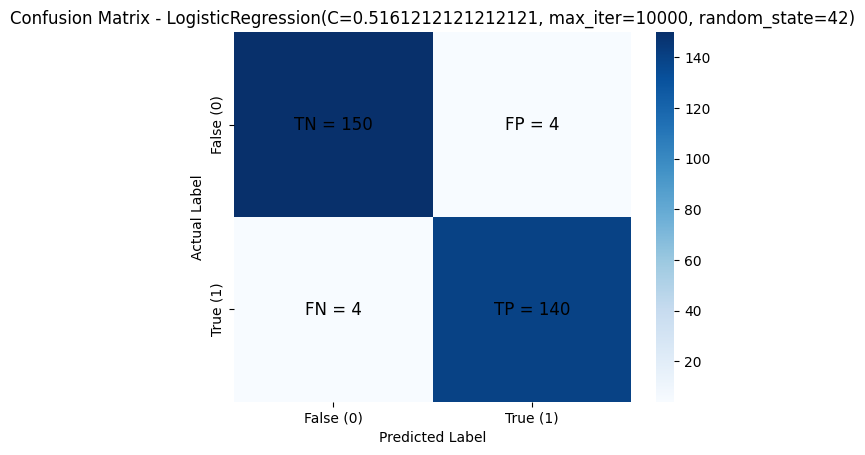

In [135]:
confusion_matrix2(lg2_tuned)

**Major Findings :**

From the test set confusion matrix above, from 144 people that clicked on an ad the algorithm correctly classified 140 of them and incorrectly classified 4 of them. Similarly, out of 154 people that did not click on an ad the algorithm correctly classified 150 of them and only incorrectly classified only 4.

### Learning Curve

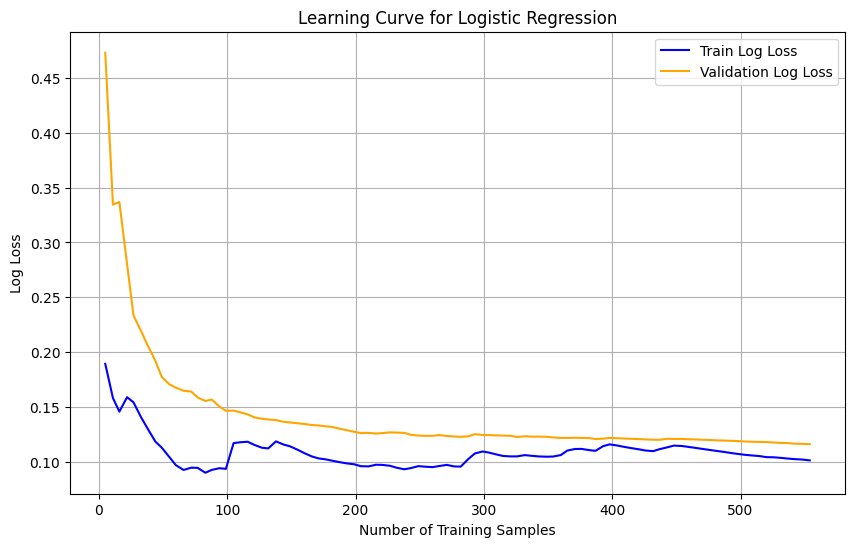

In [165]:
from sklearn.model_selection import learning_curve

model = Pipeline([('scaling', StandardScaler()), ('classification', lg2_tuned)])

cv = RepeatedStratifiedKFold(random_state=42, n_repeats=3)
sizes, training_scores, testing_scores = learning_curve(
    estimator=model, X=x2_train, y=y2_train, cv=cv, scoring='neg_log_loss', train_sizes=np.linspace(0.01, 1, 100))

# Mean and Standard Deviation of training scores
mean_training = -np.mean(training_scores, axis=1)
standard_deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = -np.mean(testing_scores, axis=1)
standard_deviation_testing = np.std(testing_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(sizes, mean_training, label='Train Log Loss', color='blue')
# plt.fill_between(sizes, mean_training - standard_deviation_training, mean_training + standard_deviation_training, alpha=0.1, color='blue')
plt.plot(sizes, mean_testing, label='Validation Log Loss', color='orange')
# plt.fill_between(sizes, mean_testing - standard_deviation_testing, mean_testing + standard_deviation_testing, alpha=0.1, color='orange')
plt.xlabel('Number of Training Samples')
plt.ylabel('Log Loss')
plt.title('Learning Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()

As can be seen from the above learning curve, the tuned `Logistic Regression` model with normalization/standardization is well fitted with no overfitting/underfitting.

### Feature Importances

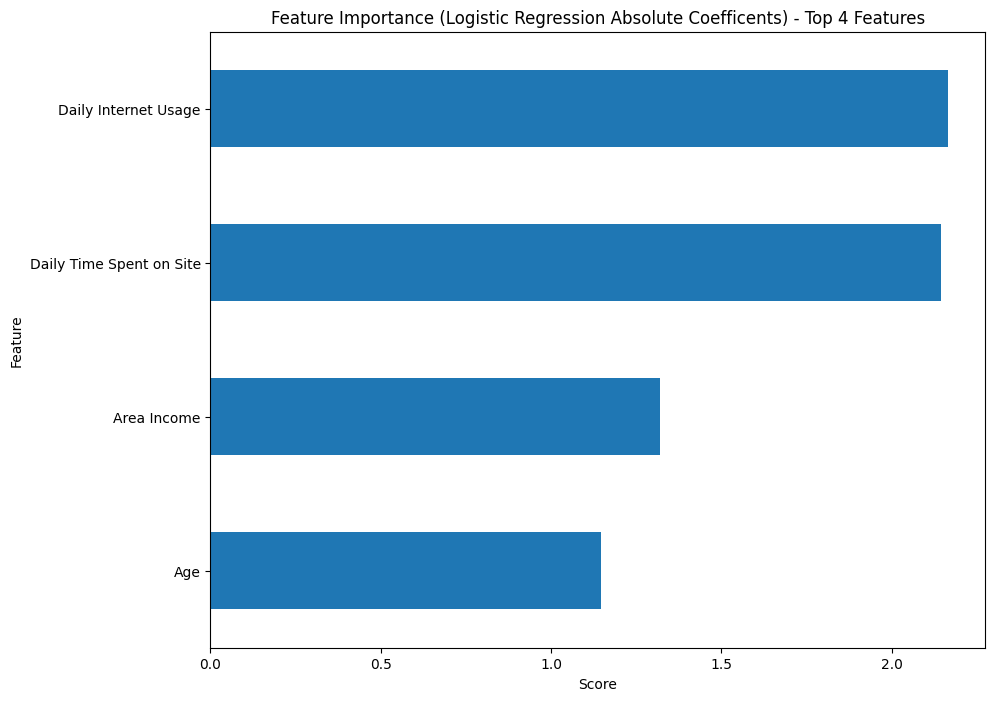

In [189]:
# Logistic regression feature importance
lg_features_importance = pd.DataFrame({'Feature' : x1.columns, 'Coefficient': np.abs(lg2_tuned.coef_[0])})
lg_features_importance = lg_features_importance.sort_values(by='Coefficient', ascending=True)
lg_features_importance = lg_features_importance.tail(4)

# Plot the horizontal bar plot
lg_features_importance.plot(x='Feature', y='Coefficient', kind='barh', figsize=(10, 8), legend=False)

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression Absolute Coefficents) - Top 4 Features')
plt.show()

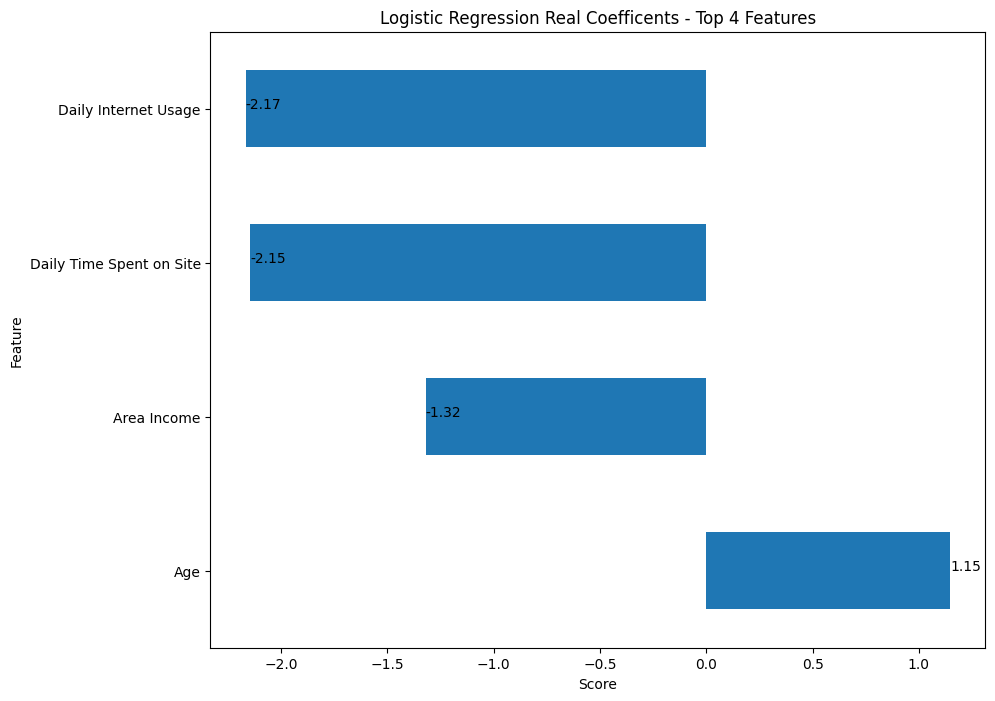

In [148]:
# Logistic regression real coefficient
lg_features_importance = lg_features_importance.loc[lg_features_importance['Feature'].isin(['Daily Internet Usage', 'Daily Time Spent on Site', 'Area Income', 'Age'])]

# Plot the horizontal bar plot
lg_features_importance.plot(x='Feature', y='Coefficient', kind='barh', figsize=(10, 8), legend=False)

for index, value in enumerate(lg_features_importance['Coefficient']):
    plt.text(value, index, str(round(value,2)))

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Logistic Regression Real Coefficents - Top 4 Features')
plt.show()

In the model generated using the logistic regression algorithm, the features contributing to the prediction results sorted from the most important are Daily Internet Usage, Daily Time Spent on Site, Area Income, and lastly Age. The interpreted coefficient gave us several info :

- The lower the `Daily Internet Usage`, `Daily Time Spent on Site`, and `Area Income`, the higher the chances that the customer will click on an ad and vice versa.
- The higher the `Age`, the bigger the odds that the customer will click on an ad and vice versa.

# **Business Recommendation & Model Impact Simulation**

## Business Recommendation

Based on the insights that we got in EDA combining that with the feature importance from the logistic regression model, the following business recommendations are formulated :

- **Optimize Ad Placement for Active Internet Users**:<br>
Users who heavily utilize the internet are typically less responsive to ads which could be due to ad fatigue or a situation where they are exposed to a higher volume of ads. Over time, they may become tired or "fatigued" of seeing advertisements, leading to decreased responsiveness. To enhance ad performance, optimizing ad placement for users with lower internet usage or devising strategies to make ads more noticeable to this demographic, such as employing captivating visuals or distinctive offers, could be explored.

- **Site Content Personalization**:<br>
Now, the case is different from point 1, where the scope of analysis is that customer is now on our site. Given that users are more likely to click on ads when spending less time on our site, it becomes crucial to focus on content personalization and enhancing user engagement. Customizing content to maintain user interest without overwhelming them is key. This can involve strategies such as recommending relevant content and leveraging user data to tailor the user experience.

- **Age-Targeted Advertising**:<br>
Given the higher engagement levels observed among older demographics, it's strategic to refine our ad campaigns to resonate more effectively with this audience segment. This could involve crafting messaging and visuals that reflect the life experiences and preferences typical of older age groups. Additionally, leveraging insights from market research to identify products or services that align with the needs and aspirations of this demographic can enhance the effectiveness of our advertising efforts.

- **Income-Level Advertising**:<br>
Areas with lower income levels often exhibit higher ad click rates. Thus, creating ad campaigns with budget-friendly offerings that cater to individuals with lower incomes could be beneficial. Additionally, adjusting the ad messaging to emphasize cost-effective solutions may further enhance effectiveness.

## Business Simulation (Model Impact on Business)

In [150]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

The initial condition (before model implementation) indicates that there are 50% of customers/users who do not click on the ads targeted to them. This is certainly disadvantageous for the company because it will increase the cost incurred by the company in displaying those ads on a platform. In this case, the total profit obtained by the company before and after model implementation will be calculated. Previously, several assumptions will be made such as:

Cost per Advertisement : Rp.6,000 <br>
Revenue per Ad clicked: Rp.15,000

*reference : 
- https://www.semrush.com/blog/google-ads-cost/
- https://www.businessofapps.com/ads/cpc/research/cpc-rates/ 

**Before model implementation:**

- **No. Users Advertised**:<br>
All User = 1000

- **Ad Click Rate**: <br>
500/1000 = 50%

- **Total Cost**: <br>
No. Users Advertised x Cost per Ad = 1000 x 6000 = Rp.6,000,000

- **Total Revenue**: <br>
Click Rate x No. Users Advertised x Revenue per Ad Clicked = 0.5 x 1000 x 15000 = Rp.7,500,000

- **Total Profit**:<br>
Total Revenue - Total Cost = **Rp.1,500,000**

**After model implementation:**

- **No. Users Advertised**:<br>
Accuracy x All original user = 0.973 x 1,000 = 973

- **Ad Click Rate**:<br>
(Precision x 1000)/No. Users Advertised = 0.972 x 1000 / 973 = 99.8%

- **Total Cost**:<br>
No. Users Advertised x Cost per Ad = 1000 x 6000 = Rp.6,000,000

- **Total Revenue**:<br>
Click Rate x No. Users Advertised x Revenue per Ad Clicked = 0.998 x 973 x 15000 = Rp.14,565,810

- **Total Profit**:<br>
Total Revenue - Total Cost = **Rp.8,727,810**

**Conclusion:**

By comparing the profits and click rates of before and after model implementation, we can see that with model implementation click rate is up from **50%** to **99.8%**, and similarly profit is up from **Rp.1,500,000** to **Rp.8,727,810** (a **581.8%** increase).

Business simulation shows impressive results from implementing the model:

- Click-through rate improved from 50% to 99.8%
- Profit increased by 581.8% (from Rp.1,500,000 to Rp.8,727,810)
- More efficient ad targeting with 97.3% accuracy rate